# OC_P2 Data Exploration

Bienvenue dans le notebook d'exploration de données du projet "Concevez une application au service de la santé publique.

# Sommaire
- <a href="#C1">I. Analyse Univariée</a>
    - 1. Distribution des variables quantitatives
    - 2. Distribution des variables qualitatives
- <a href="#C2">II. Analyse Bivariée</a>
    - 1. Correlation entre les variables
    - 2. Analyse Quantivative / Quantivative
    - 3. Analyse Quantitative / Qualitative
    - 4. Analyse Qualitative / Qualitative
- <a href="#C3">III. ACP</a>

In [1]:
# importing librairies
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager as fm, rcParams
import scipy.stats as st
from scipy.stats import pearsonr
from scipy.stats import f_oneway
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [11]:
# récupération du chemin d'accès de la typo et récupération de celle-ci dans la variable prop
fpath = os.path.join(mpl.get_data_path(), r'C:\Users\omira\Downloads\Optima Medium.ttf')
prop = fm.FontProperties(fname=fpath)

# importation du thème seaborn
sns.set_theme(context='notebook', style='darkgrid', palette='dark', font='sans-serif', font_scale=1, color_codes=True, rc=None)
text_kwargs = dict(ha='center', va='center', fontsize=14, color='white')

# upgrade de la résolution des visualisations
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

# set dark background
plt.style.use("dark_background")

In [3]:
# chargement du dataframe
df = pd.read_csv('food_cleaned_final.csv', low_memory=False)

In [5]:
df

code nutrition_grade_fr ingredients_from_palm_oil_categ  \
0       0000000003087                  d                     no palm oil   
1       0000000004530                  d                     no palm oil   
2       0000000004559                  b                     no palm oil   
3       0000000016087                  d                     no palm oil   
4       0000000016094                  d                     no palm oil   
...               ...                ...                             ...   
320536  9948282780603                  d                     no palm oil   
320537       99567453                  b                     no palm oil   
320538  9970229501521                  d                     no palm oil   
320539  9980282863788                  d                     no palm oil   
320540   999990026839                  d                     no palm oil   

           additives_categ  nutrition-score-uk_100g  energy_100g  fiber_100g  \
0       very low additives                      9.0       1100.0         1.5   
1             no additives                     14.0       2243.0         3.6   
2             no additives                      0.0       1941.0         7.1   
3             no additives                     12.0       2540.0         7.1   
4             no additives                      9.0       1552.0         5.7   
...                    ...                      ...          ...         ...   
320536  very low additives                      9.0       1100.0         1.5   
320537        no additives                      0.0          0.0         0.0   
320538  very low additives                      9.0       1100.0         1.5   
320539  very low additives                      9.0       1100.0         1.5   
320540      high additives                      9.0       2092.0         1.5   

        proteins_100g  carbohydrates_100g  sodium_100g  saturated-fat_100g  \
0                4.76               20.60        0.229                1.79   
1                3.57               64.29        0.000               28.57   
2               17.86               60.71        0.250                0.00   
3               17.86               17.86        0.482                5.36   
4                8.57               77.14        0.229                1.79   
...               ...                 ...          ...                 ...   
320536           4.76               20.60        0.229                1.79   
320537           0.00                0.00        0.000                0.00   
320538           4.76               20.60        0.229                1.79   
320539           4.76               20.60        0.229                1.79   
320540           0.00                0.00        0.000                1.79   

        fat_100g  sugars_100g  
0           5.00         5.71  
1          28.57        14.29  
2          17.86        17.86  
3          57.14         3.57  
4           1.43         5.71  
...          ...          ...  
320536      5.00         5.71  
320537      0.00         0.00  
320538      5.00         5.71  
320539      5.00         5.71  
320540      0.00         0.00  

[320541 rows x 13 columns]

In [6]:
df.describe()

nutrition-score-uk_100g    energy_100g     fiber_100g  proteins_100g  \
count            320541.000000  320541.000000  320541.000000  320541.000000   
mean                  9.432924    1119.318746       2.334113       6.638670   
std                   6.994005     718.133931       3.684155       7.394534   
min                   0.000000       0.000000       0.000000       0.000000   
25%                   3.000000     502.000000       0.800000       1.600000   
50%                   9.000000    1100.000000       1.500000       4.760000   
75%                  13.000000    1569.000000       2.300000       8.240000   
max                  37.000000    4000.000000     100.000000     100.000000   

       carbohydrates_100g    sodium_100g  saturated-fat_100g       fat_100g  \
count       320541.000000  320541.000000       320541.000000  320541.000000   
mean            29.303911       0.558271            4.175920      10.869426   
std             25.867630       2.323351            6.854719      15.601633   
min              0.000000       0.000000            0.000000       0.000000   
25%              9.600000       0.047244            0.300000       0.900000   
50%             20.600000       0.229000            1.790000       5.000000   
75%             50.000000       0.439000            4.500000      14.290000   
max            164.000000      49.212598          100.000000     105.000000   

         sugars_100g  
count  320541.000000  
mean       13.556196  
std        19.005884  
min         0.000000  
25%         2.500000  
50%         5.710000  
75%        14.840000  
max       134.000000

# <a name="C1">I. Analyse Univariee</a>

In [7]:
# commencons par split le dataframe en 2 subset : 1 subset quantitatif et un subset qualitatif
df_quanti = df[['energy_100g','fiber_100g','proteins_100g','carbohydrates_100g','sodium_100g','saturated-fat_100g','fat_100g','sugars_100g']]
df_quali = df[['nutrition_grade_fr','ingredients_from_palm_oil_categ','additives_categ']]

1. Distribution des variables quantitatives

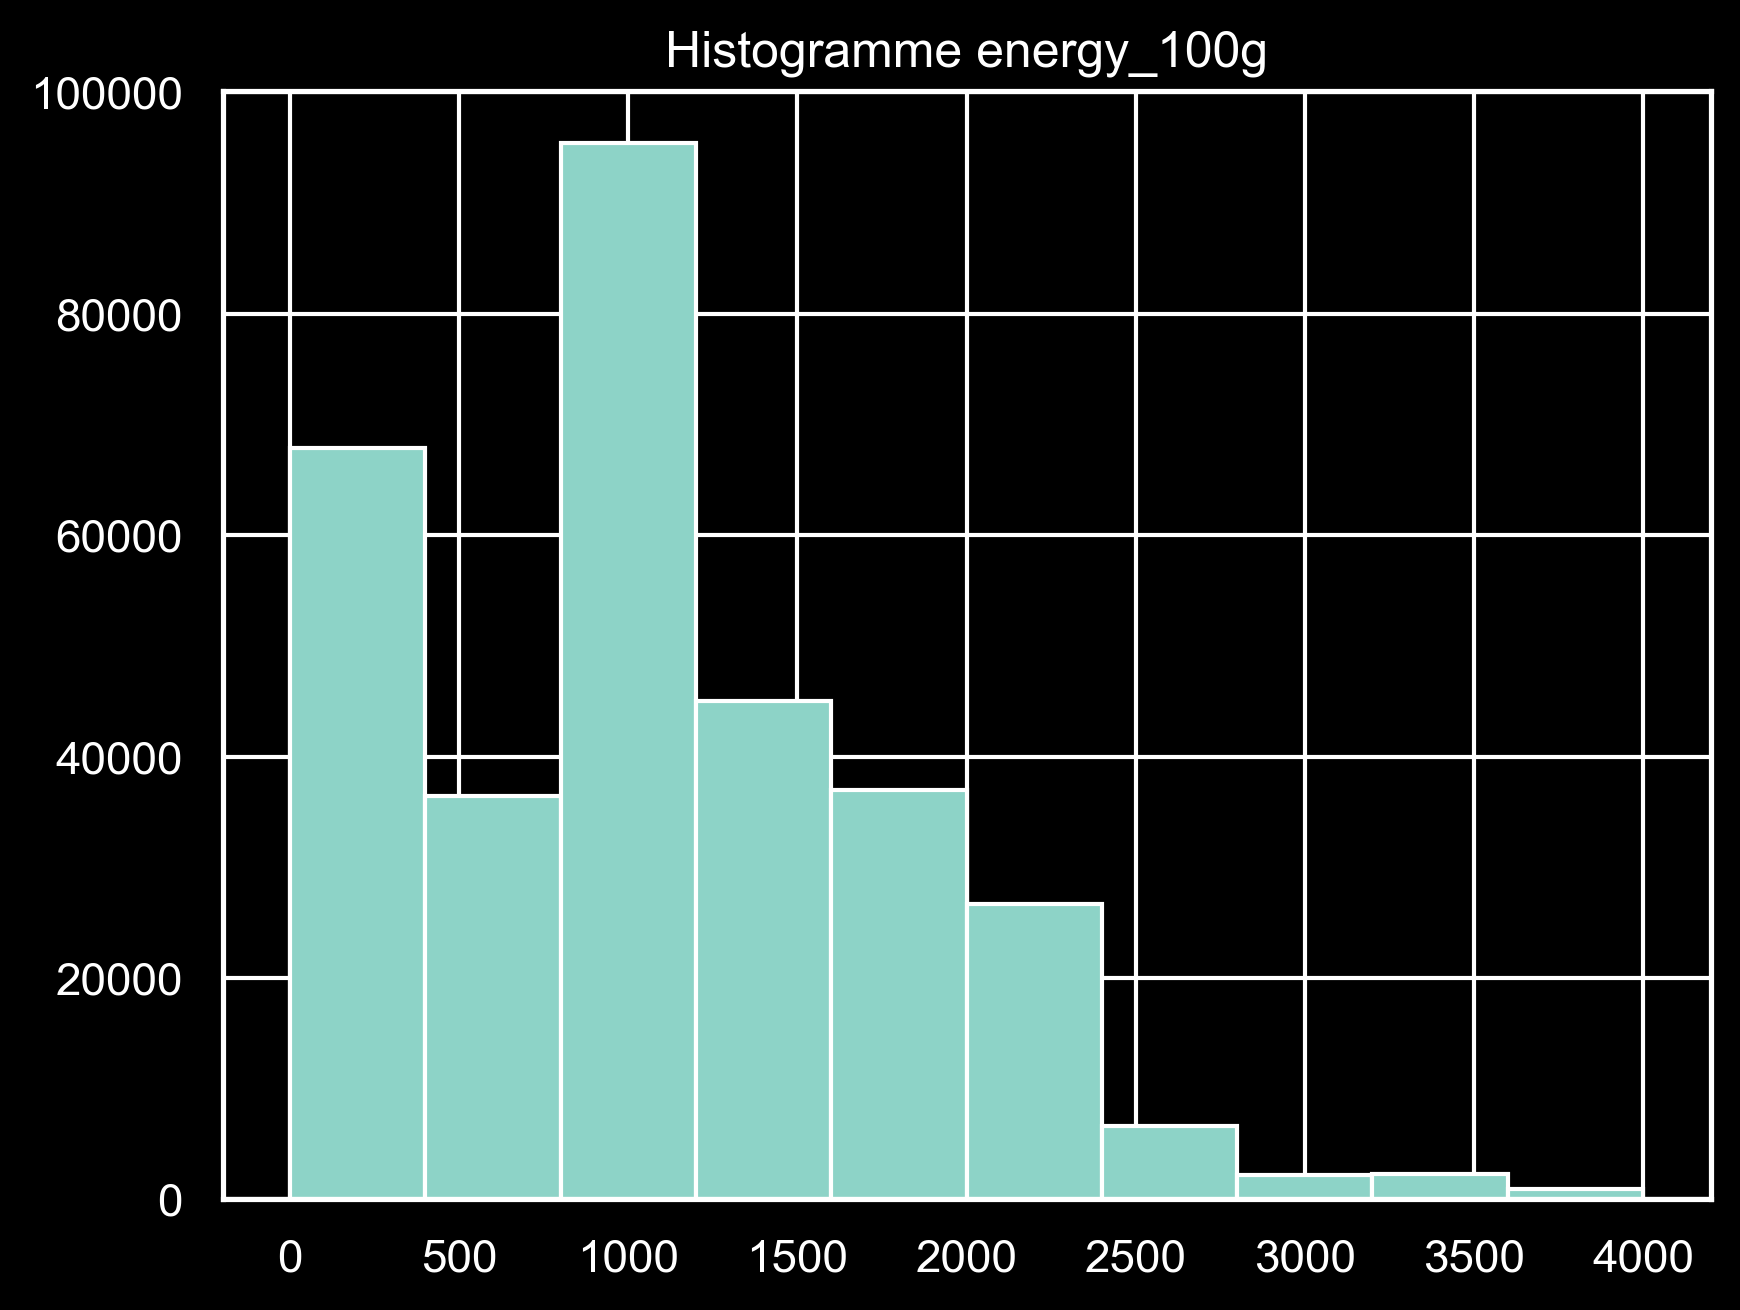

energy_100g


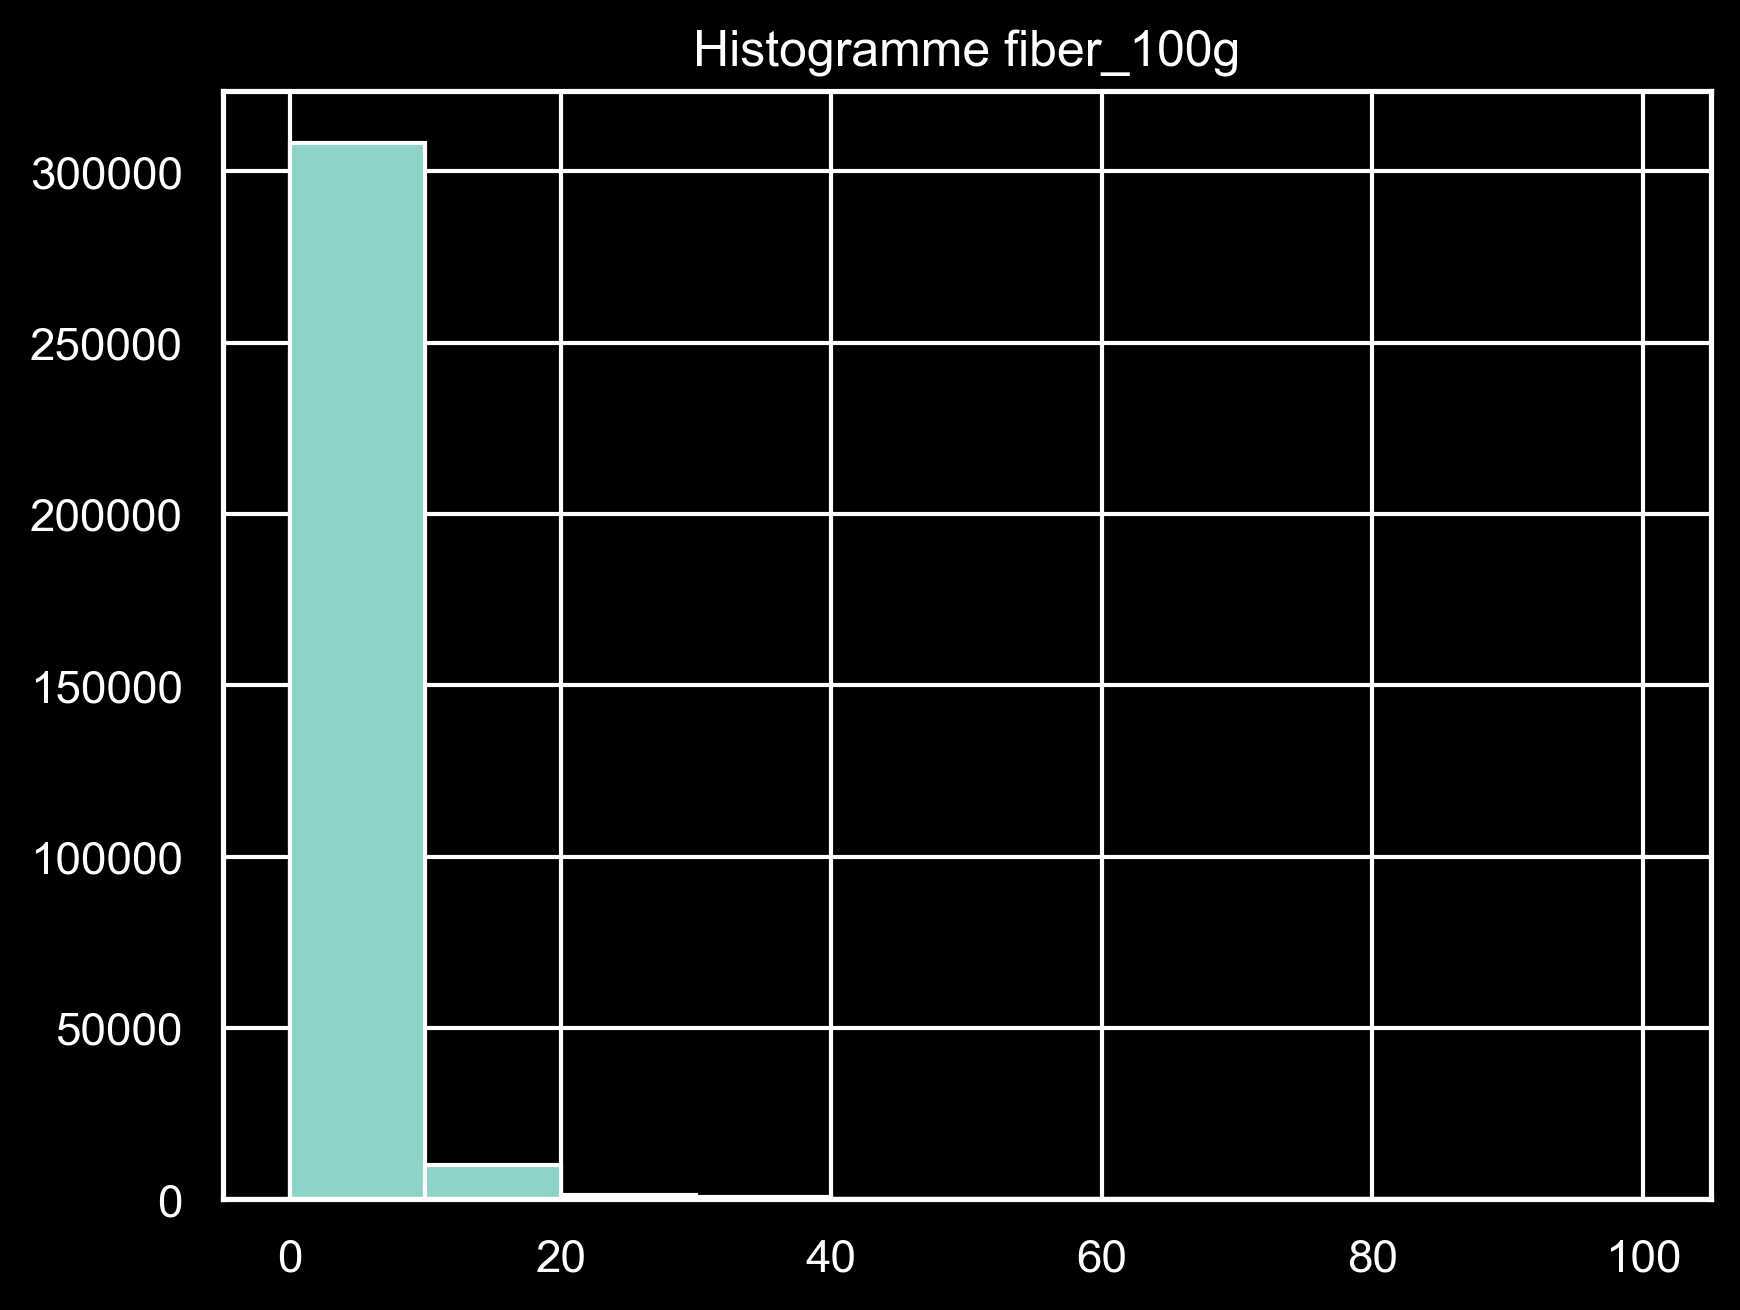

fiber_100g


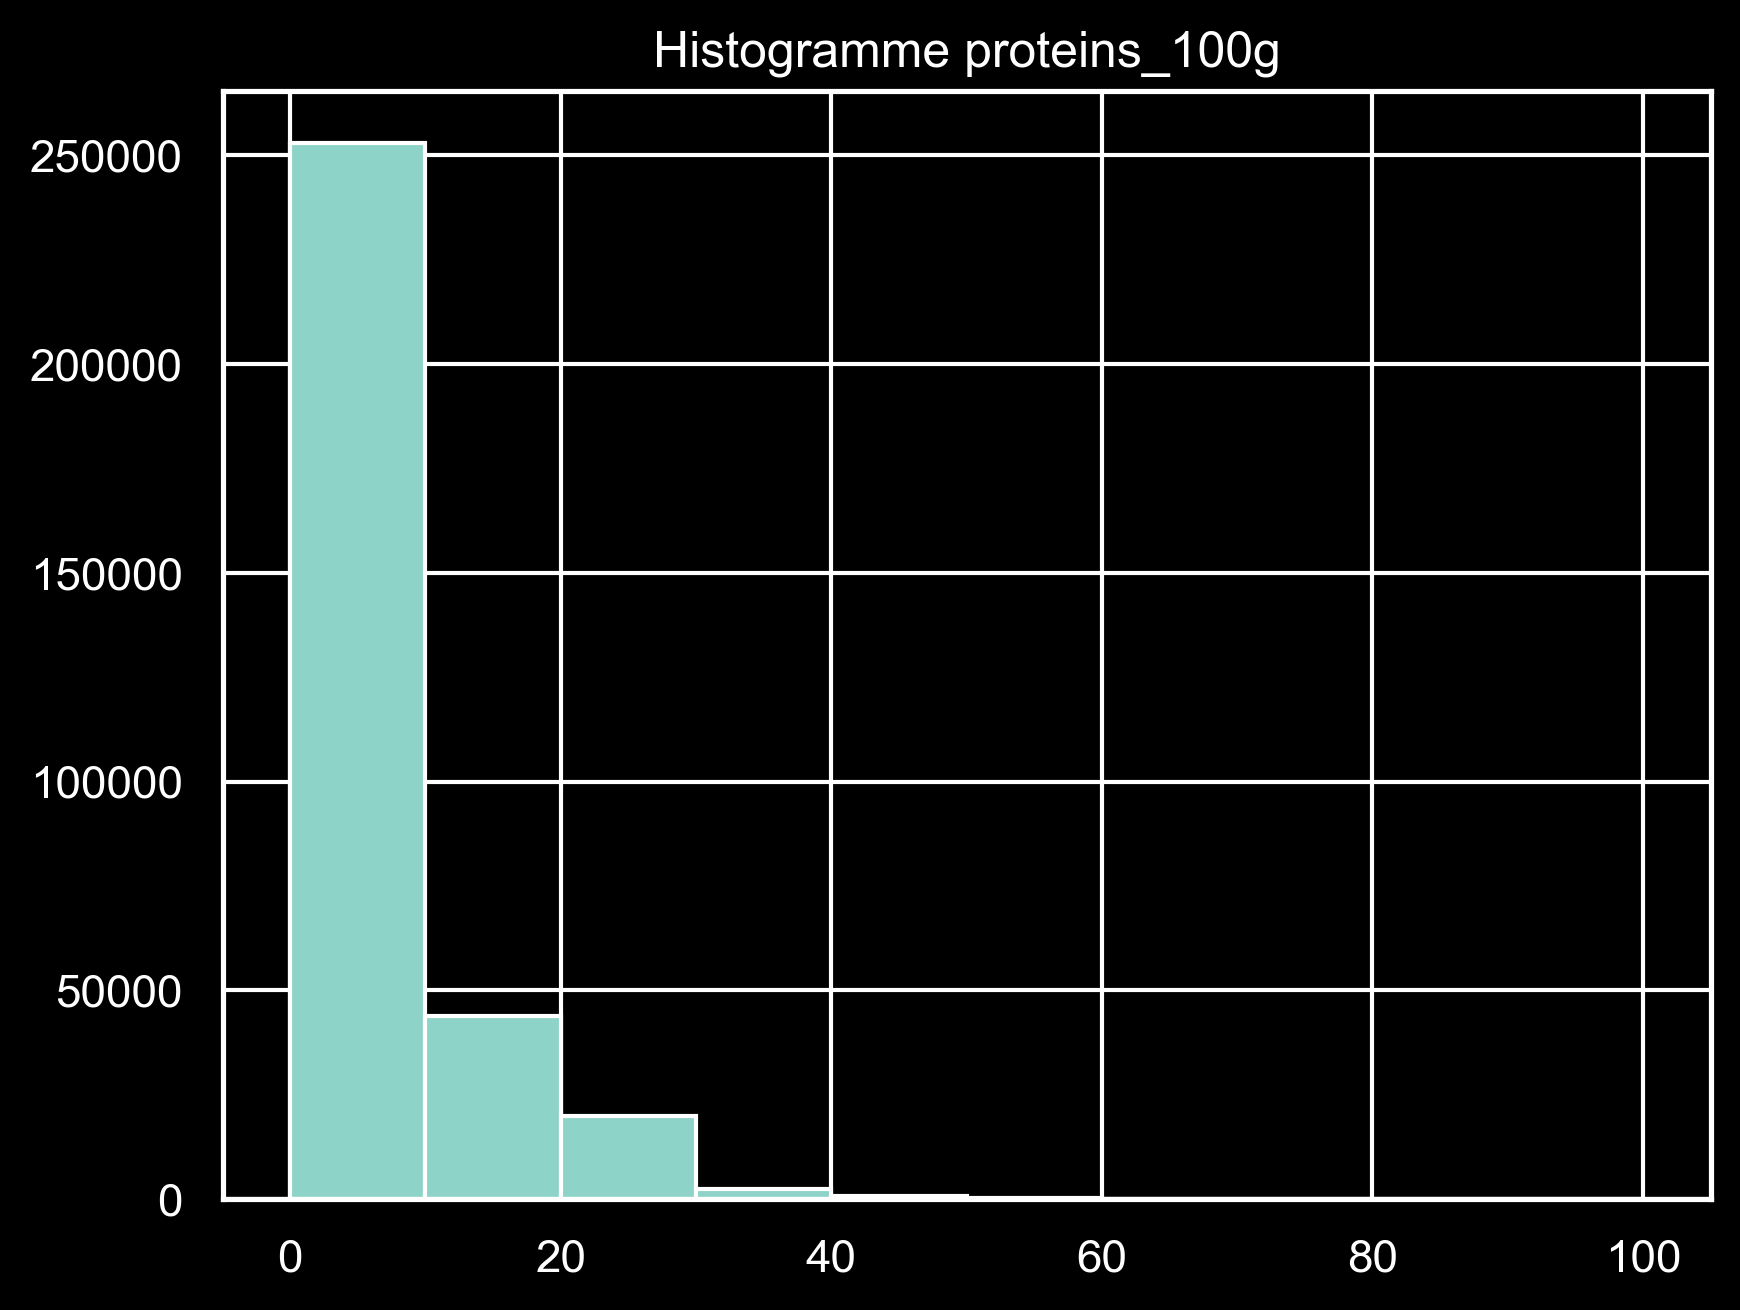

proteins_100g


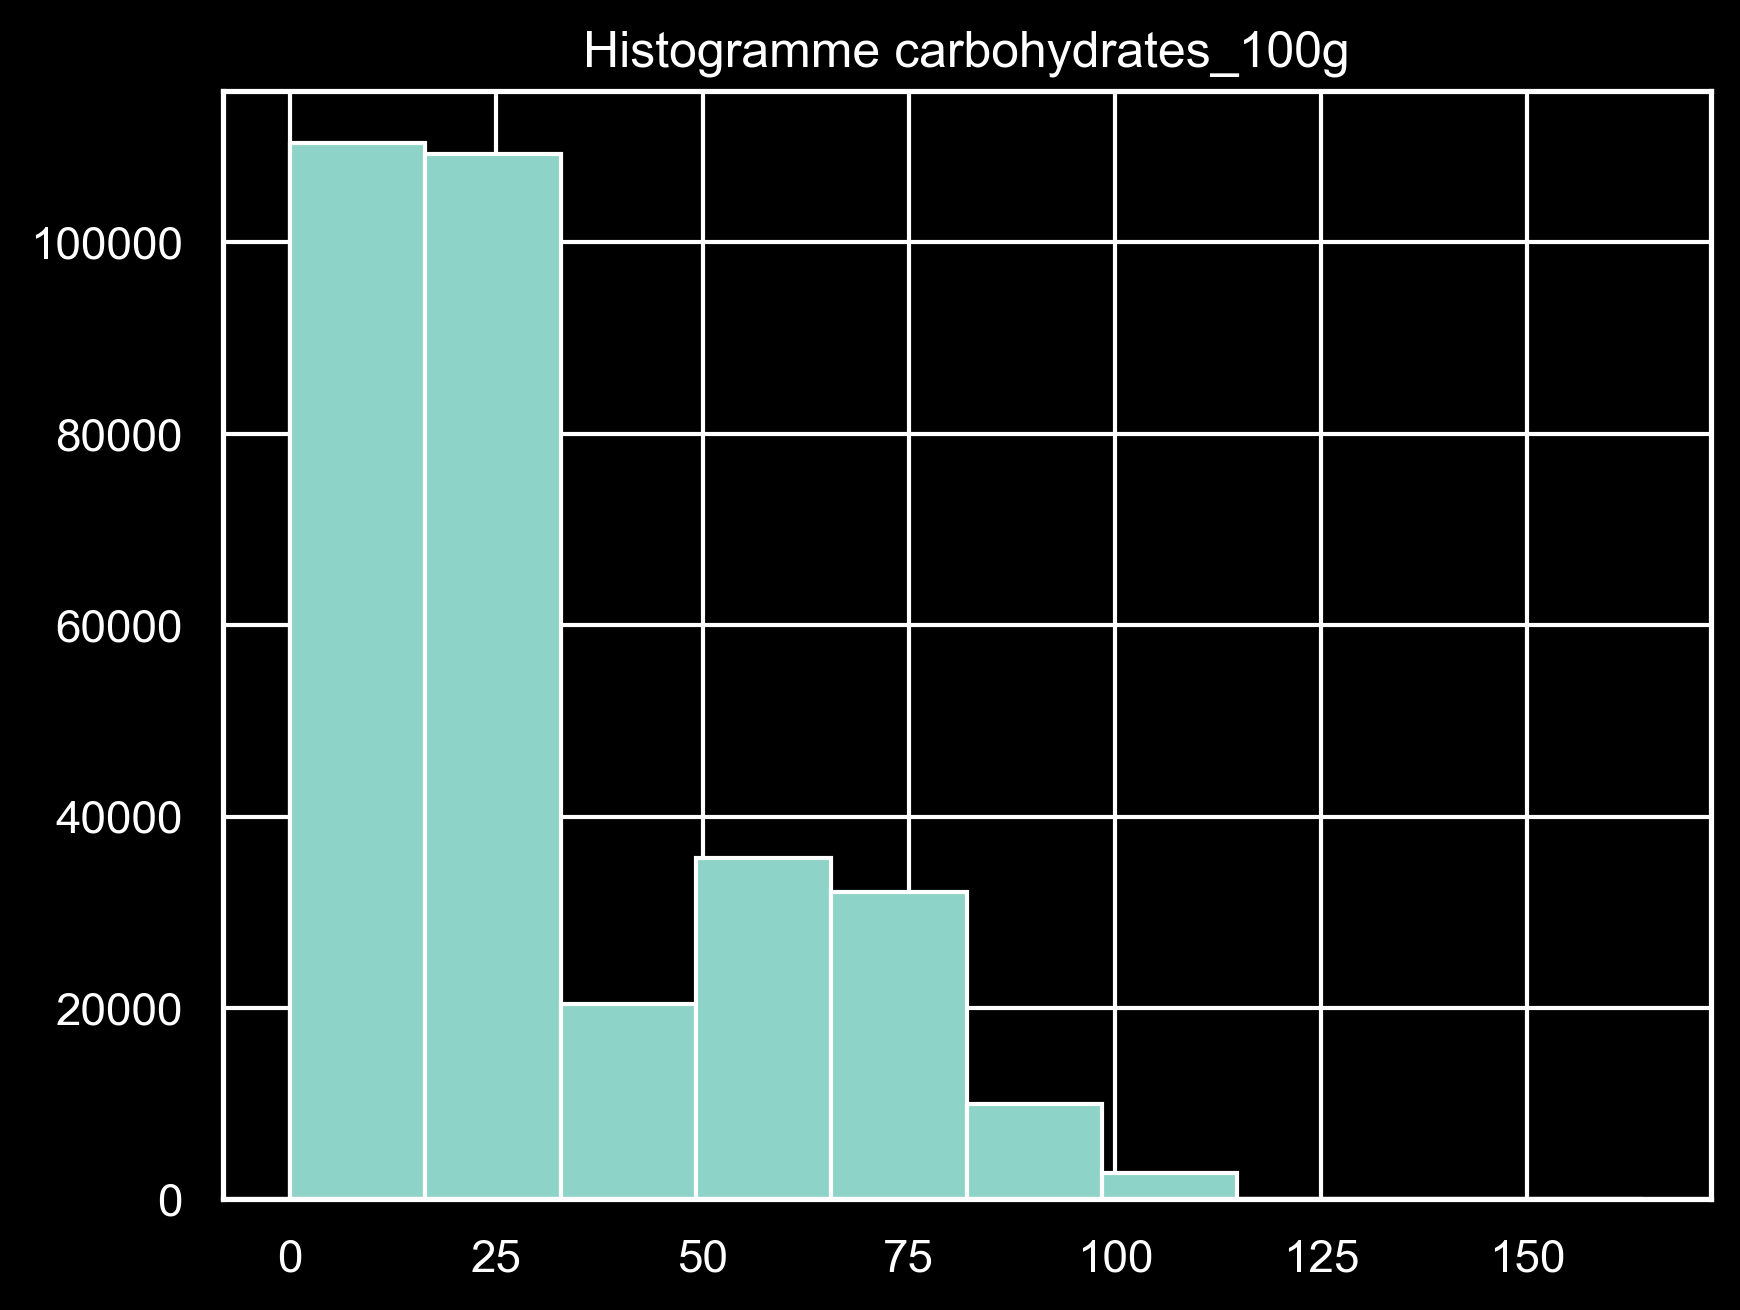

carbohydrates_100g


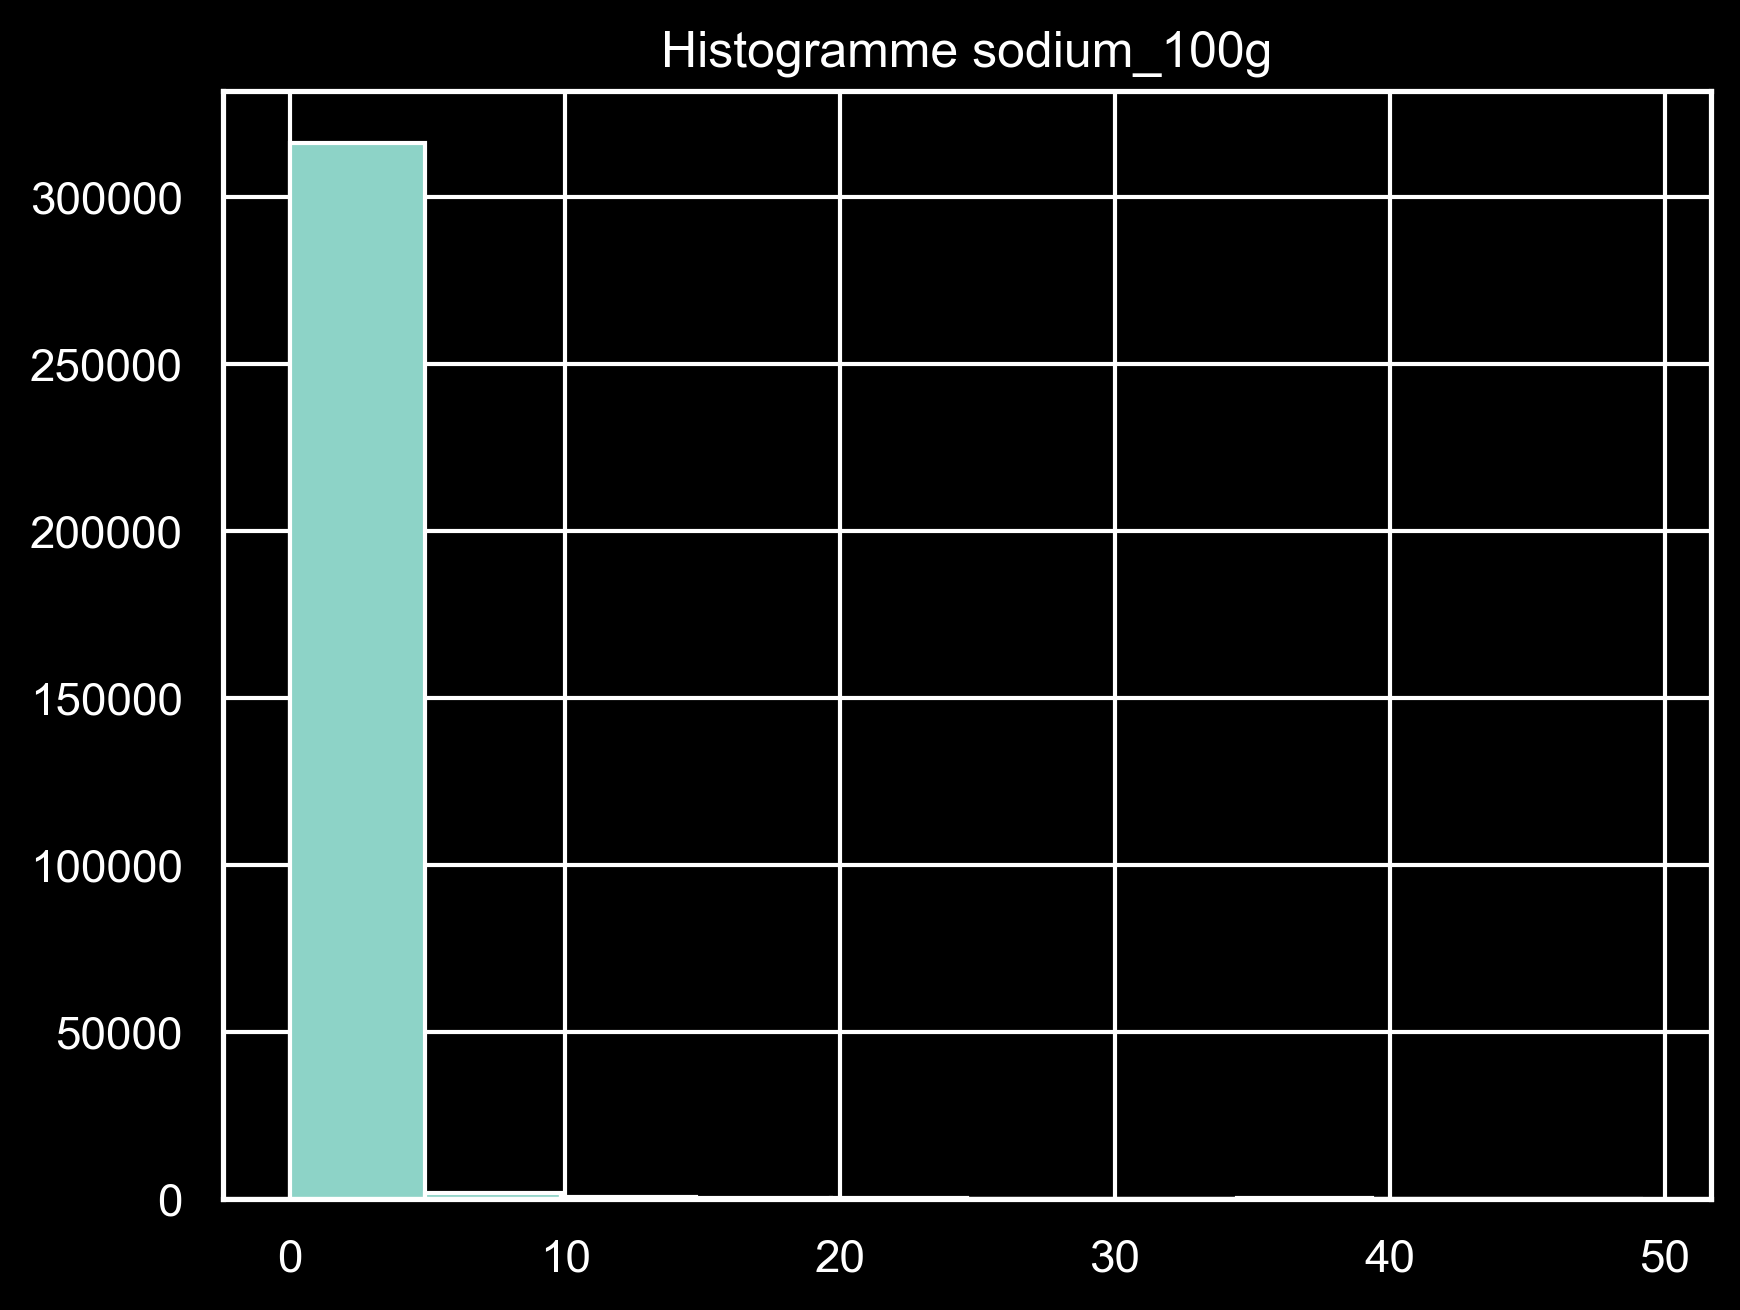

sodium_100g


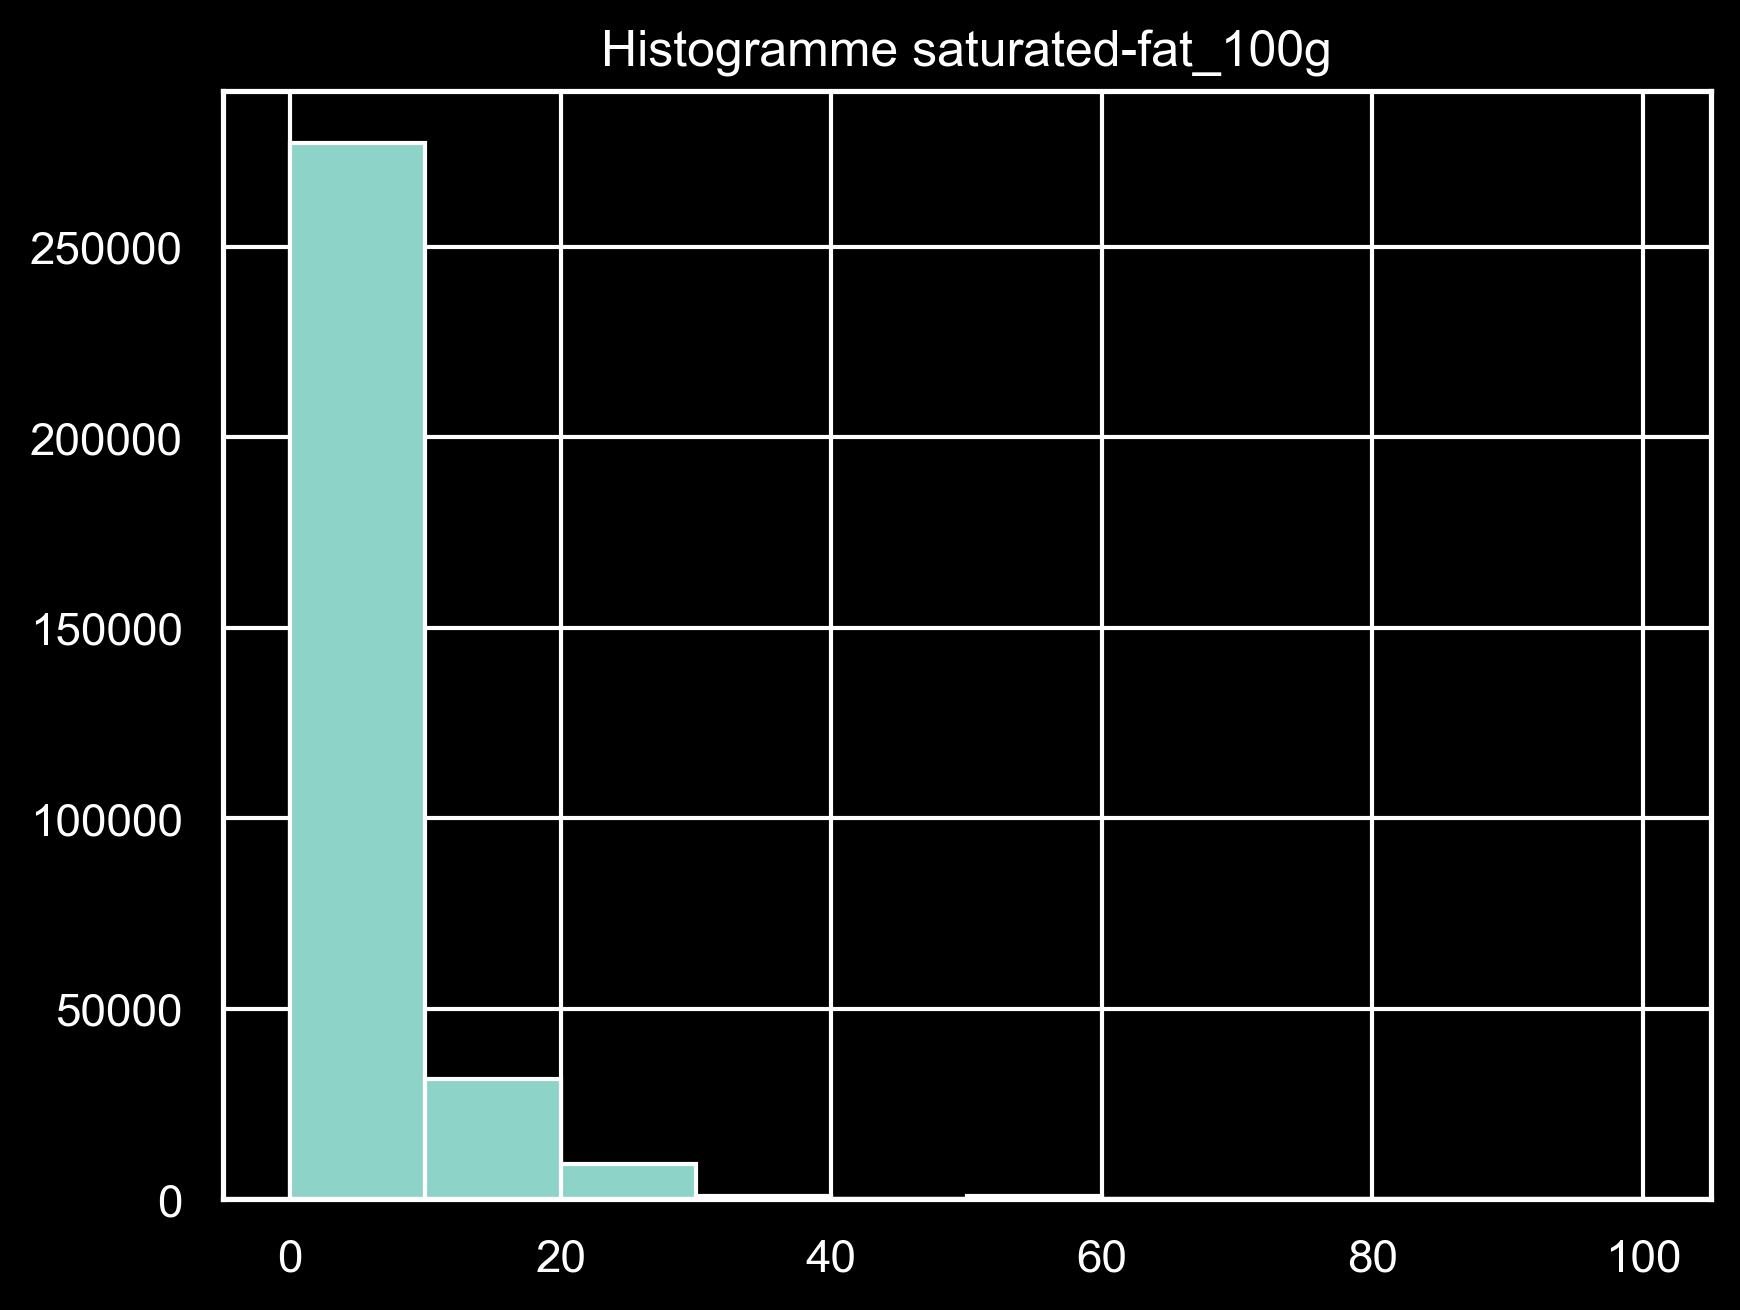

saturated-fat_100g


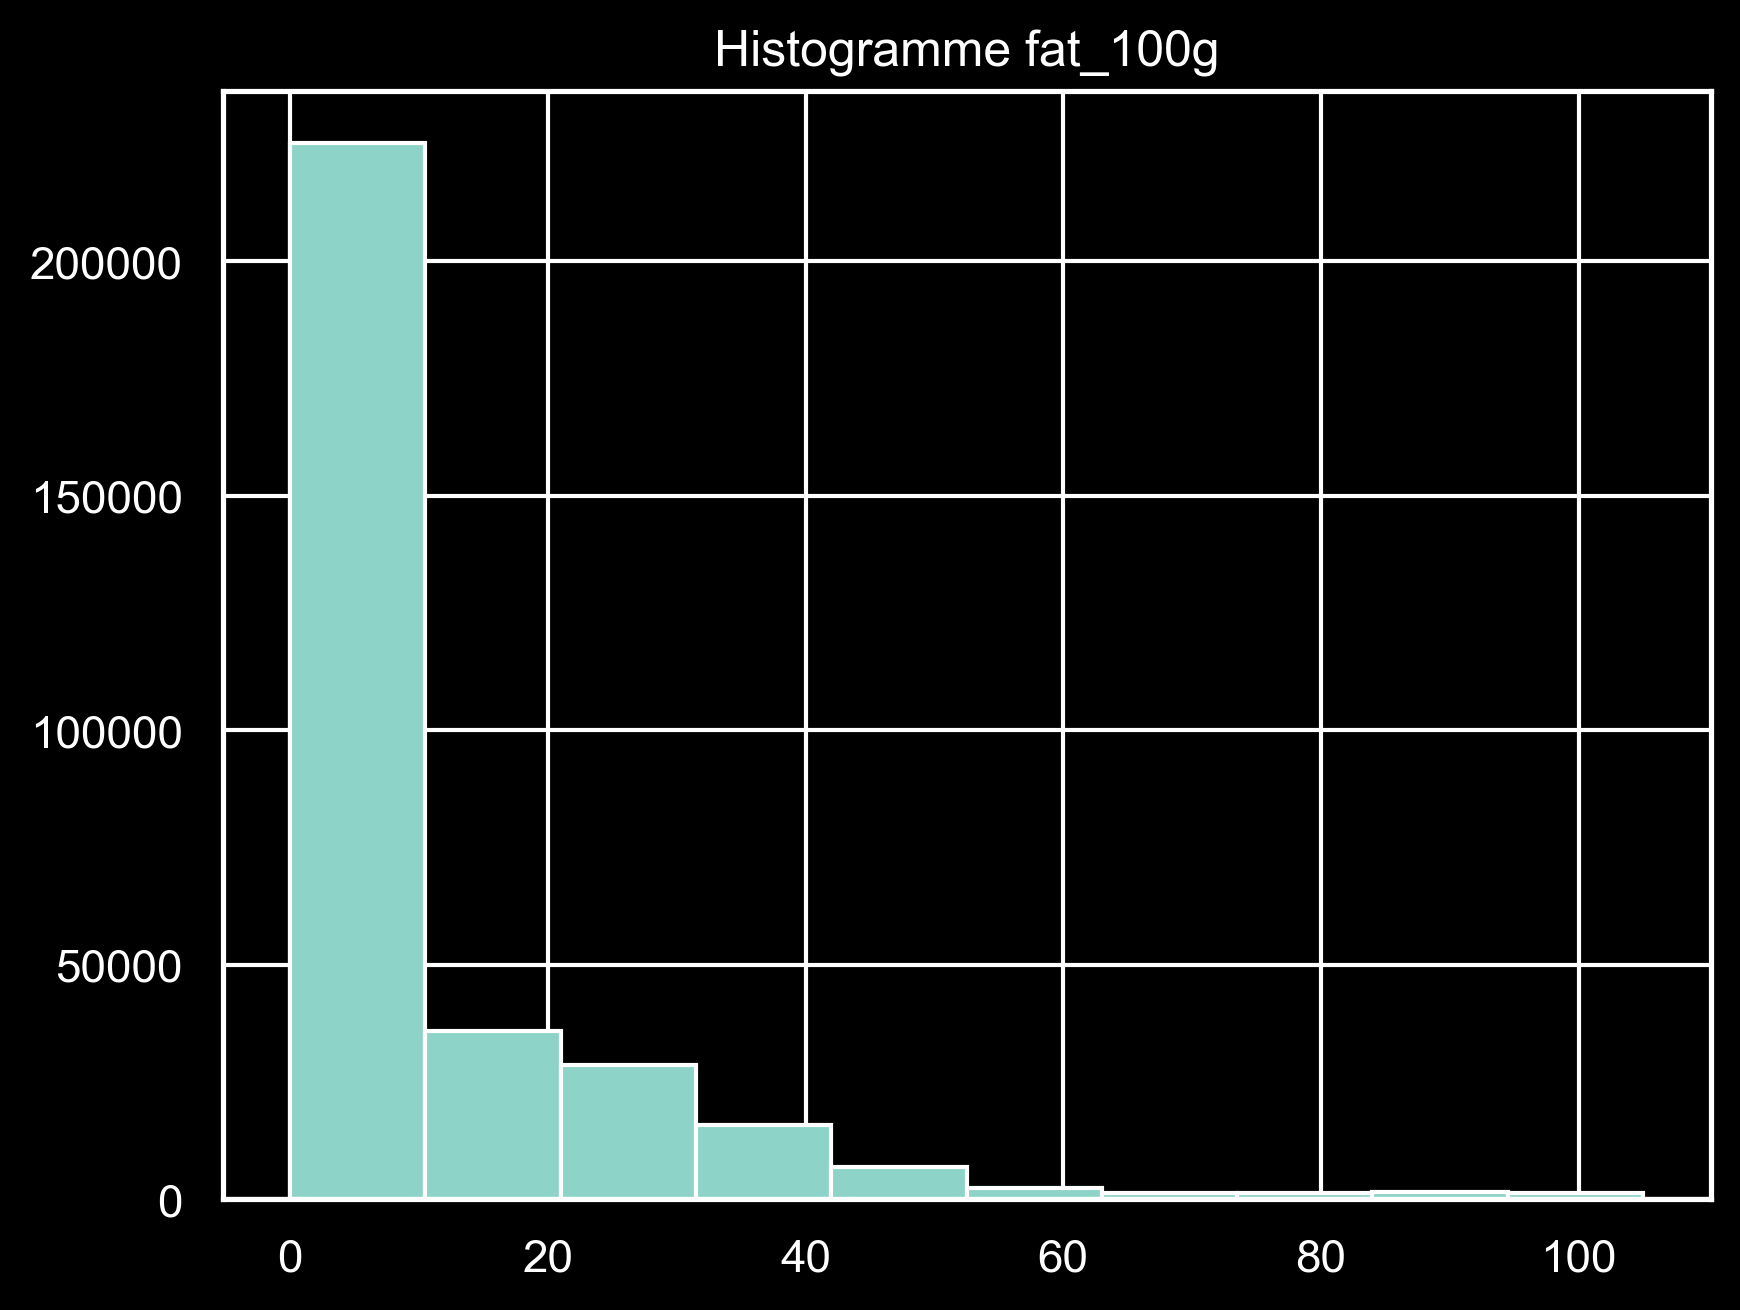

fat_100g


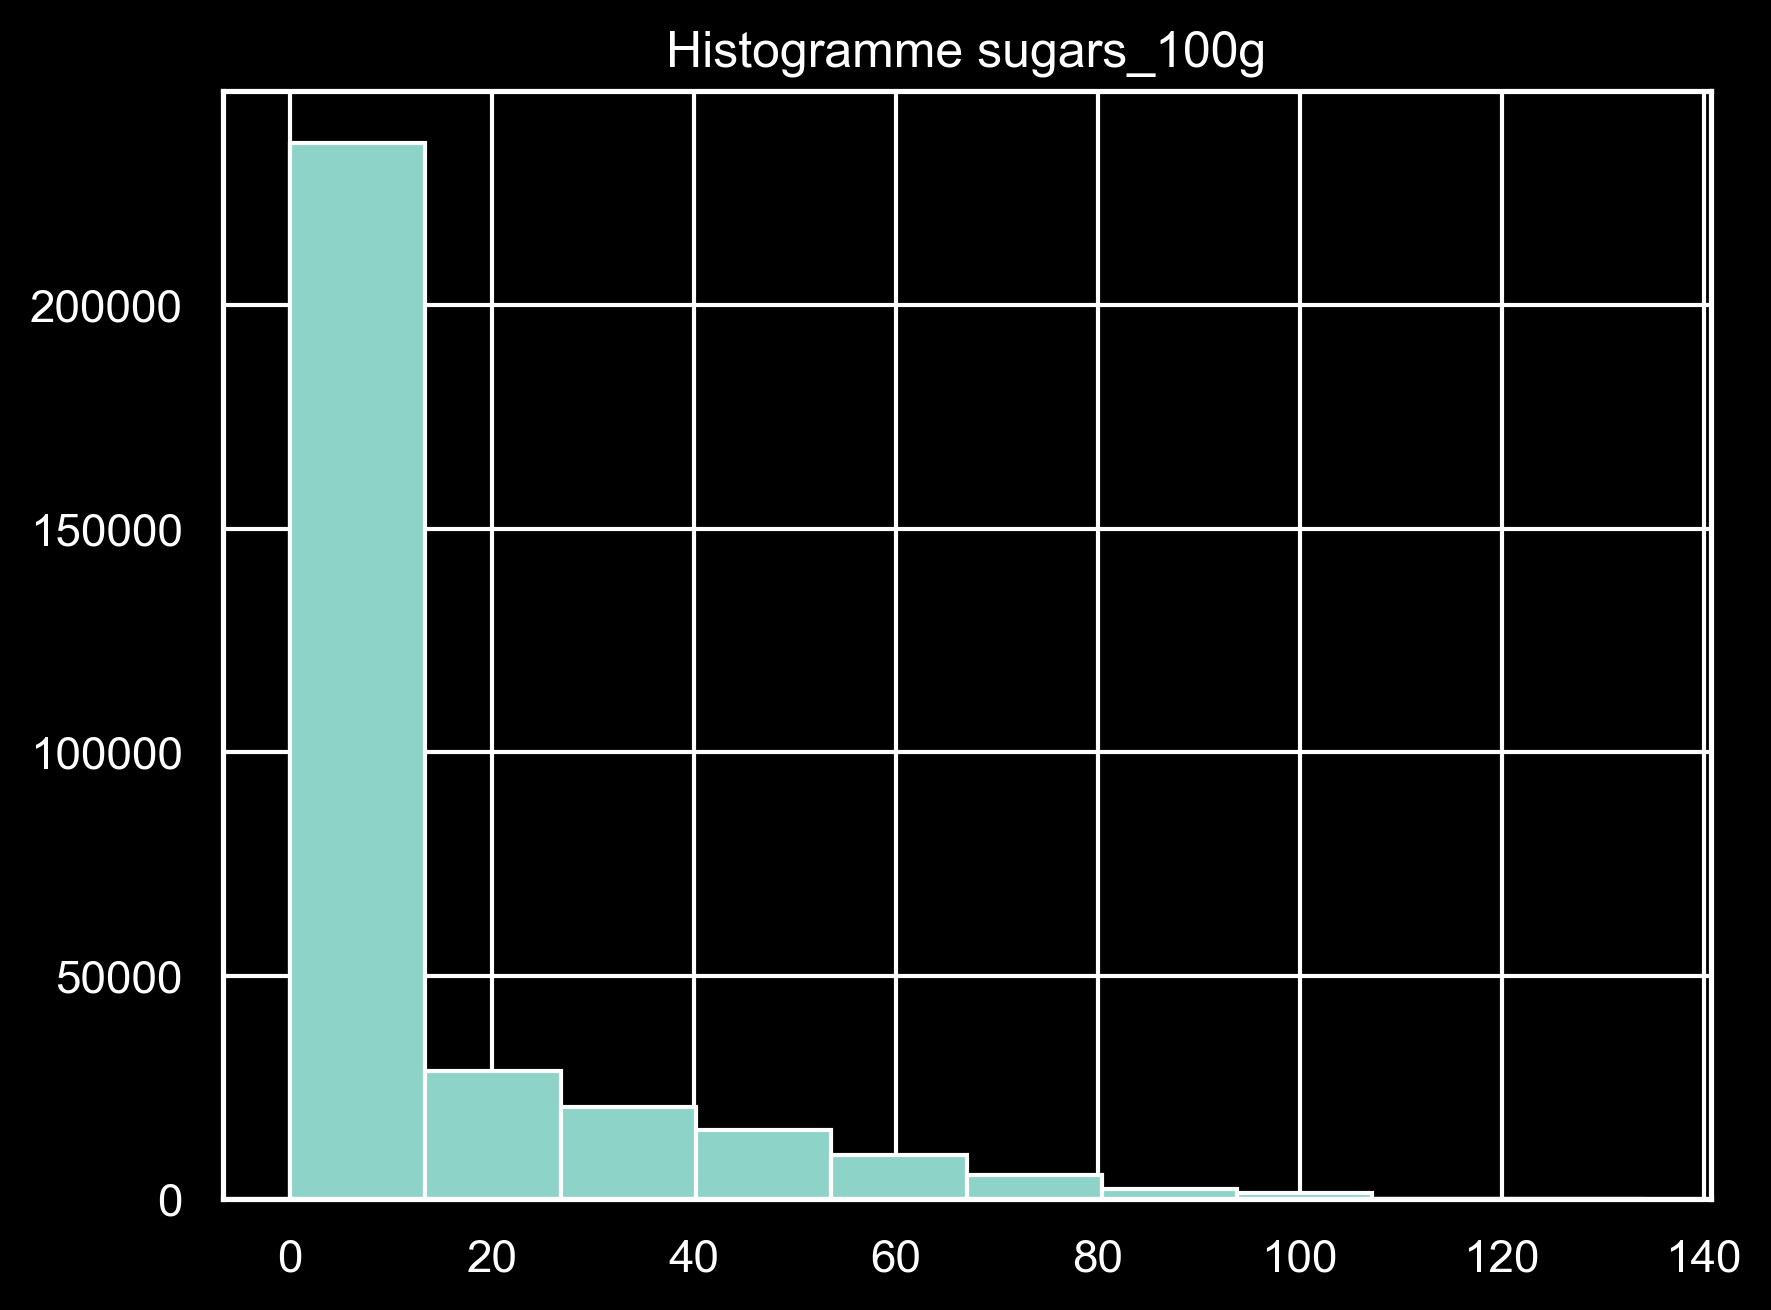

sugars_100g


In [8]:
# on vérifie que la distribution des variables est correcte
list_columns = ['energy_100g','fiber_100g','proteins_100g','carbohydrates_100g','sodium_100g','saturated-fat_100g','fat_100g','sugars_100g']

for columns_name in list_columns:
    plt.title(f"Histogramme {columns_name}")
    plt.hist(df[columns_name])
    plt.show()
    print(columns_name)

Conclusions : Les variables energy_100g et carbohydrates_100g sont bien réparties contrairement aux autres variables.

Cependant cela ne va pas forcément dire que les autres variables se concentrent sur une même valeur, mais plutôt que leur répartition est plus concentrée, nous allons confirmer celà avec les boites à moustaches.


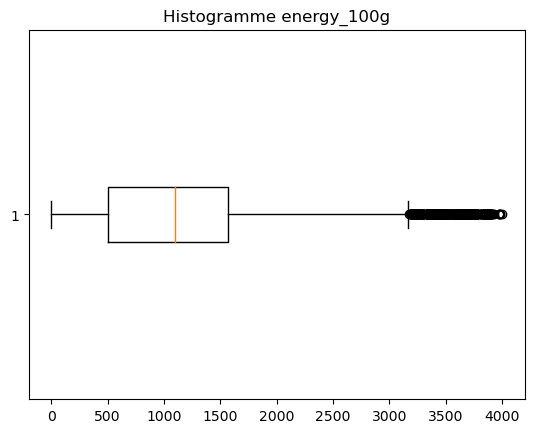

energy_100g


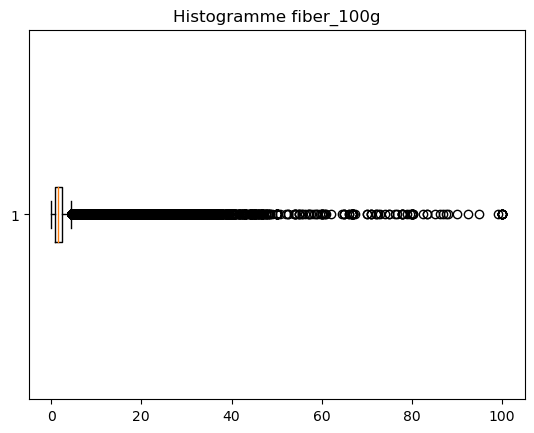

fiber_100g


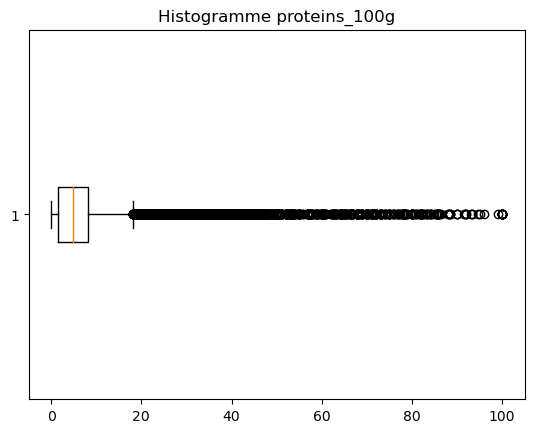

proteins_100g


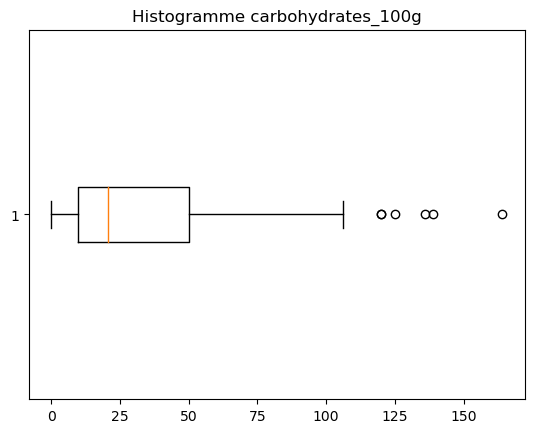

carbohydrates_100g


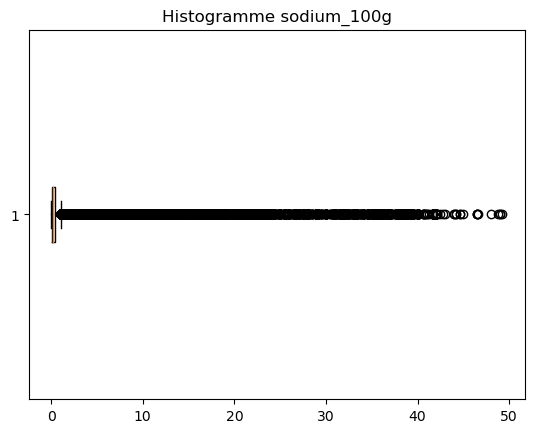

sodium_100g


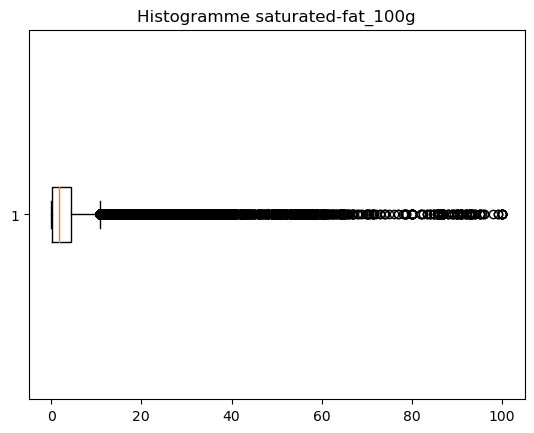

saturated-fat_100g


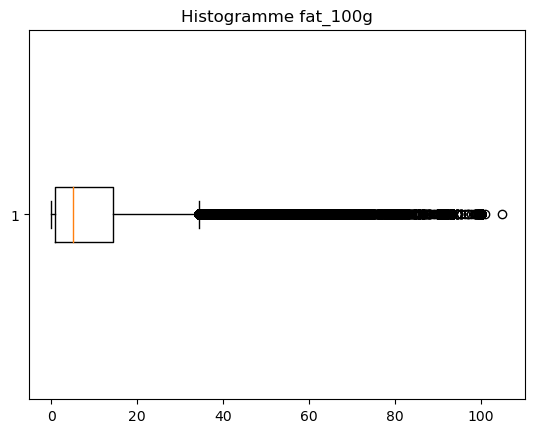

fat_100g


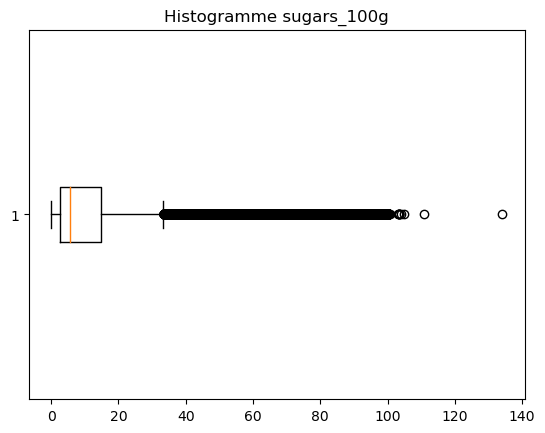

sugars_100g


In [9]:
# on représente la distribution des variables avec un boxplot
list_columns = ['energy_100g','fiber_100g','proteins_100g','carbohydrates_100g','sodium_100g','saturated-fat_100g','fat_100g','sugars_100g']
plt.style.use("default")
for columns_name in list_columns:
    plt.title(f"Histogramme {columns_name}")
    plt.boxplot(df[columns_name], vert=False)
    plt.show()
    print(columns_name)

Conclusions : De façon générale pour chaque variable il y a une concentration sur les valeurs faibles (souventre entre 0 et 40) avec des exceptions qui vont jusqu'à 100+

2. Distribution des variables qualitatives

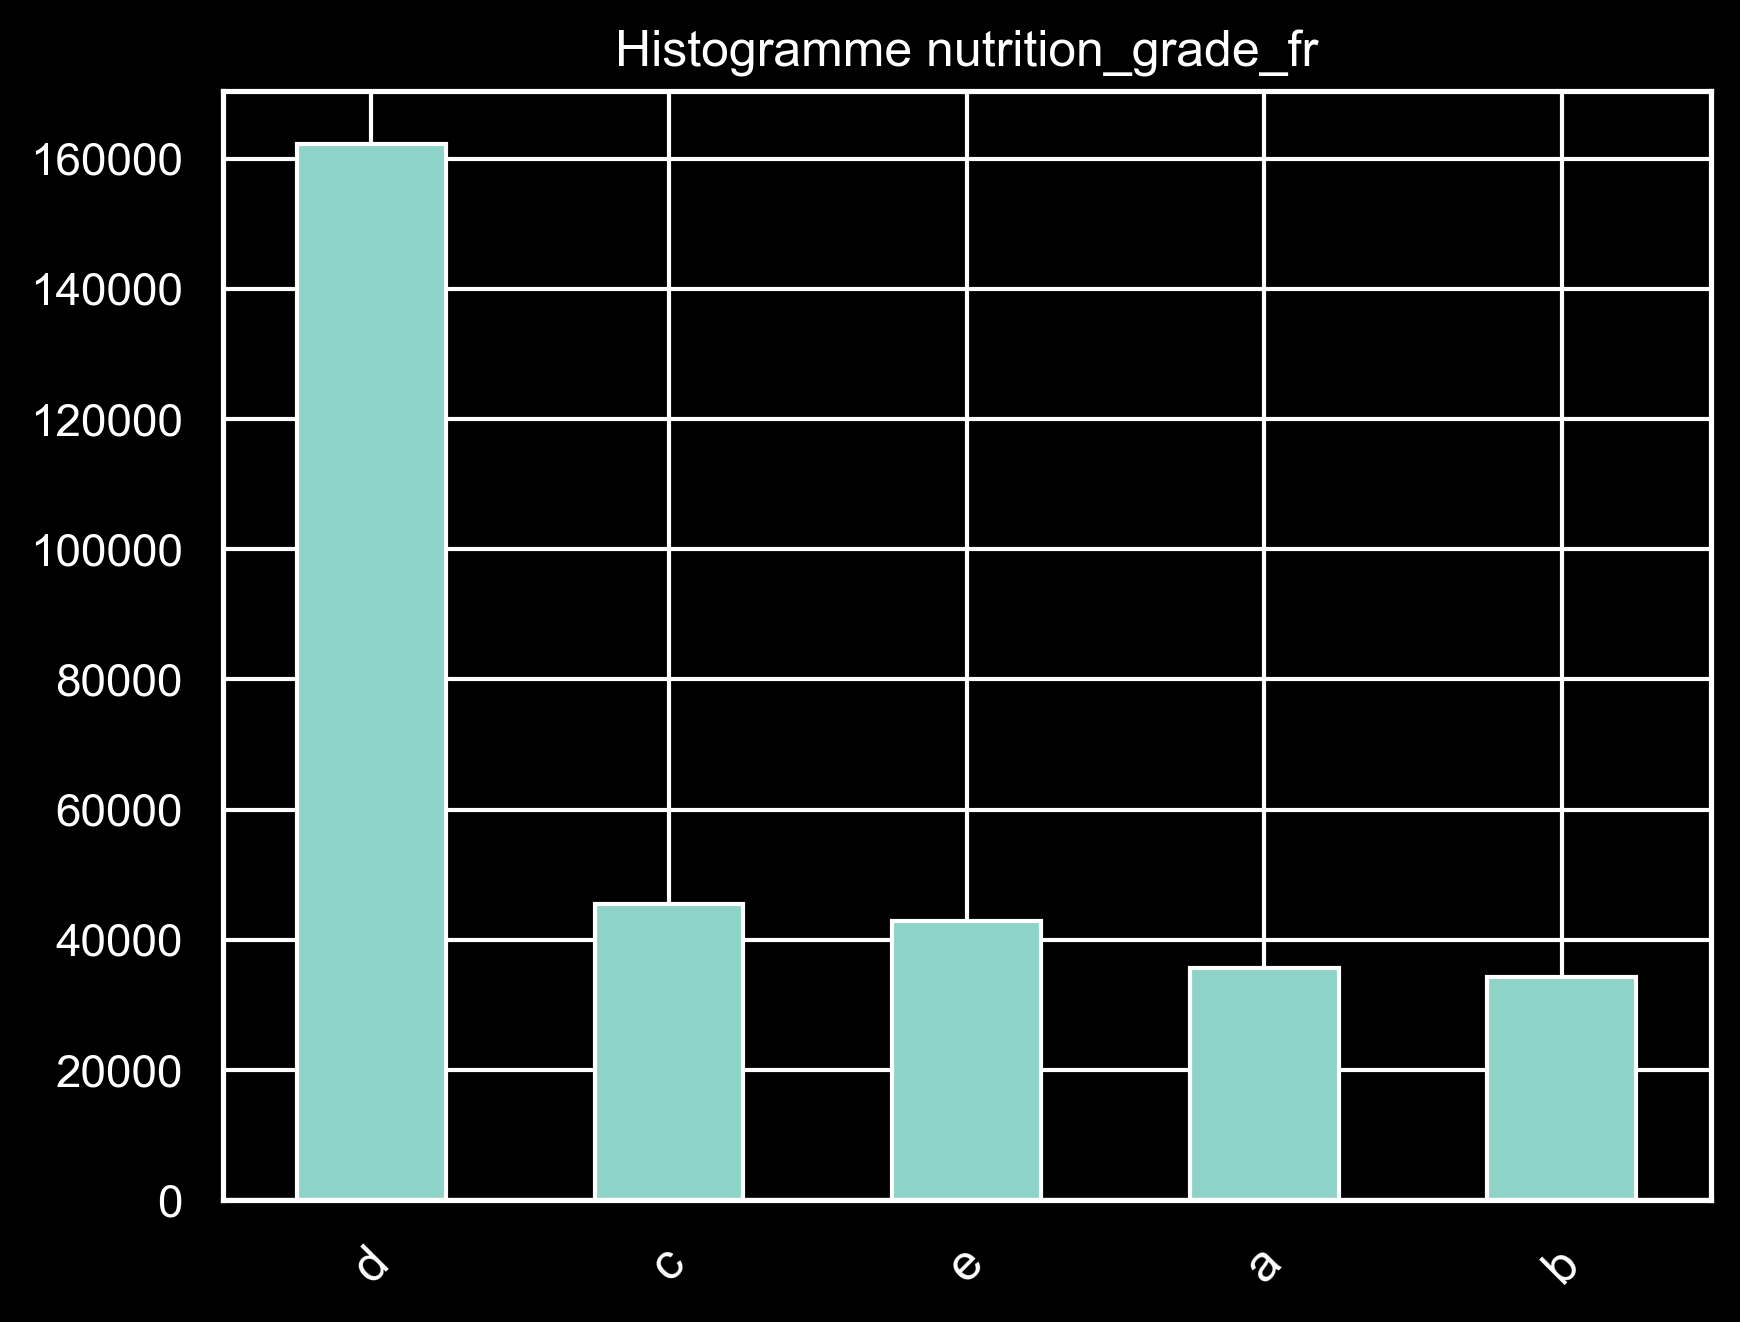

nutrition_grade_fr


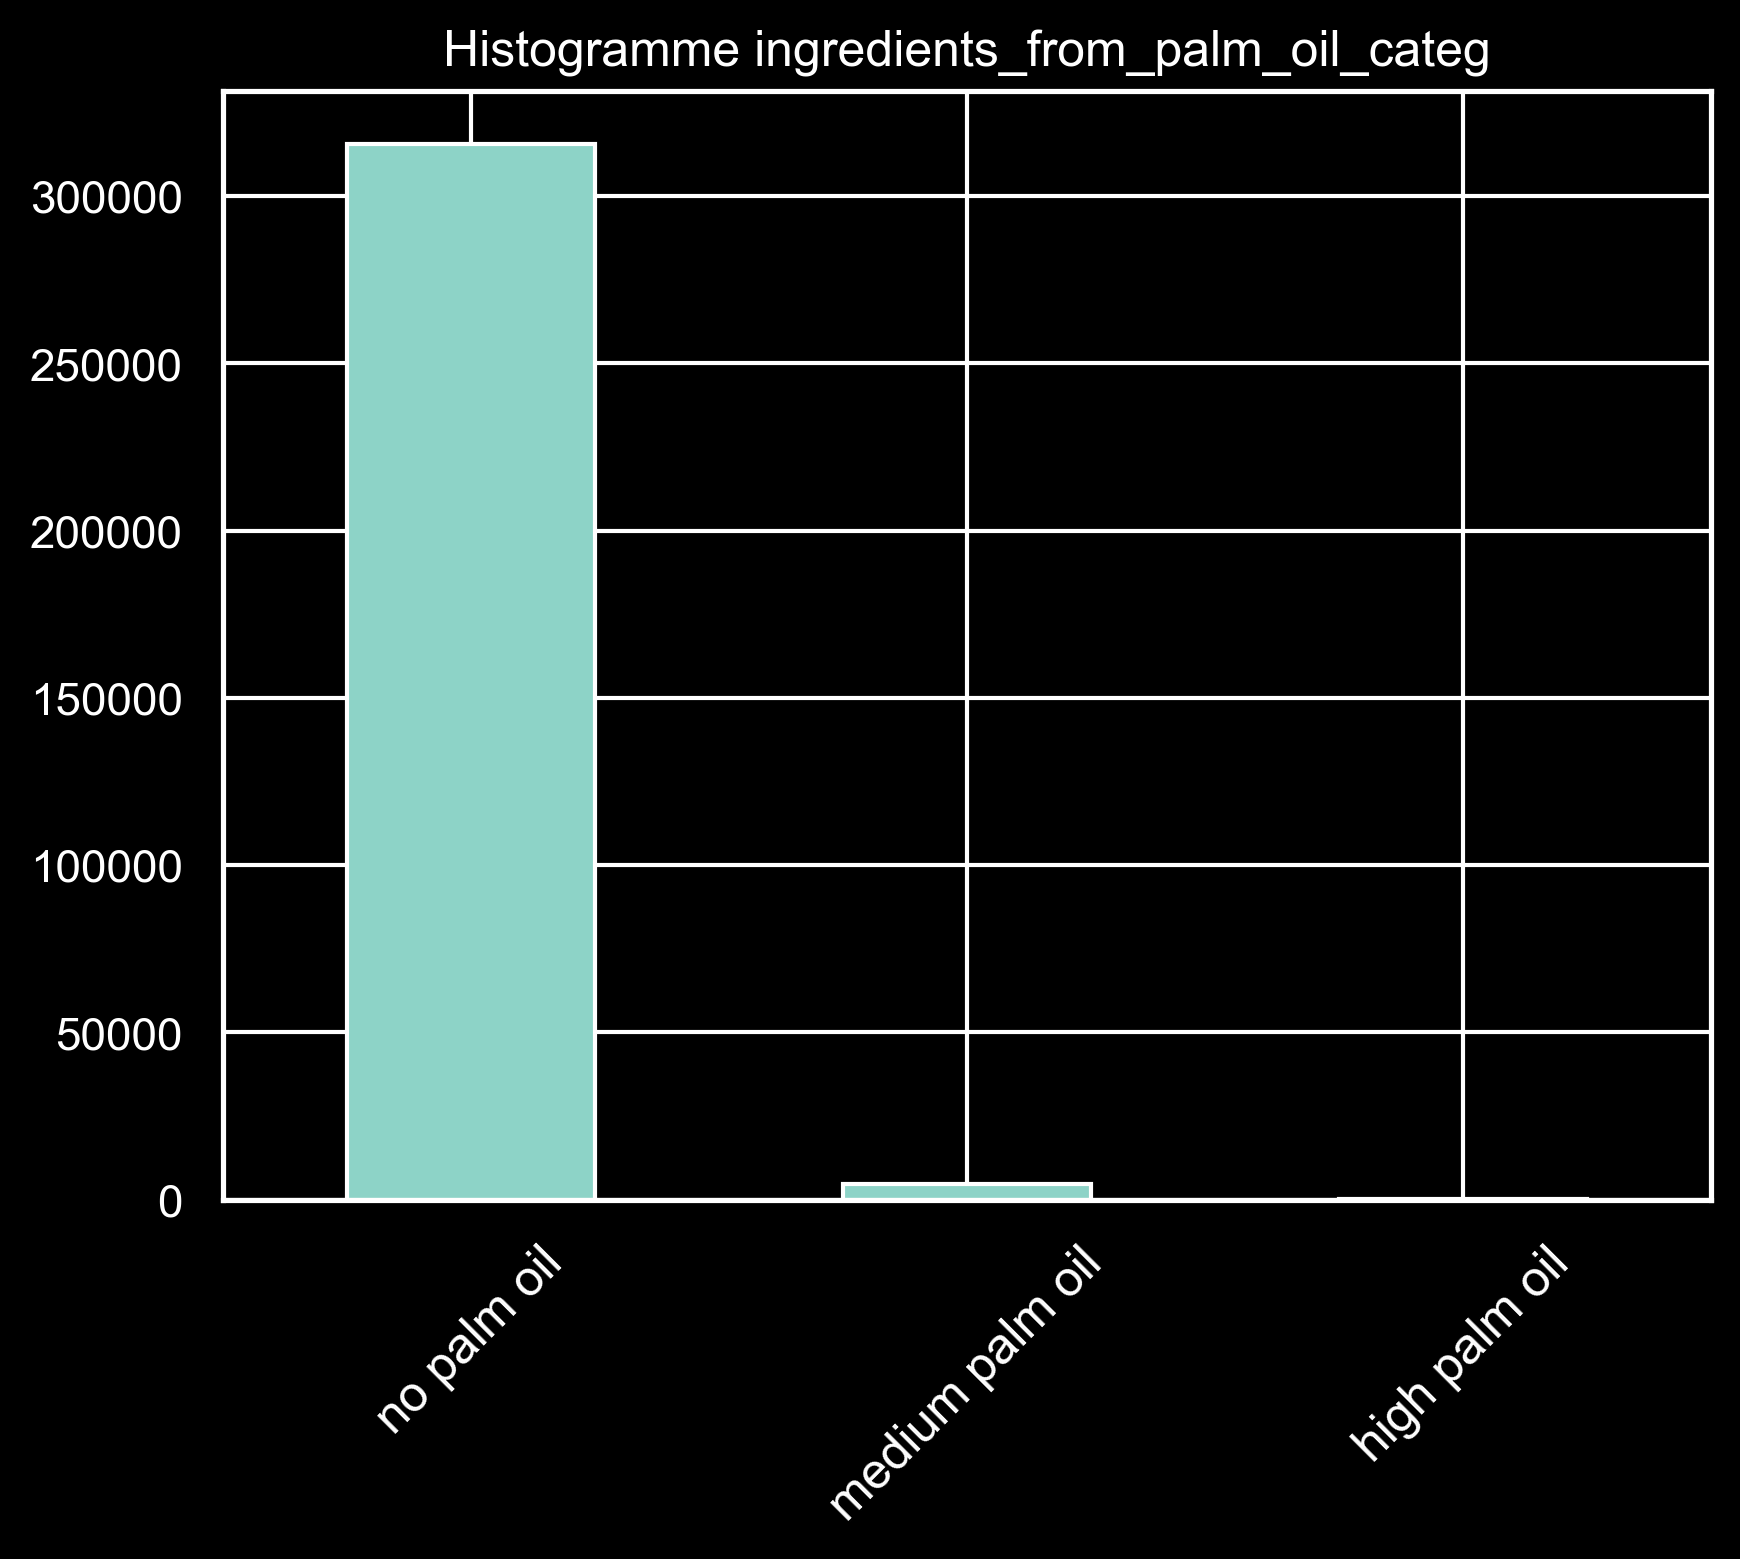

ingredients_from_palm_oil_categ


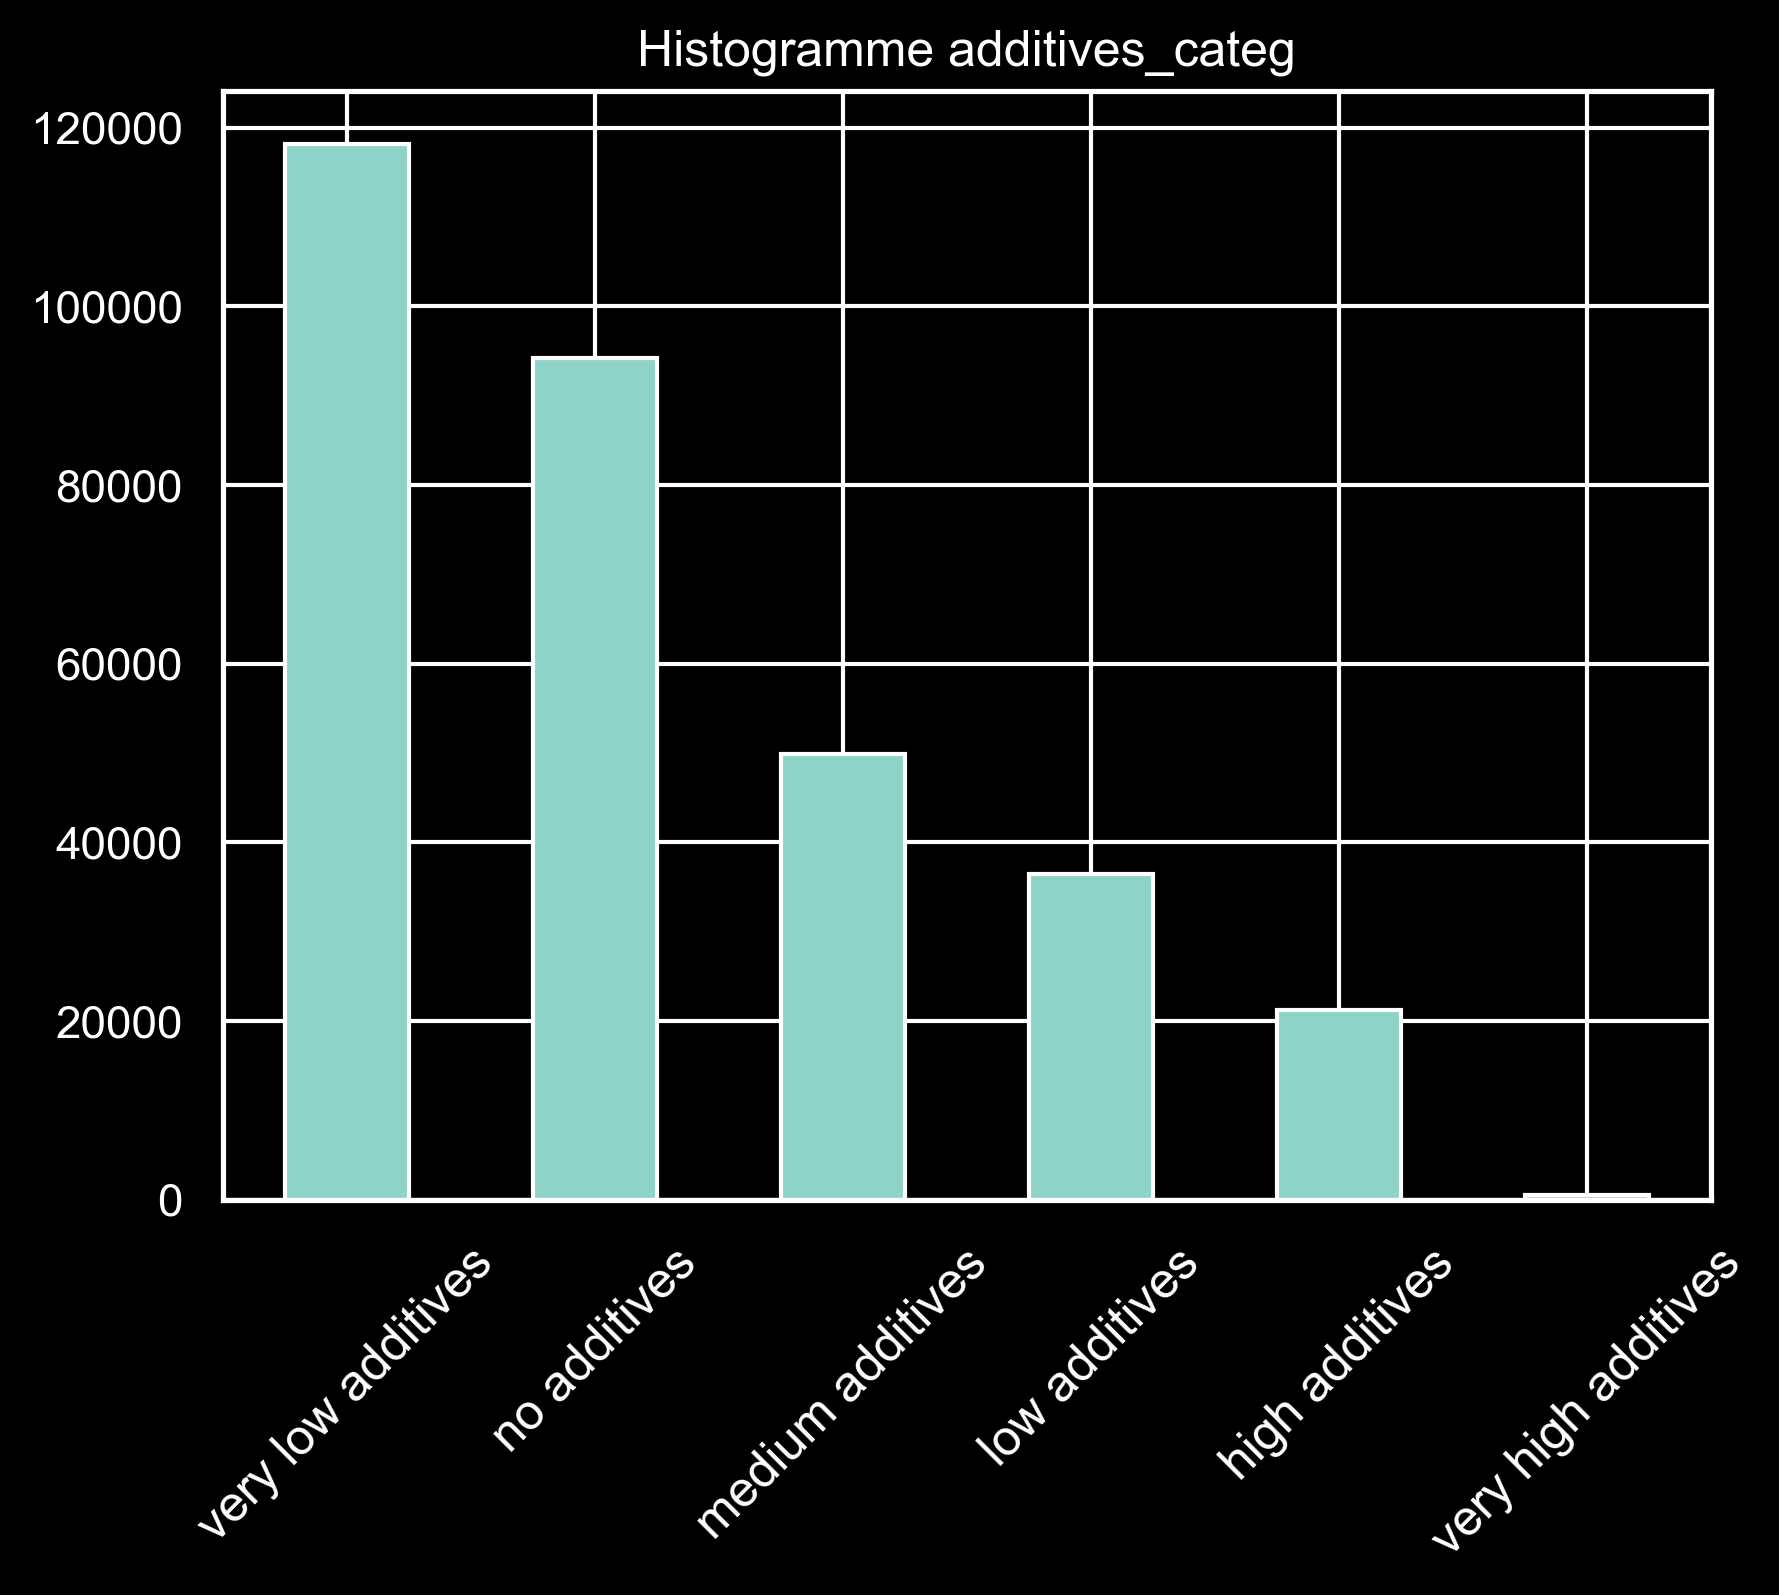

additives_categ


In [12]:
plt.style.use("dark_background")

list_columns = ['nutrition_grade_fr','ingredients_from_palm_oil_categ','additives_categ']

for columns_name in list_columns:
    plt.title(f"Histogramme {columns_name}")
    ax = df[columns_name].value_counts().plot(kind='bar')
    labels = ax.get_xticklabels()
    ax.set_xticklabels(labels, rotation=45,fontsize=12)
    plt.show()
    print(columns_name)

Conclusions : <br></br>
    - Pour la variable nutrition_grade_fr : une majorité se retrouves concentré sur le score D, tandis que les autres scores sont répartit équitablement.<br></br>
    - Pour la variable ingredients_from_palm_oil_categ : la majorité ne contiennent pas d'ingrédients
    à base d'huile de palme, seulement quelques uns<br></br>
    - Pour la variable additives_catef : environ 2/3 ne contiennent pas ou peu d'additifs, l'autre tiers en revanche va de medium à trés haut.    

# <a name="C2">II. Analyse Bivariée<a/>

I. Correlations entres les variables et tests statistiques

In [11]:
# calcul du coefficient de pearson
correlation_matrix = df.corr()
pearson_corr, p_value = pearsonr(df['proteins_100g'], df['fat_100g'])
pearson_corr

# on voit donc qu'il y a une relation linéaire positive faible entre les deux variables

0.23598804384216296

In [12]:
# calcul du coefficient de pearson, méthode 2
print(st.pearsonr(df["proteins_100g"],df["fat_100g"])[0])

0.23598804384216296


In [13]:
# calcul de la covariance
# la covariance est positive, il existe donc une relation linéaire positive entre les deux variables,
# ce qui signifie que lorsque l'une des deux variable augmente, la valeur de l'autre variable augmente
# également.
print(np.cov(df["proteins_100g"],df["fat_100g"],ddof=0)[1,0])

27.225101960539273


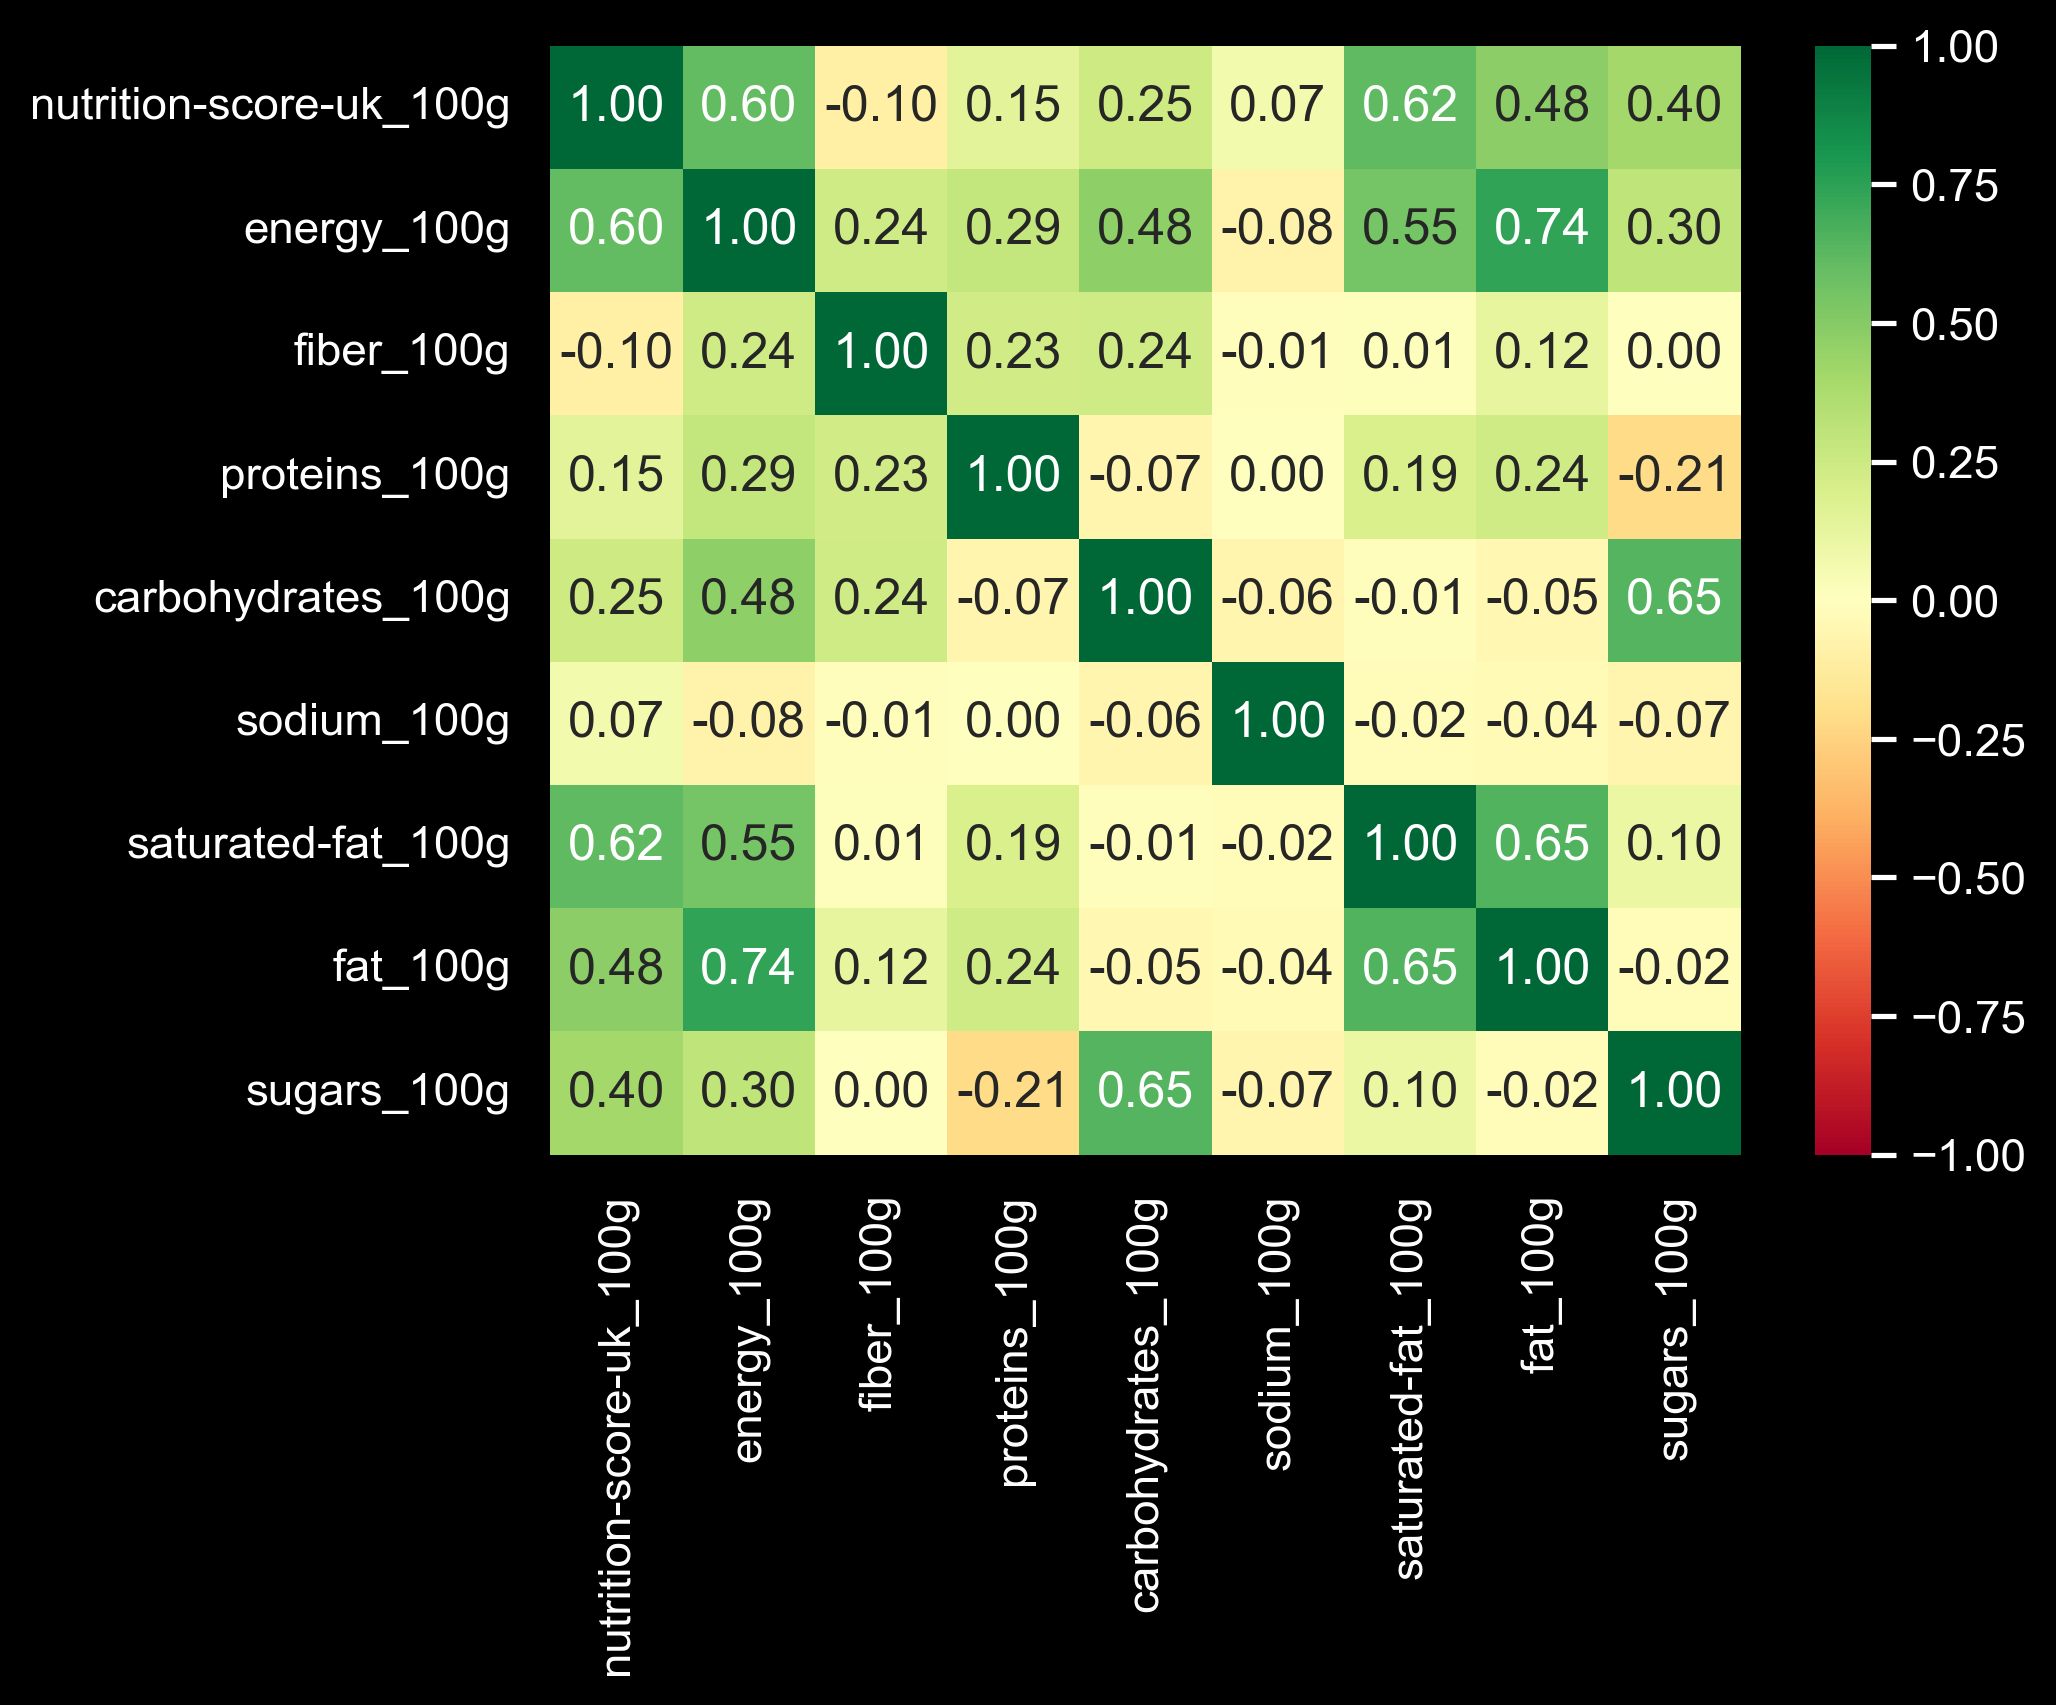

In [13]:
# afin d'automatiser le traitement pour chaque variables, on affiche la matrice des corrélation avec une heatmap
# on voit que : énergie et gras sont corrélés, ainsi que le sucre avec les lipides
# en revanche le sucre et la protéine ne sont pas corréllés
# on voit également que les facteurs corréllés au nutriscore anglais sont : les calories, les graisses
# et le sucre.

ax = sns.heatmap(df.corr(), cmap='RdYlGn', annot=True, fmt=".2f",vmin=-1, vmax=1)

CONCLUSIONS : <br></br>
    Très forte corrélation pour les variables :<br></br>
        - fat_100g & energy_100g<br></br>
        - sugars_100g & carbohydrates_100g<br></br>
        - saturated_fat_100g & nutrition-score-uk_100g<br></br>

   Très faible corrélation pour les variables : <br></br>
        - fiber_100g & nutrition-score-uk_100g<br></br>
        - sugars_100g & proteins_100g<br></br>
        - sodium_100g & energy_100g
   

II. Analyse Quantivative / Quantivative

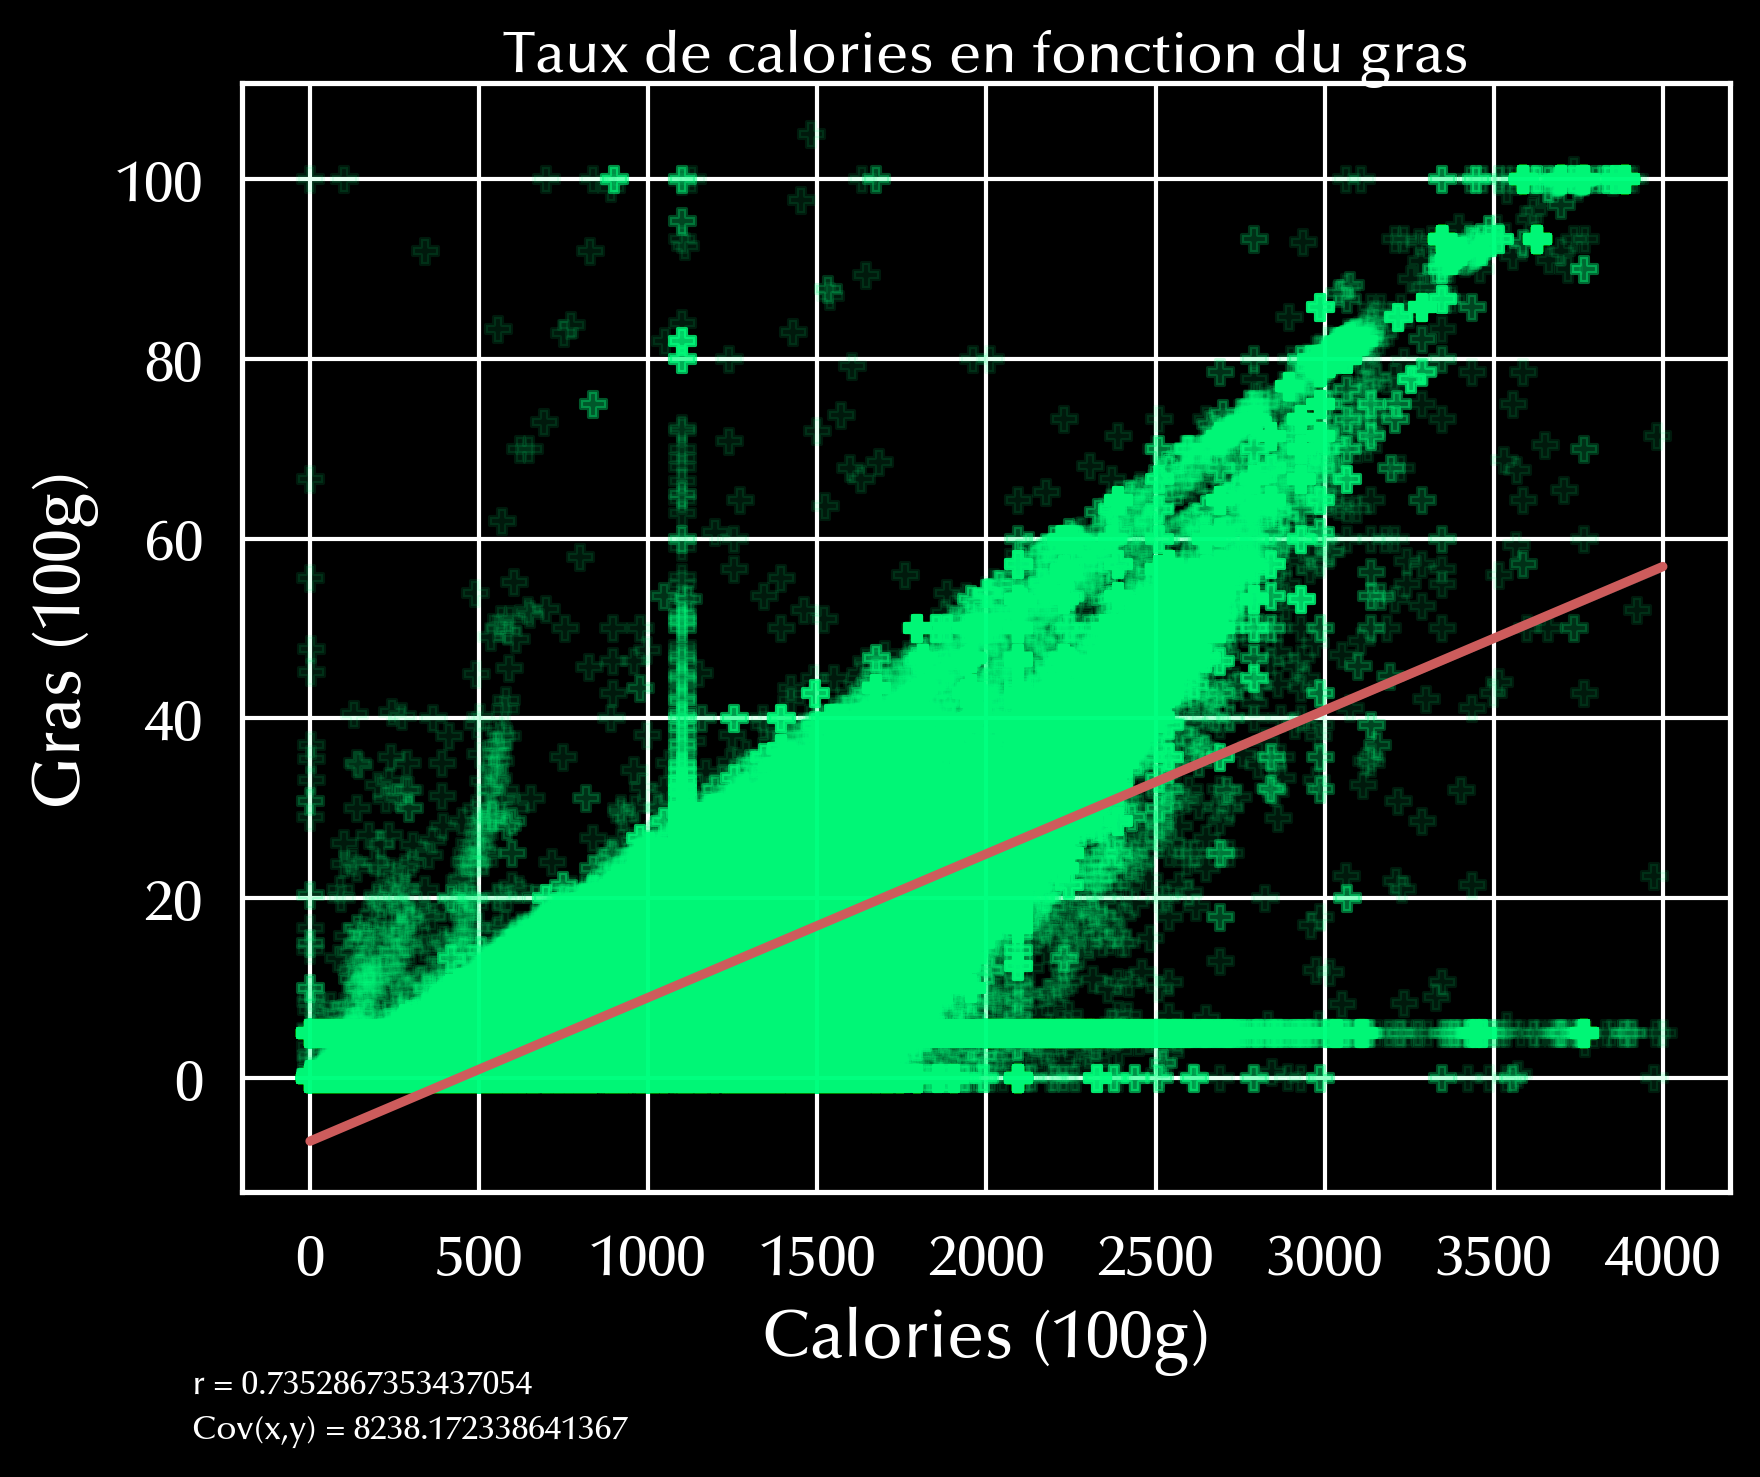

In [37]:
# on stocke la valeur du coefficient de pearson dans une variable
r_value = st.pearsonr(df["energy_100g"],df["fat_100g"])[0]
# même chose pour la covariance
cov_value = np.cov(df["energy_100g"],df["fat_100g"],ddof=0)[1,0]

#customisation visuelle du graph
plt.title("Taux de calories en fonction du gras", fontproperties=prop, **text_kwargs)
plt.xticks(fontsize=14, fontproperties=prop)
plt.yticks(fontsize=14, fontproperties=prop)
ax = sns.regplot(x="energy_100g", y="fat_100g", data=df, color='springgreen',line_kws={"color":"indianred"},scatter_kws={"alpha":0.1,"edgecolor":"springgreen"}, marker='P')
plt.xlabel("Calories (100g)", fontproperties=prop, size = 16)
plt.ylabel("Gras (100g)", fontproperties=prop, size = 16)
plt.text(-350, -35, 'r = {}'.format(r_value), fontproperties=prop, size=8)
plt.text(-350, -40, 'Cov(x,y) = {}'.format(cov_value), fontproperties=prop, size=8)
ax.grid(True)
plt.show()

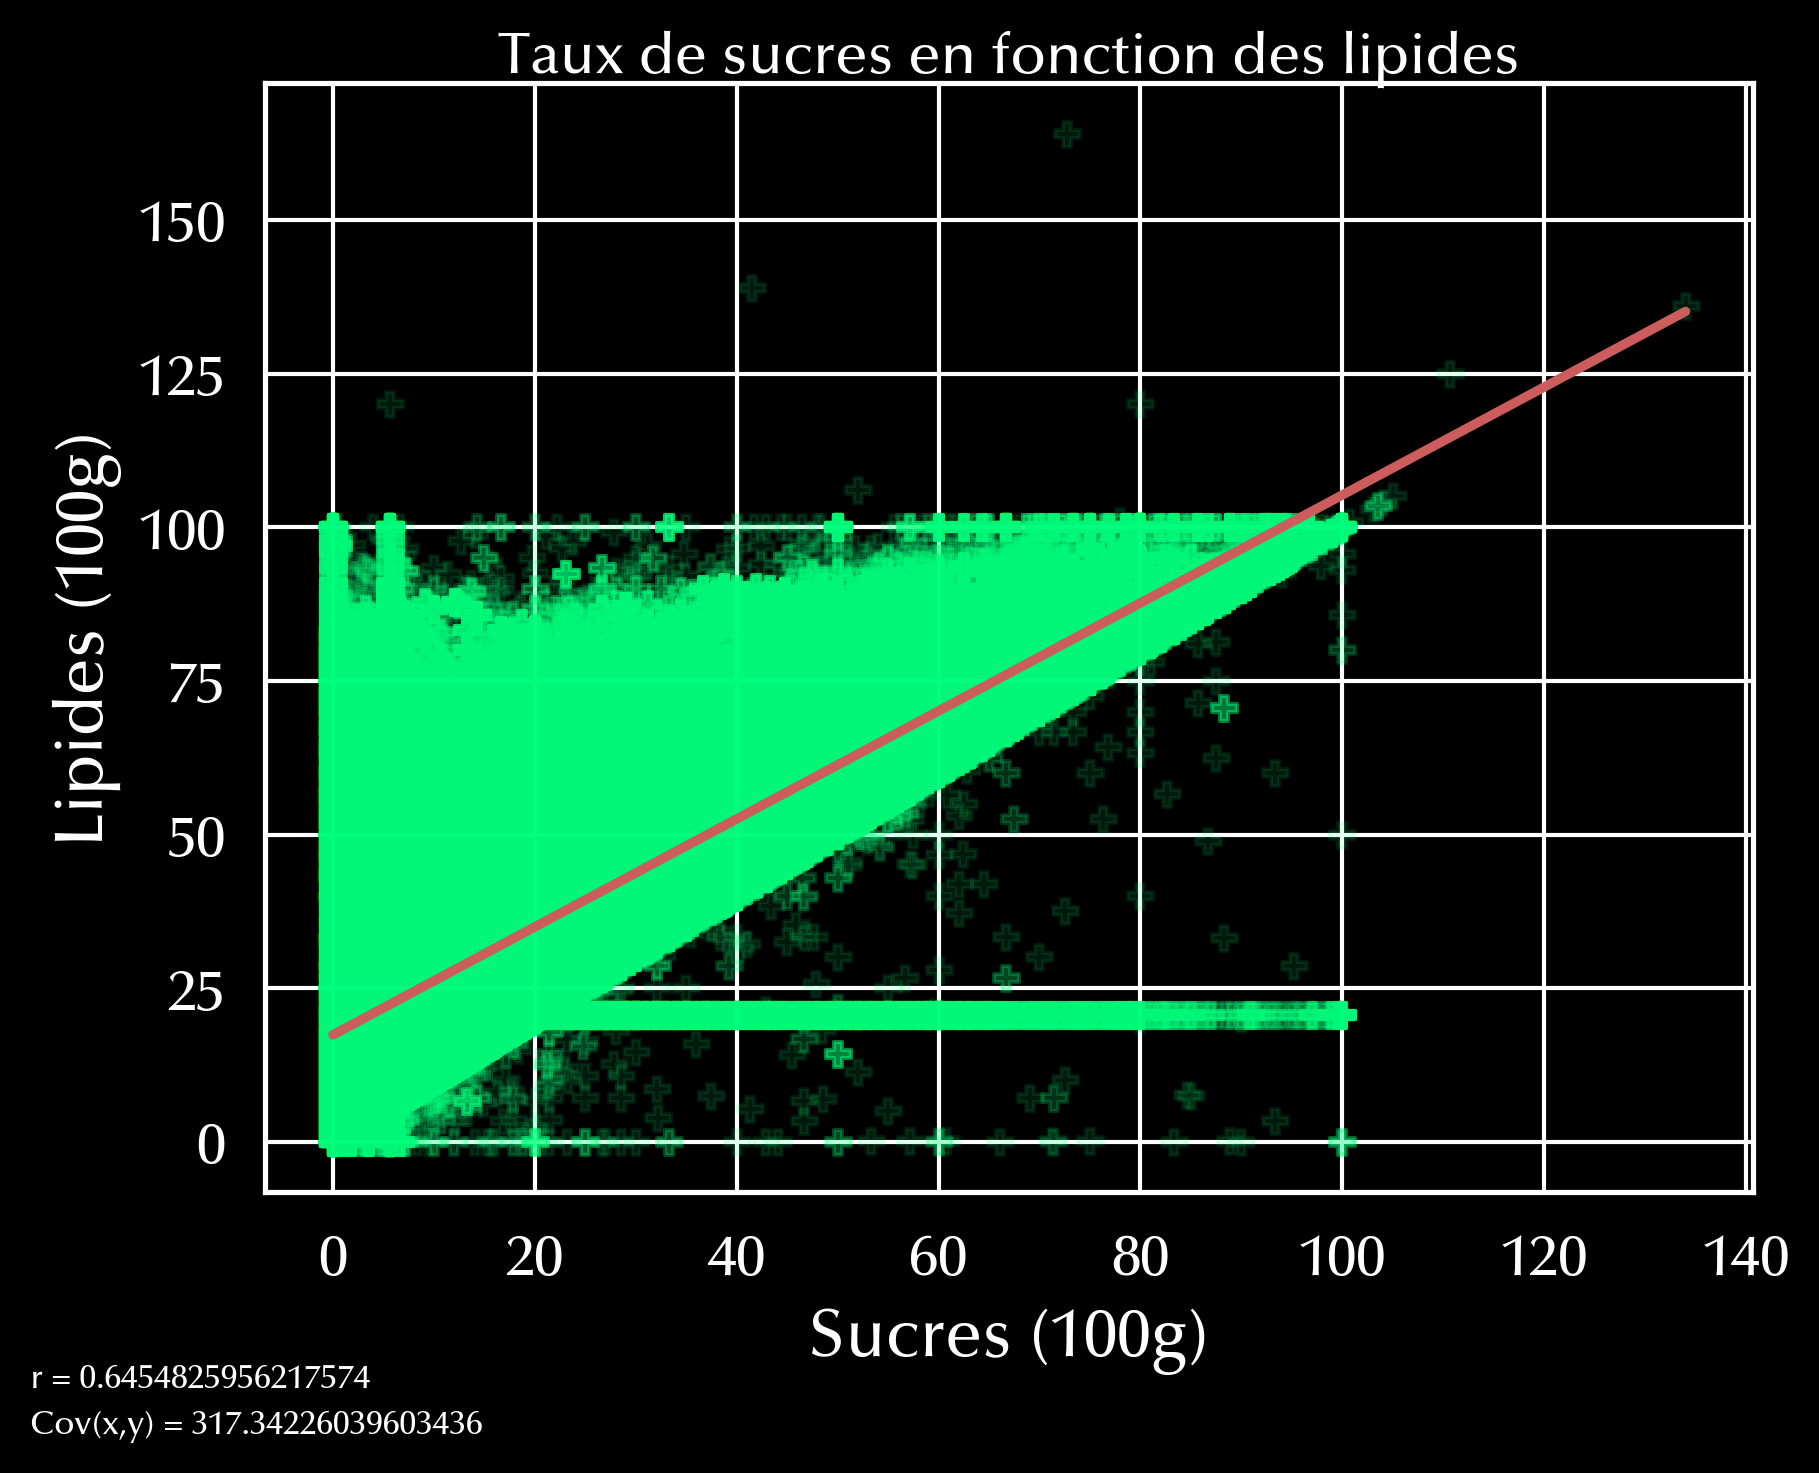

In [38]:
r_value = st.pearsonr(df["sugars_100g"],df["carbohydrates_100g"])[0]
cov_value = np.cov(df["sugars_100g"],df["carbohydrates_100g"],ddof=0)[1,0]
plt.title("Taux de sucres en fonction des lipides", fontproperties=prop, **text_kwargs)
plt.xticks(fontsize=14, fontproperties=prop)
plt.yticks(fontsize=14, fontproperties=prop)

ax = sns.regplot(x="sugars_100g", y="carbohydrates_100g", data=df,color='springgreen', line_kws={"color":"indianred"},scatter_kws={"alpha":0.1}, marker='P', )
plt.xlabel("Sucres (100g)", fontproperties=prop, size = 16)
plt.ylabel("Lipides (100g)", fontproperties=prop, size = 16)
plt.text(-30, -40, 'r = {}'.format(r_value), fontproperties=prop, size=8)
plt.text(-30, -47.5, 'Cov(x,y) = {}'.format(cov_value), fontproperties=prop, size=8)
plt.show()

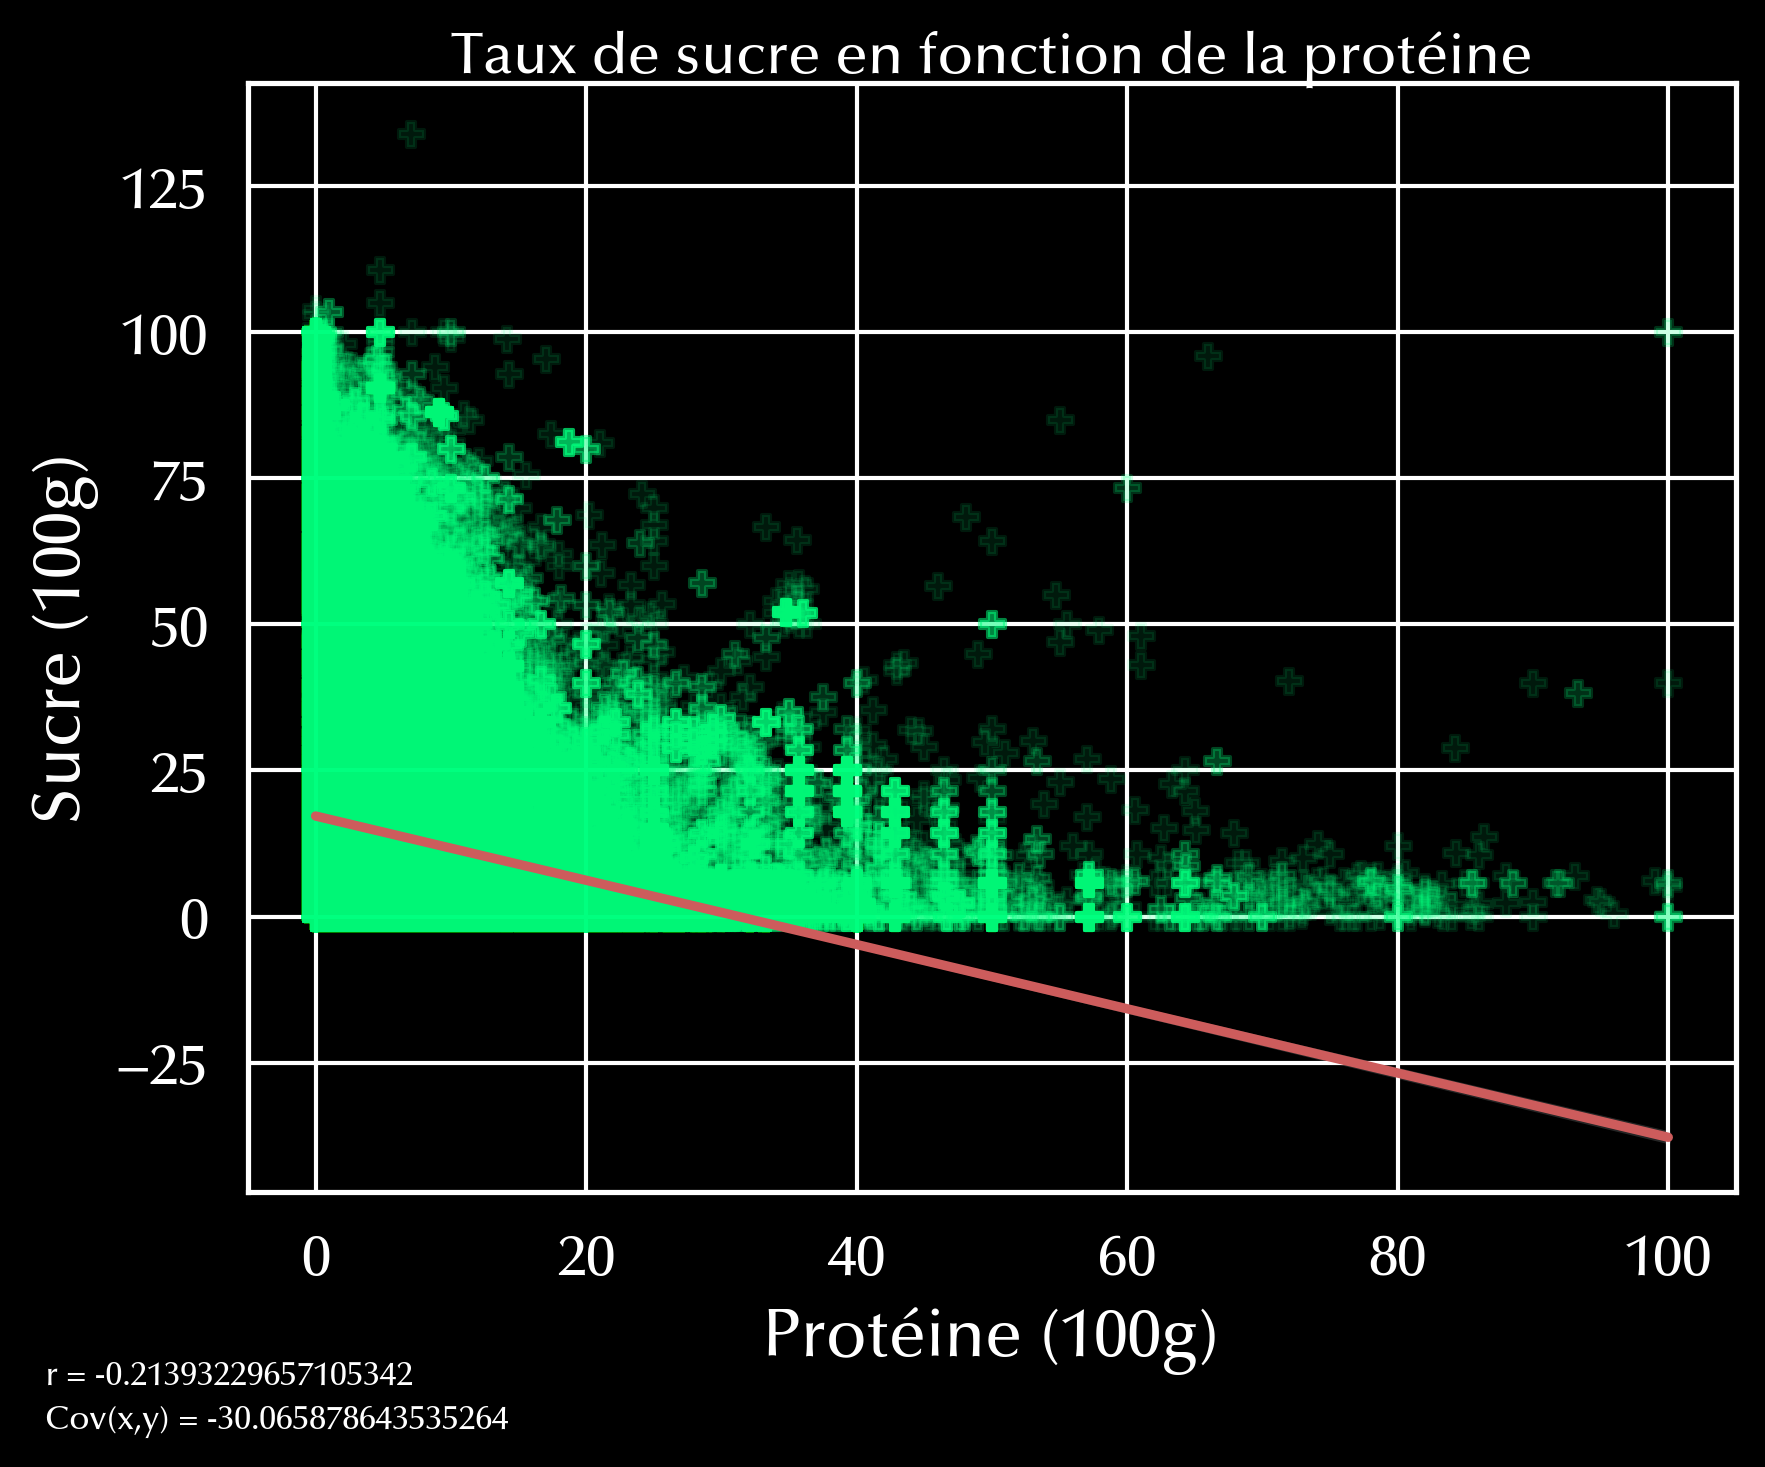

In [39]:
r_value = st.pearsonr(df["sugars_100g"],df["proteins_100g"])[0]
cov_value = np.cov(df["sugars_100g"],df["proteins_100g"],ddof=0)[1,0]
plt.title("Taux de sucre en fonction de la protéine", fontproperties=prop, **text_kwargs)
plt.xticks(fontsize=14, fontproperties=prop)
plt.yticks(fontsize=14, fontproperties=prop)
sns.regplot(x="proteins_100g", y="sugars_100g", data=df, color='springgreen', line_kws={"color":"indianred"},scatter_kws={"alpha":0.1}, marker='P', )
plt.xlabel("Protéine (100g)", fontproperties=prop, size = 16)
plt.ylabel("Sucre (100g)", fontproperties=prop, size = 16)
plt.text(-20, -80, 'r = {}'.format(r_value), fontproperties=prop, size=8)
plt.text(-20, -87.5, 'Cov(x,y) = {}'.format(cov_value), fontproperties=prop, size=8)
plt.show()

# ANOVA

In [39]:
def anova()
# diviser les données en groupes en fonction de la variable qualitative
groupe_a = df[df['nutrition_grade_fr'] == 'a']['proteins_100g']
groupe_b = df[df['nutrition_grade_fr'] == 'b']['proteins_100g']
groupe_c = df[df['nutrition_grade_fr'] == 'c']['proteins_100g']
groupe_d = df[df['nutrition_grade_fr'] == 'd']['proteins_100g']
groupe_e = df[df['nutrition_grade_fr'] == 'e']['proteins_100g']

# effectuer une ANOVA
resultat_anova = f_oneway(groupe_a, groupe_b, groupe_c, groupe_d, groupe_e)

# afficher les résultats
print(resultat_anova)

F_onewayResult(statistic=2625.433862200737, pvalue=0.0)


In [40]:
def anova(data, variable_qualitative):
    # liste des variables quantitatives
    variables_quantitatives = list(data.select_dtypes(include=['float64', 'int64']).columns)

    # dictionnaire pour stocker les résultats de l'ANOVA pour chaque variable quantitative
    anova_results = {}

    # boucle pour effectuer l'ANOVA pour chaque variable quantitative
    for var in variables_quantitatives:
        # diviser les données en groupes en fonction de la variable qualitative
        groupes = [data[data[variable_qualitative] == g][var] for g in data[variable_qualitative].unique()]

        # effectuer l'ANOVA
        resultat_anova = f_oneway(*groupes)

        # stocker les résultats dans le dictionnaire
        anova_results[var] = {"statistique": resultat_anova.statistic, "p_value": resultat_anova.pvalue}

    # retourner le dictionnaire avec les résultats de l'ANOVA
    return anova_results

In [41]:
resultats_anova = anova(df, "nutrition_grade_fr")

# afficher les résultats de l'ANOVA pour chaque variable quantitative
for var in resultats_anova:
    print("Variable quantitative : ", var)
    print("Statistique F : ", resultats_anova[var]["statistique"])
    print("p-value : ", resultats_anova[var]["p_value"])
    print("---------------------------")

Variable quantitative :  nutrition-score-uk_100g
Statistique F :  337197.4387495312
p-value :  0.0
---------------------------
Variable quantitative :  energy_100g
Statistique F :  27168.86704338987
p-value :  0.0
---------------------------
Variable quantitative :  fiber_100g
Statistique F :  4852.489219191487
p-value :  0.0
---------------------------
Variable quantitative :  proteins_100g
Statistique F :  2625.4338622007385
p-value :  0.0
---------------------------
Variable quantitative :  carbohydrates_100g
Statistique F :  3203.6929934811556
p-value :  0.0
---------------------------
Variable quantitative :  sodium_100g
Statistique F :  657.32220442777
p-value :  0.0
---------------------------
Variable quantitative :  saturated-fat_100g
Statistique F :  42458.60373264301
p-value :  0.0
---------------------------
Variable quantitative :  fat_100g
Statistique F :  16492.28302041635
p-value :  0.0
---------------------------
Variable quantitative :  sugars_100g
Statistique F :  10

III. Analyse Quantivative / Qualitative

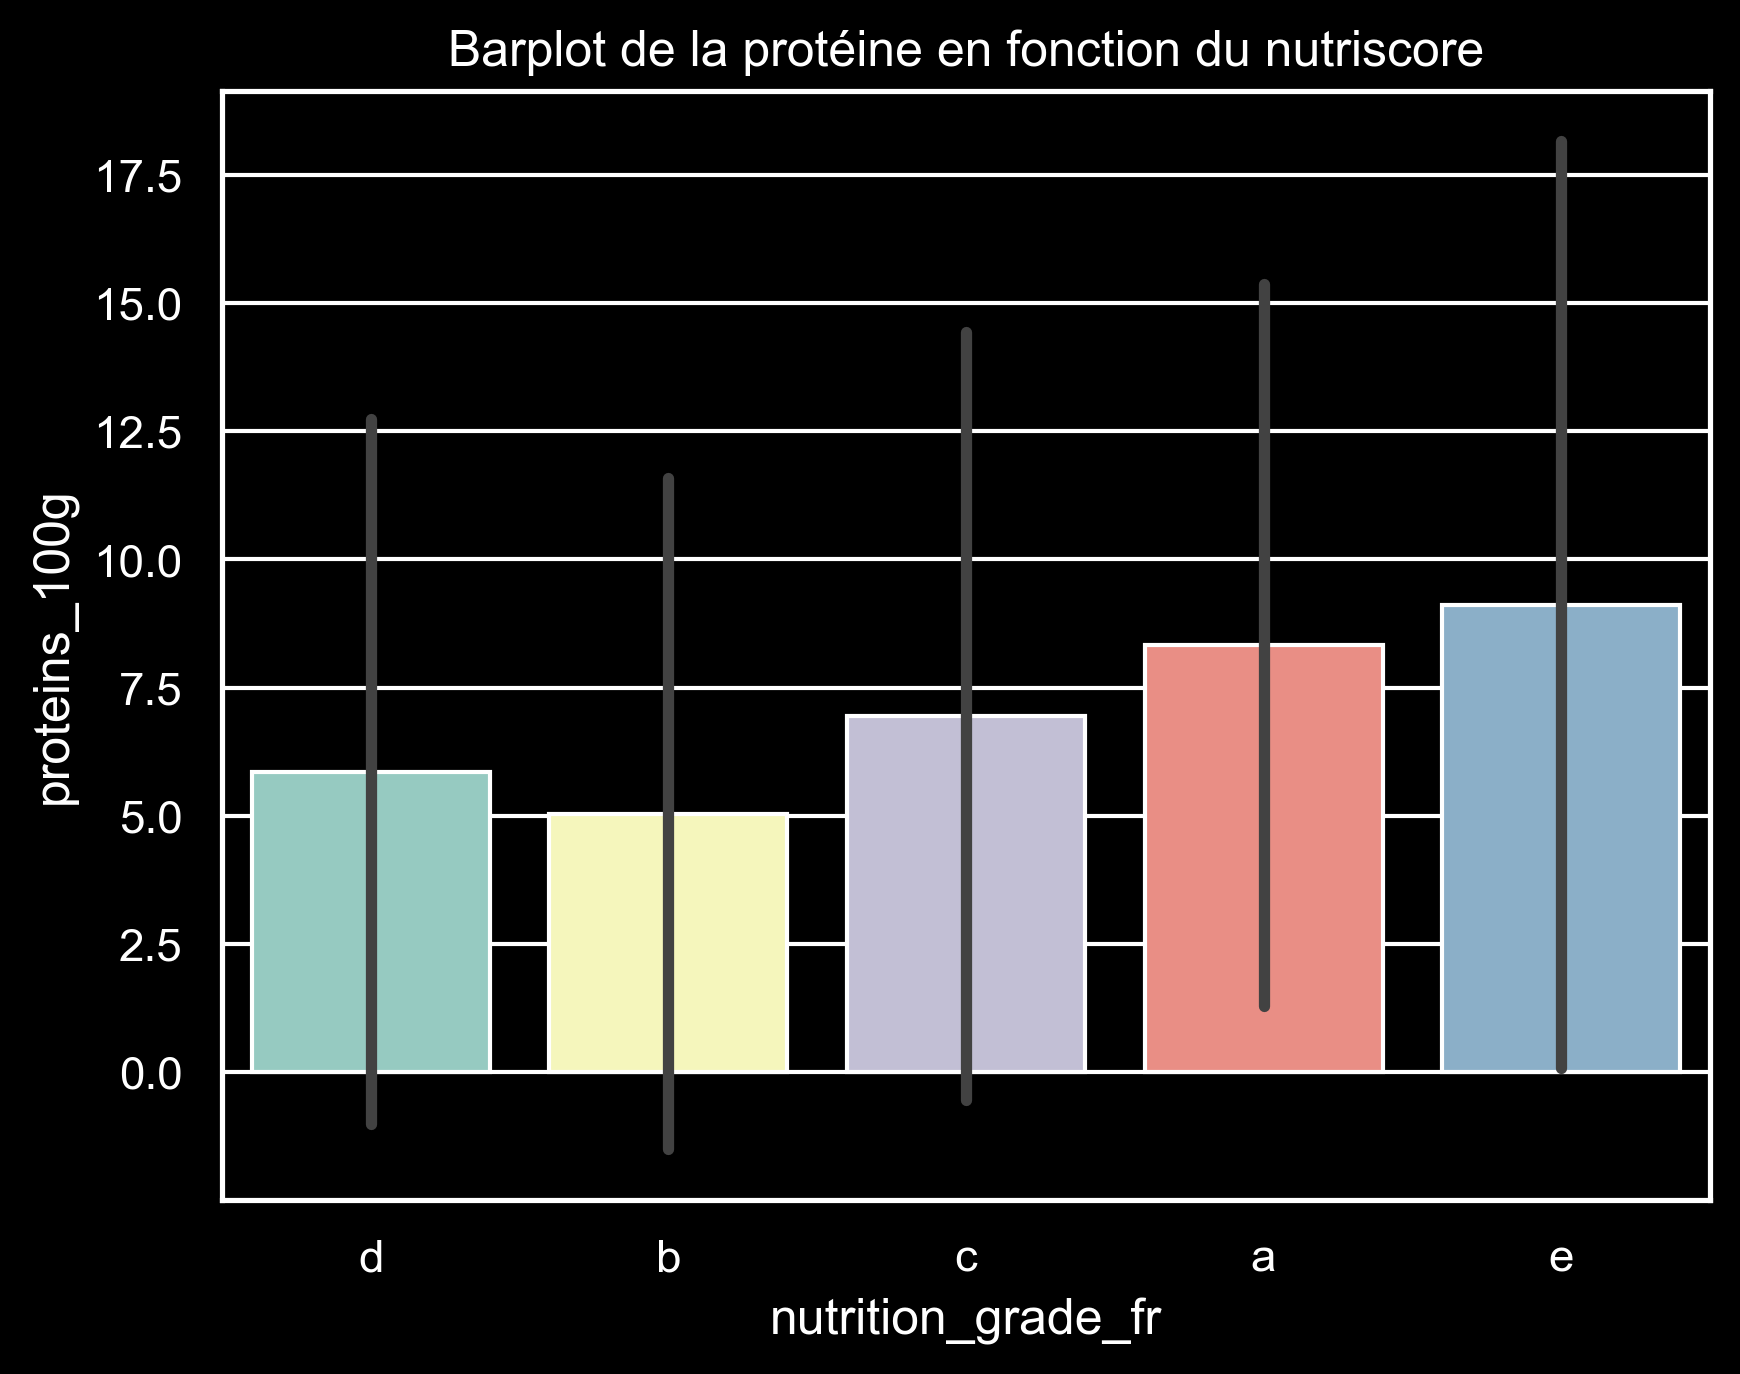

In [97]:
sns.barplot(x='nutrition_grade_fr', y='proteins_100g', data=df, ci='sd')
plt.title('Barplot de la protéine en fonction du nutriscore')
plt.show()

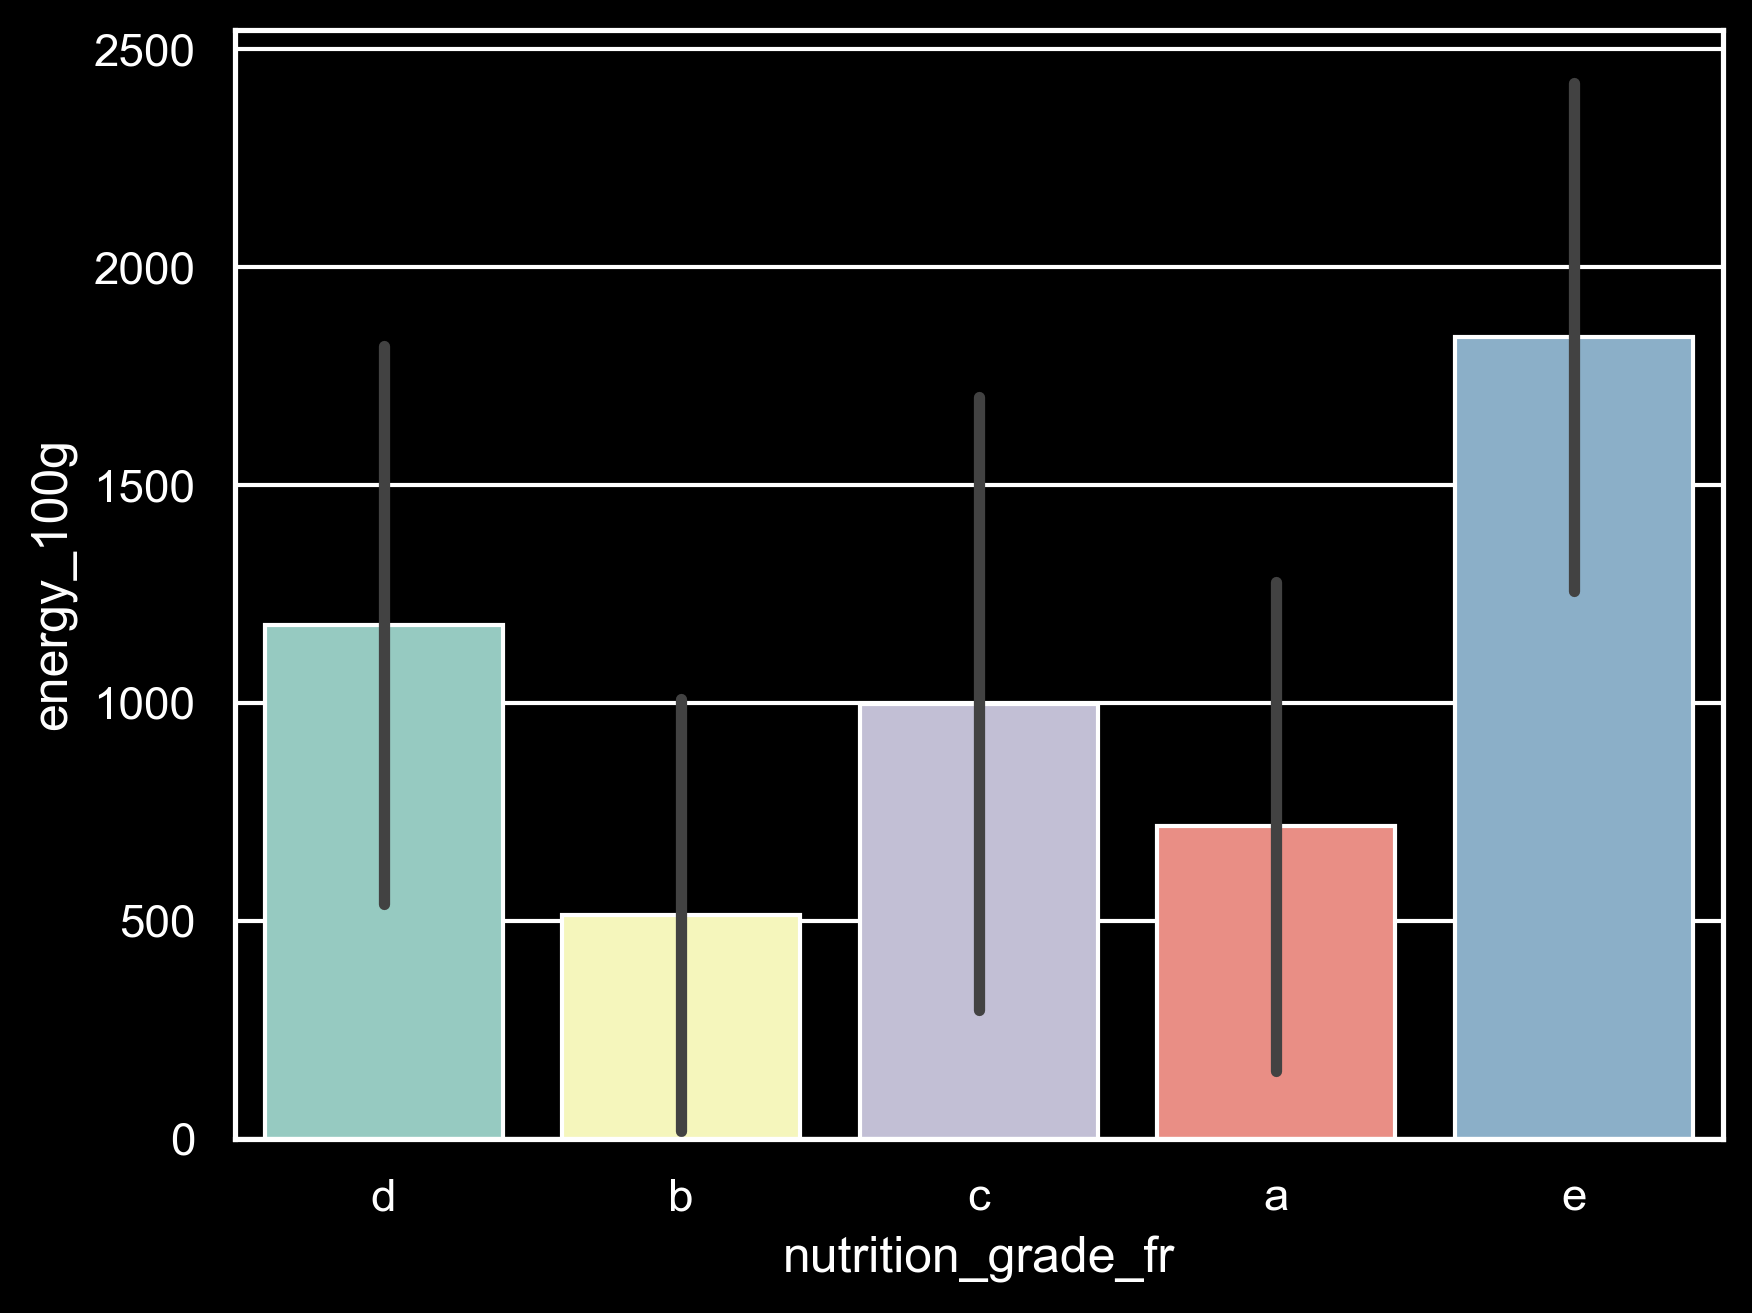

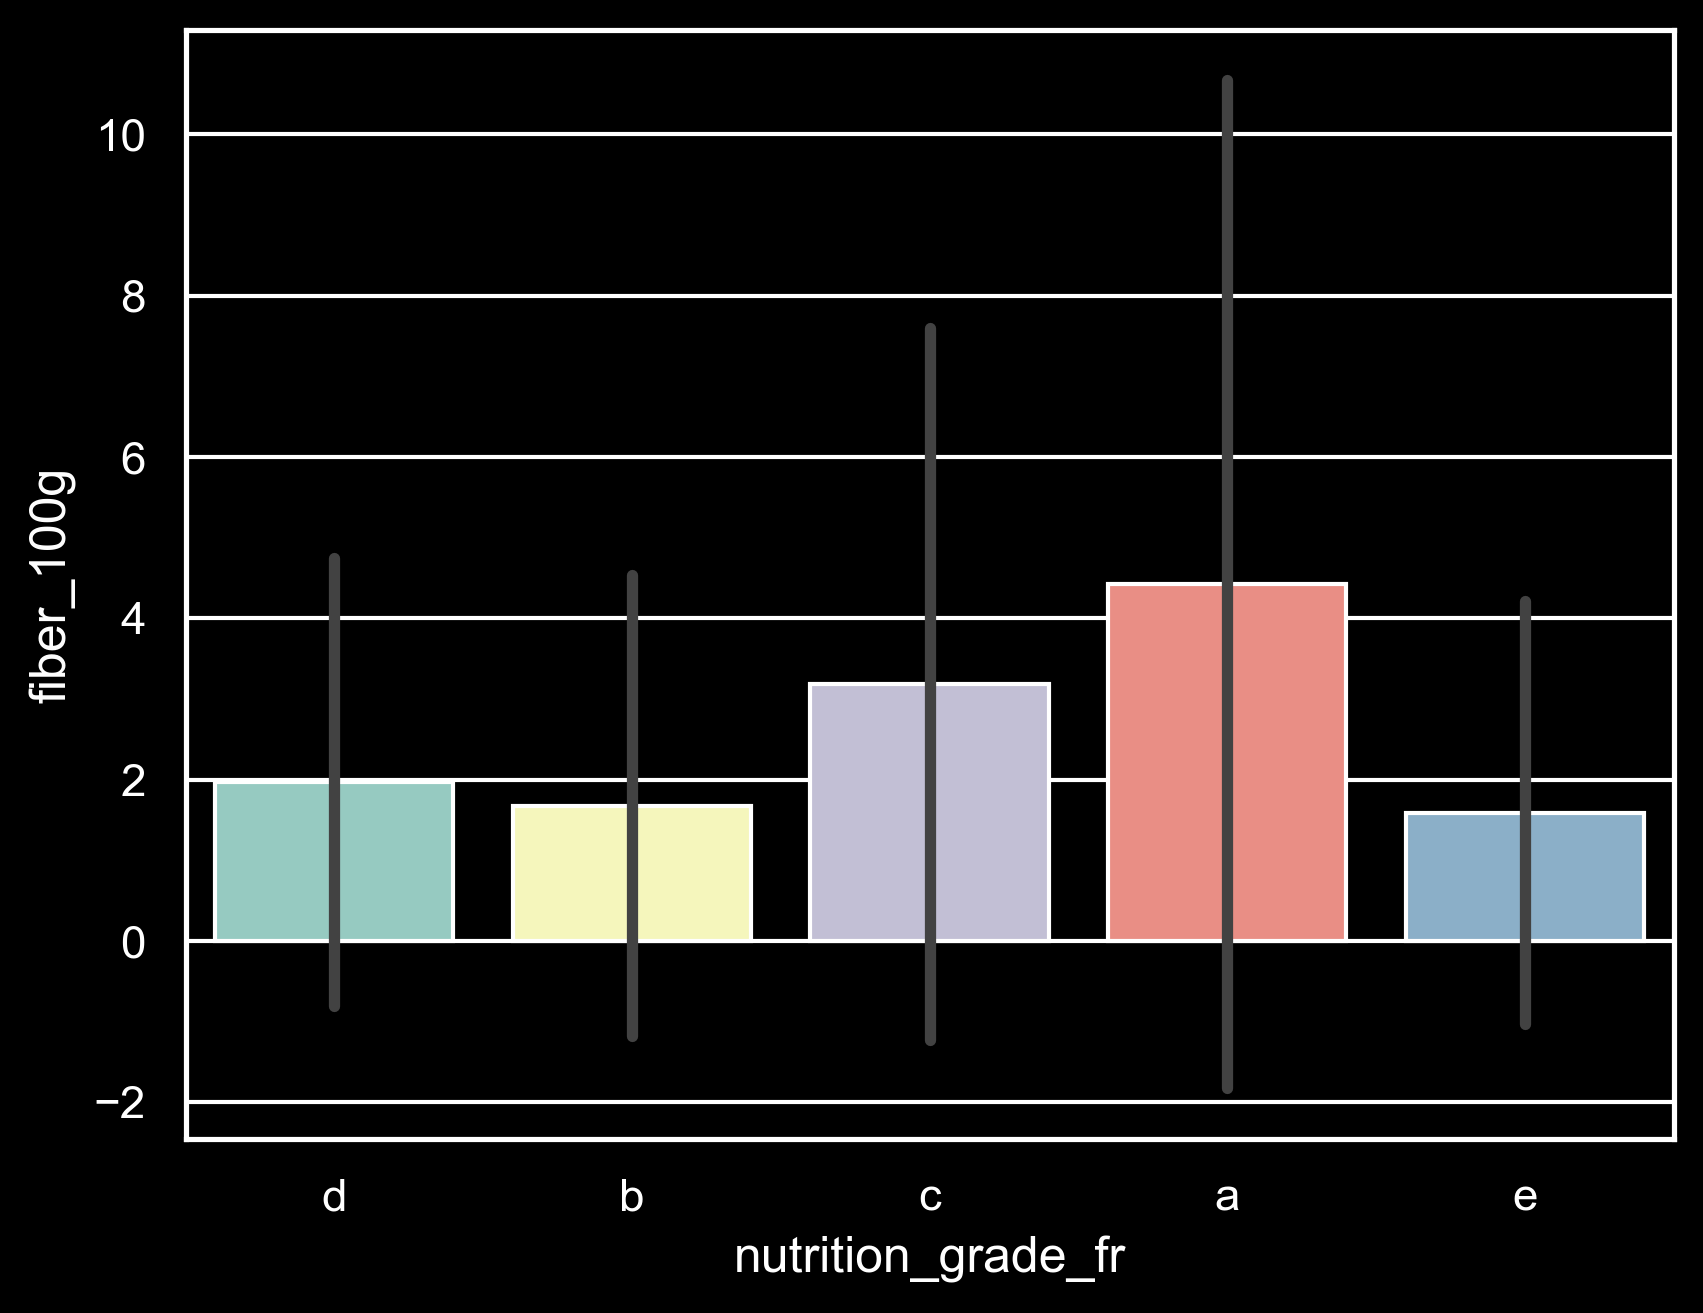

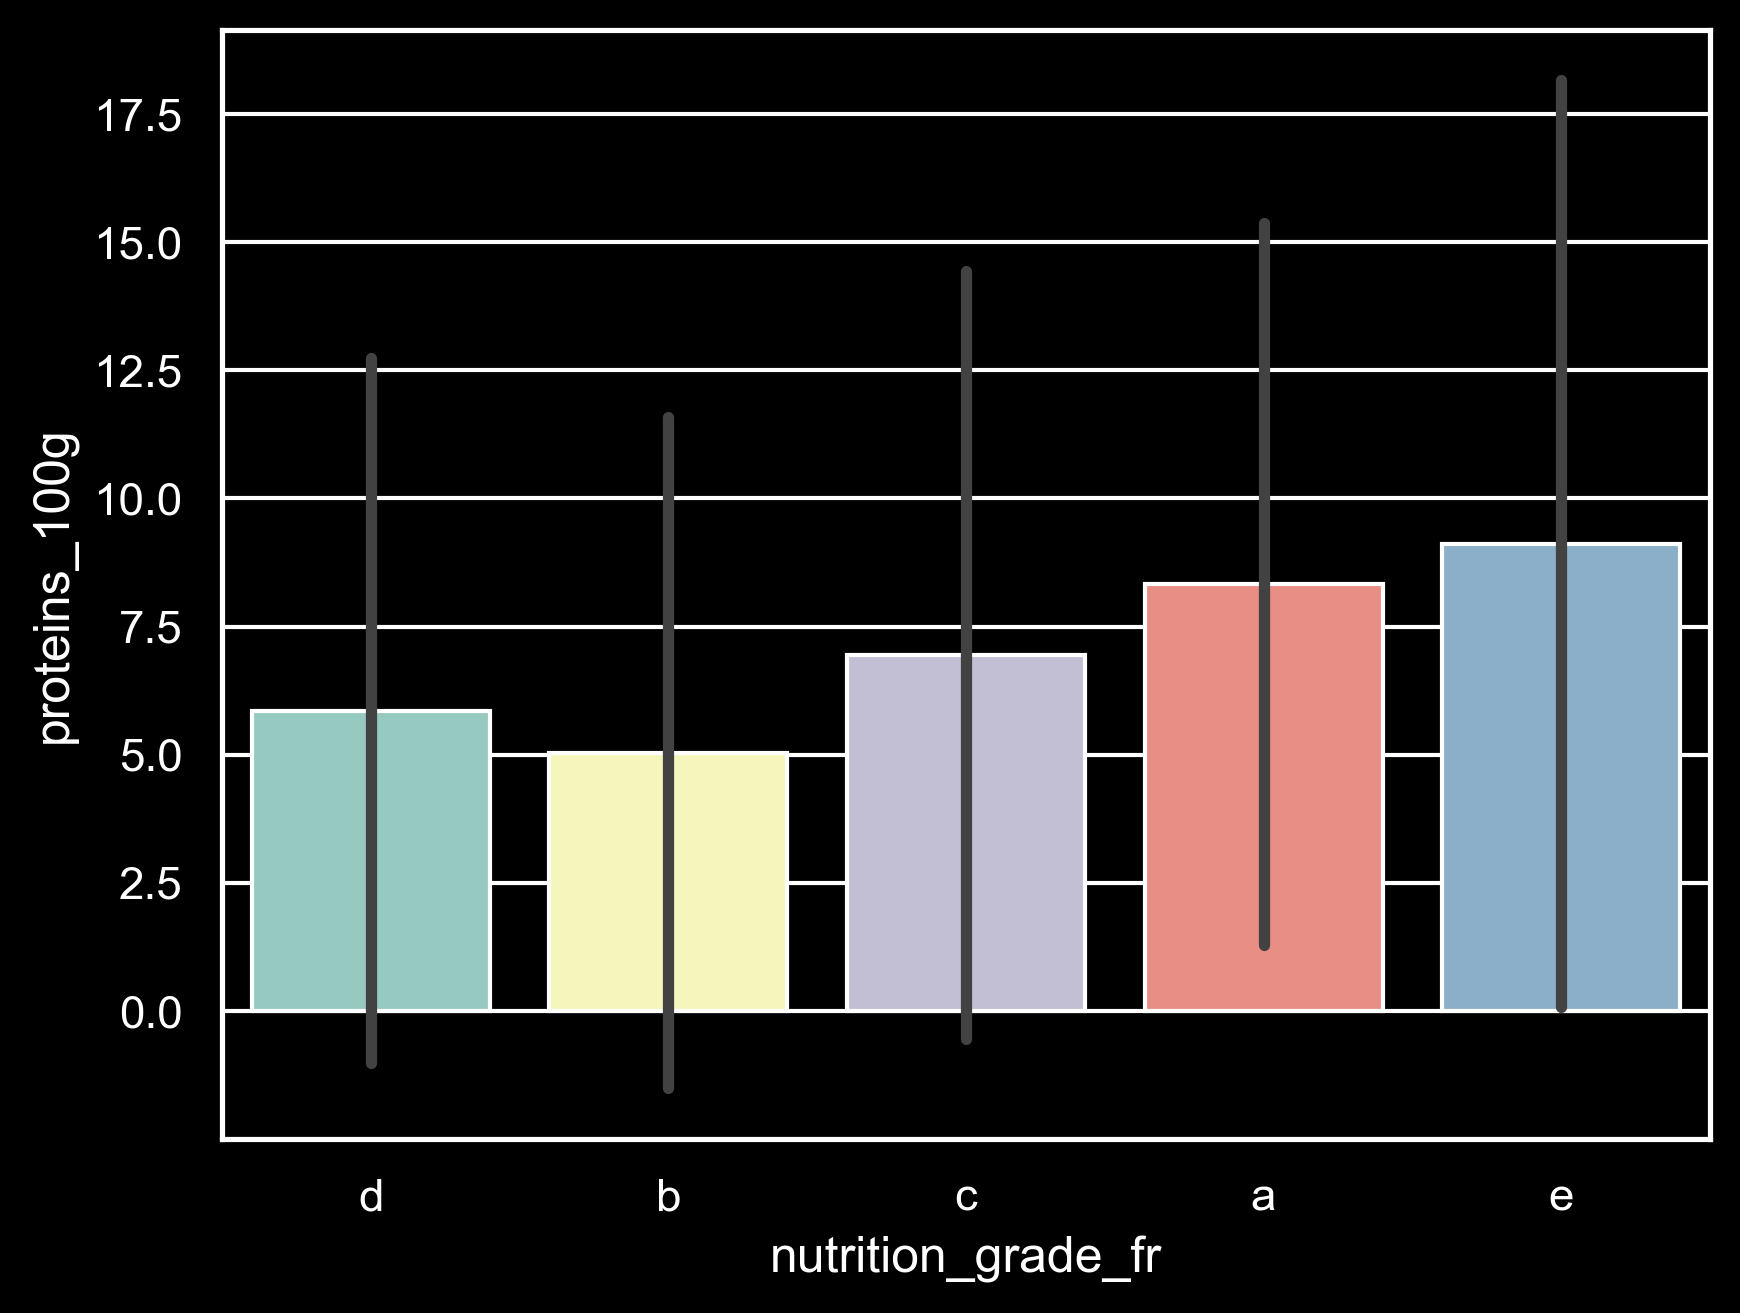

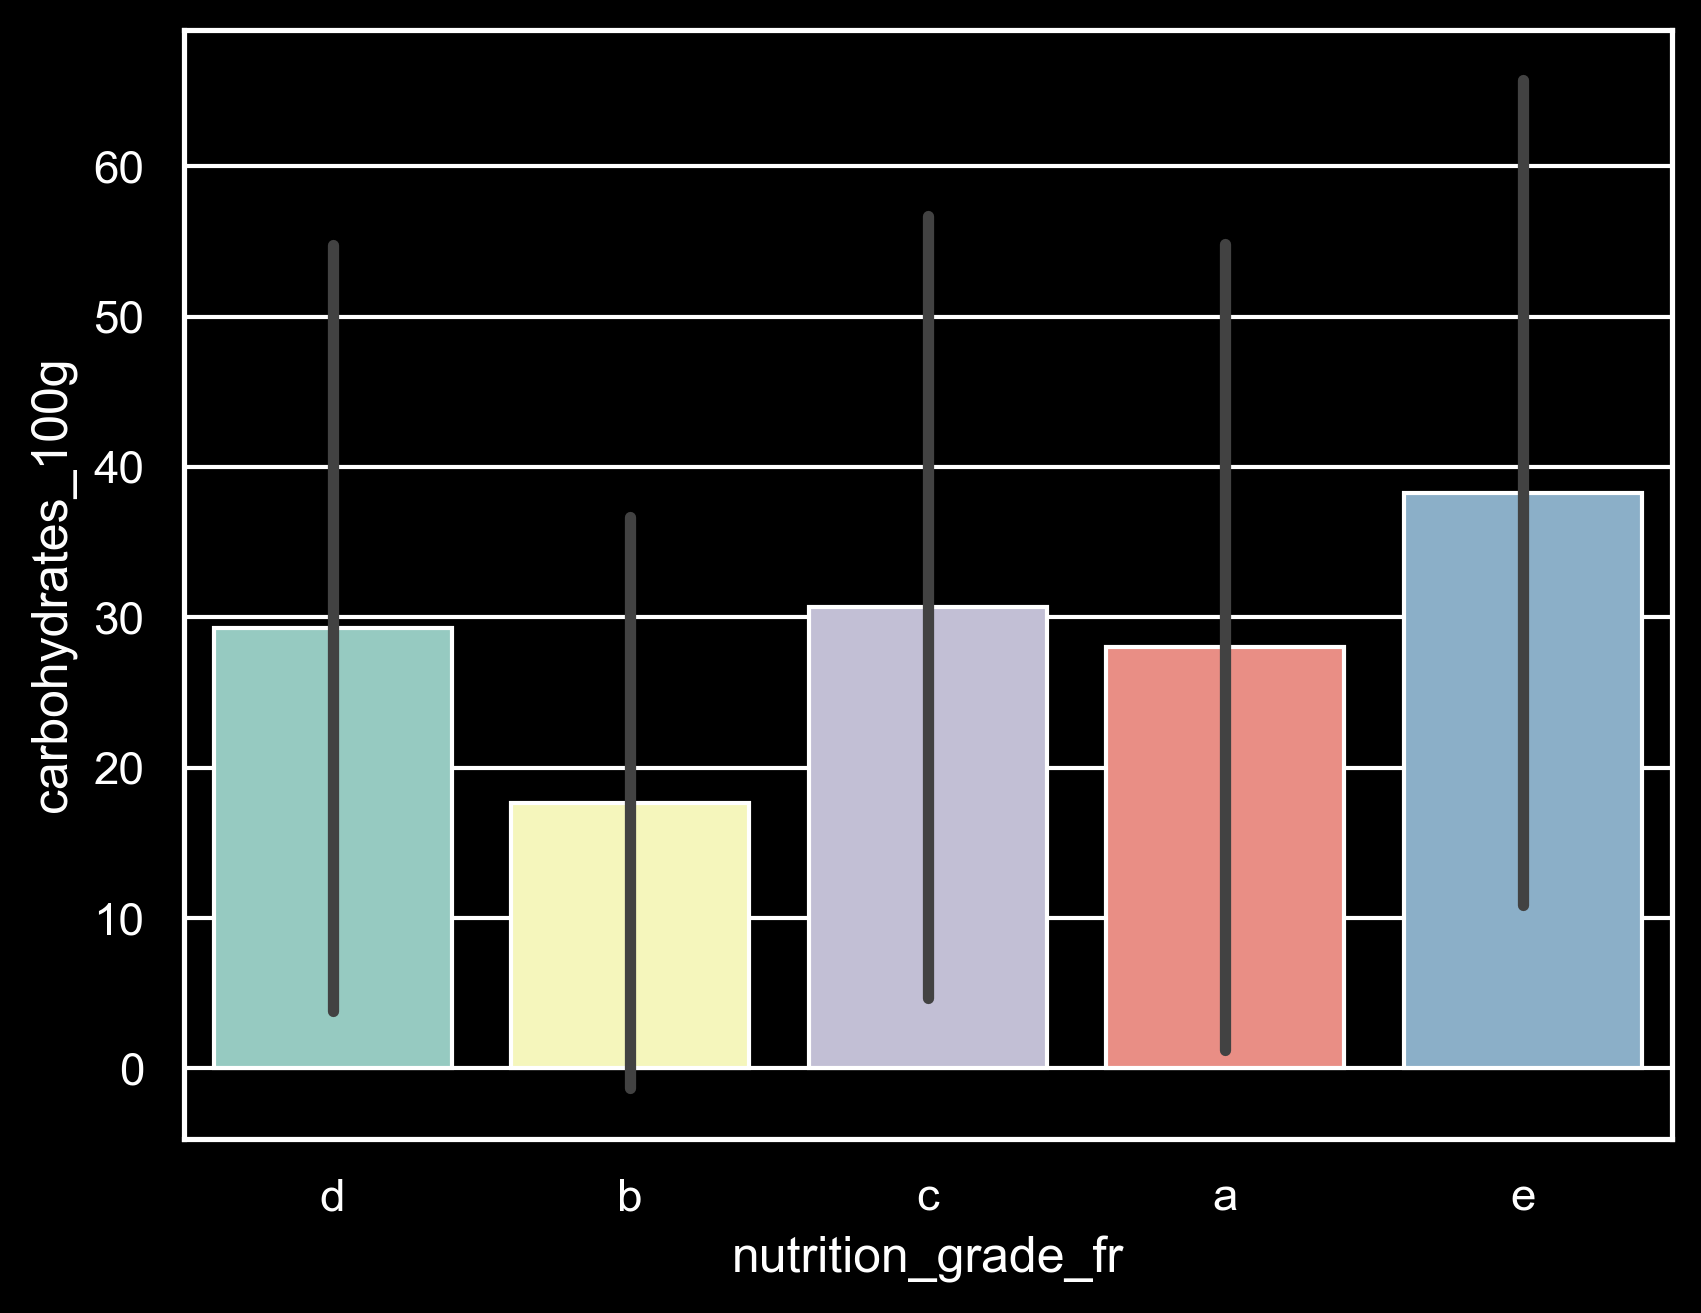

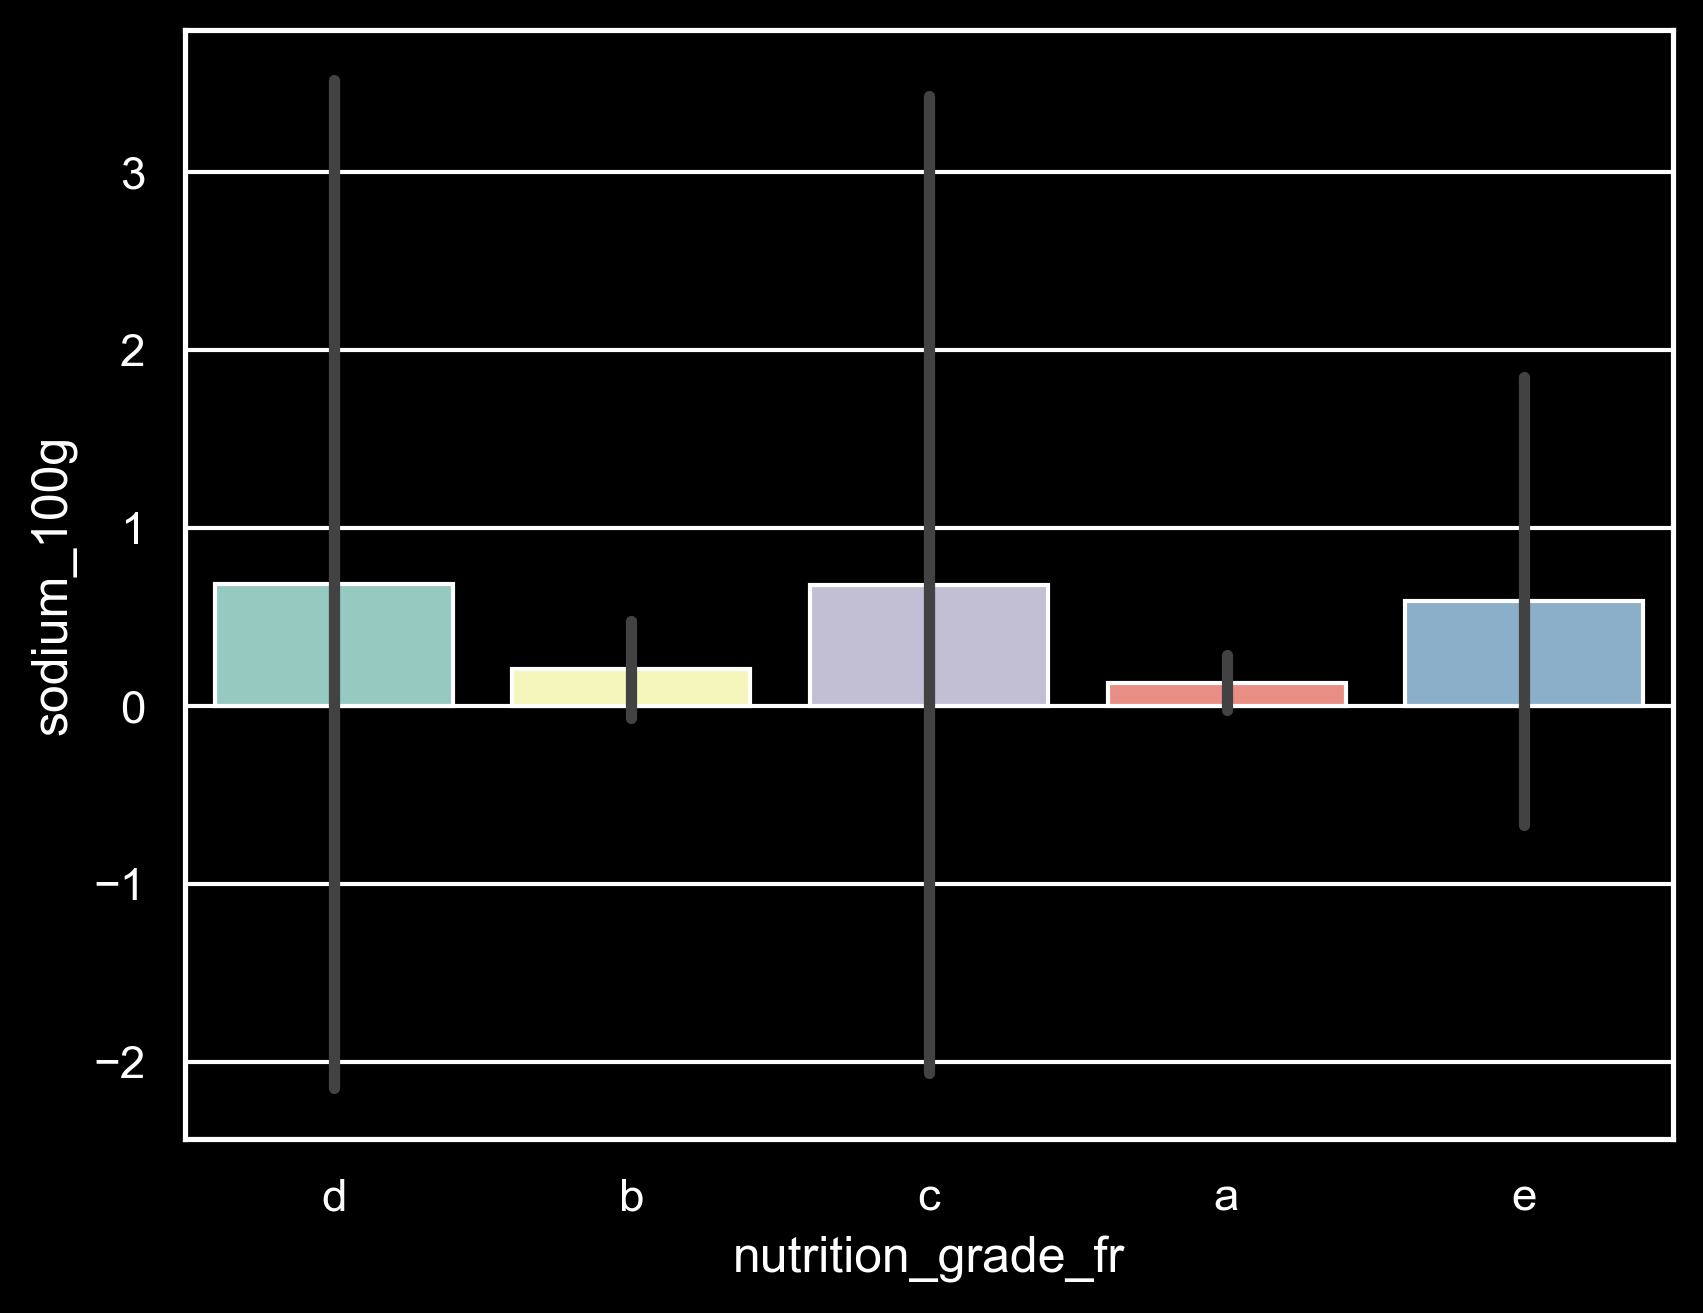

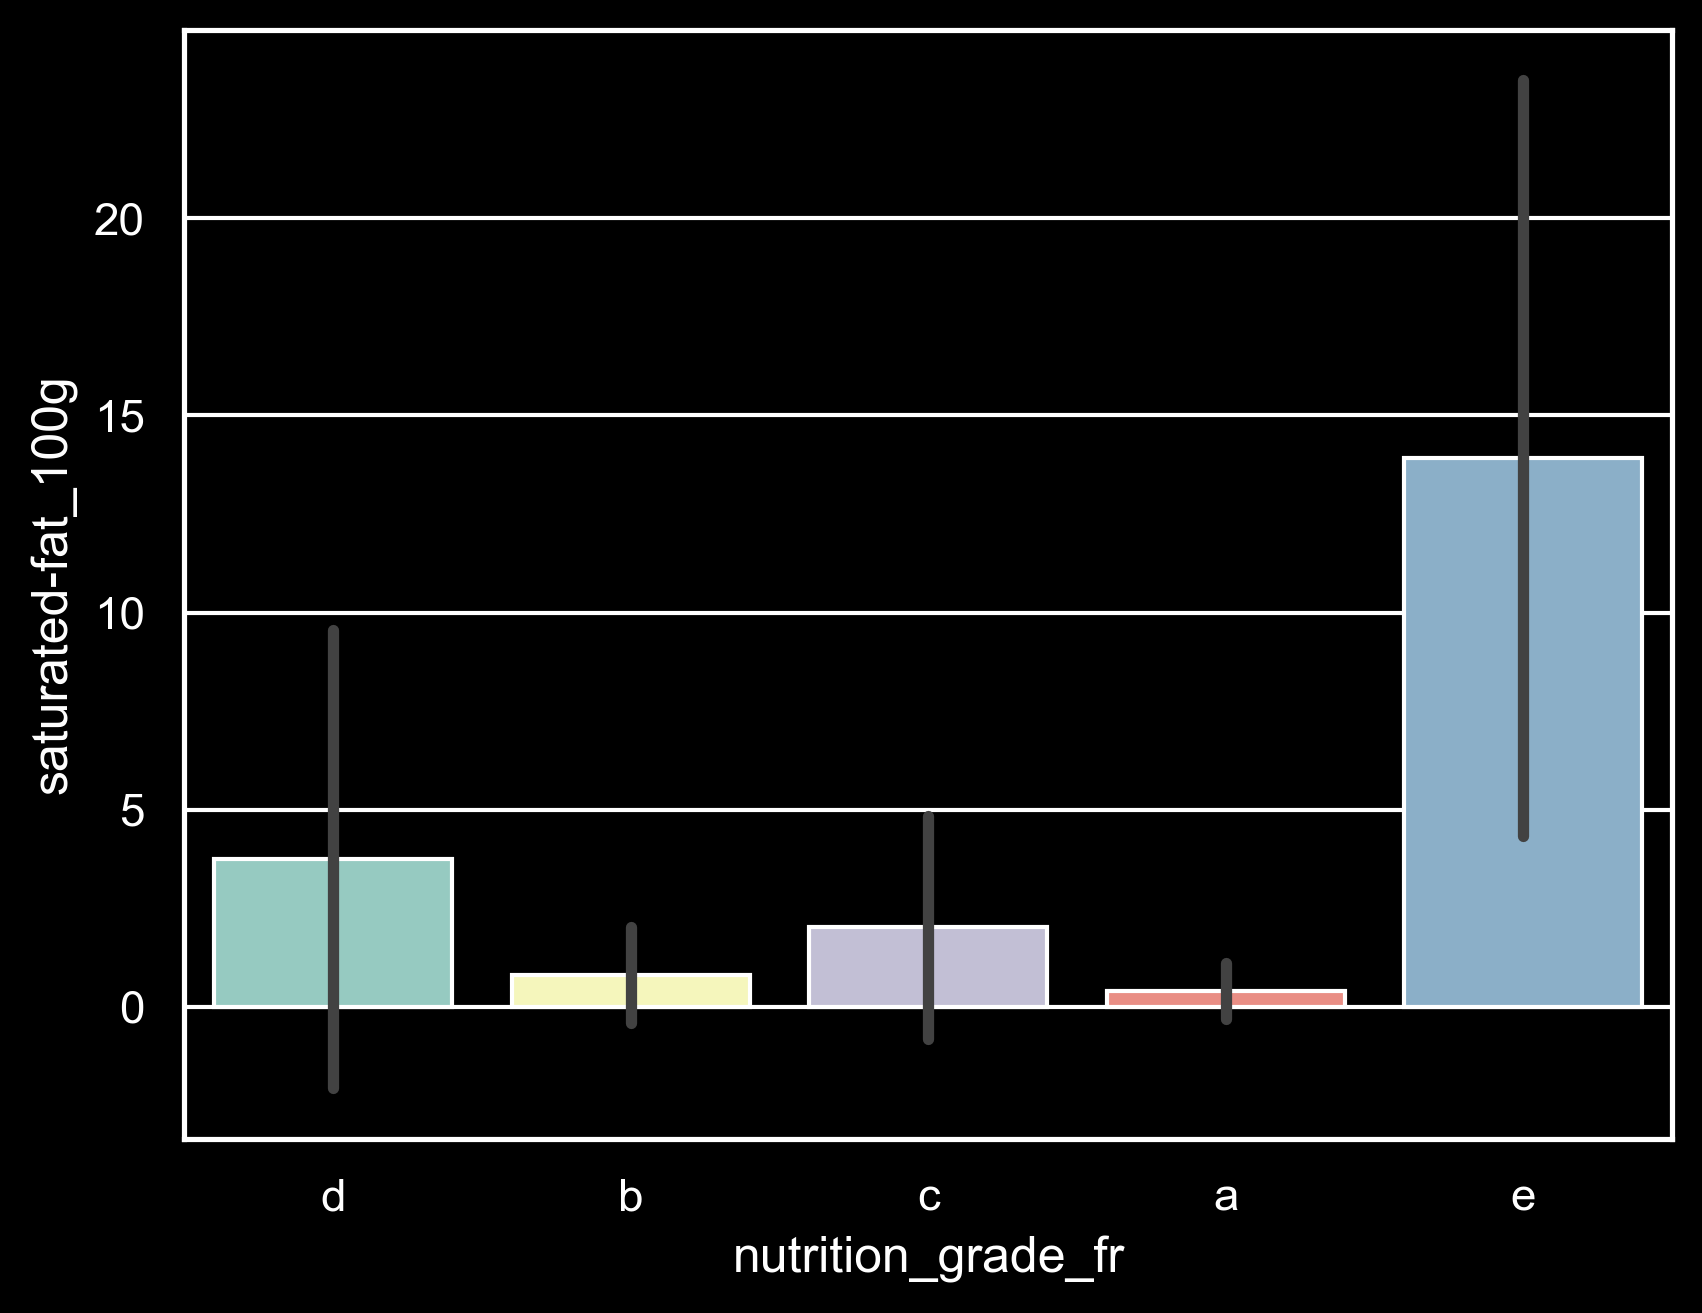

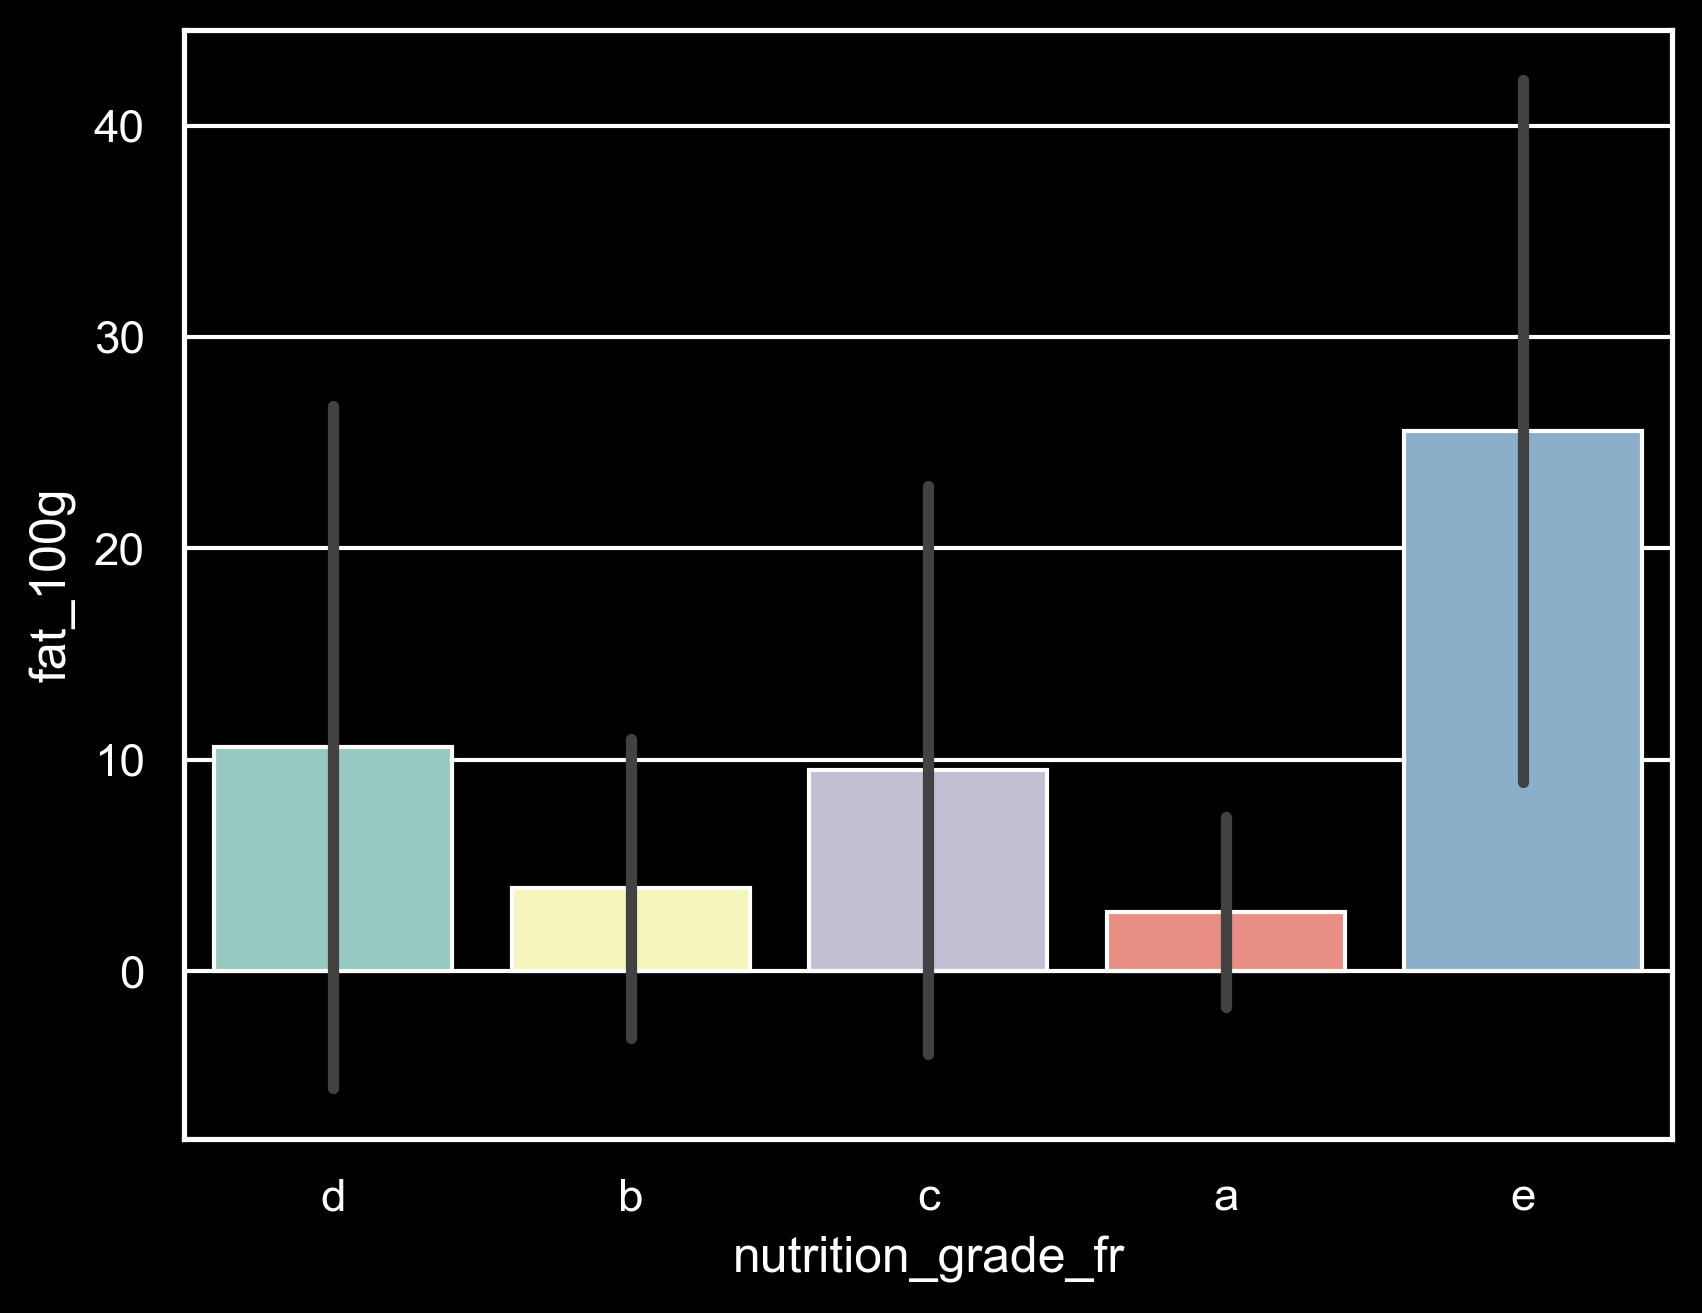

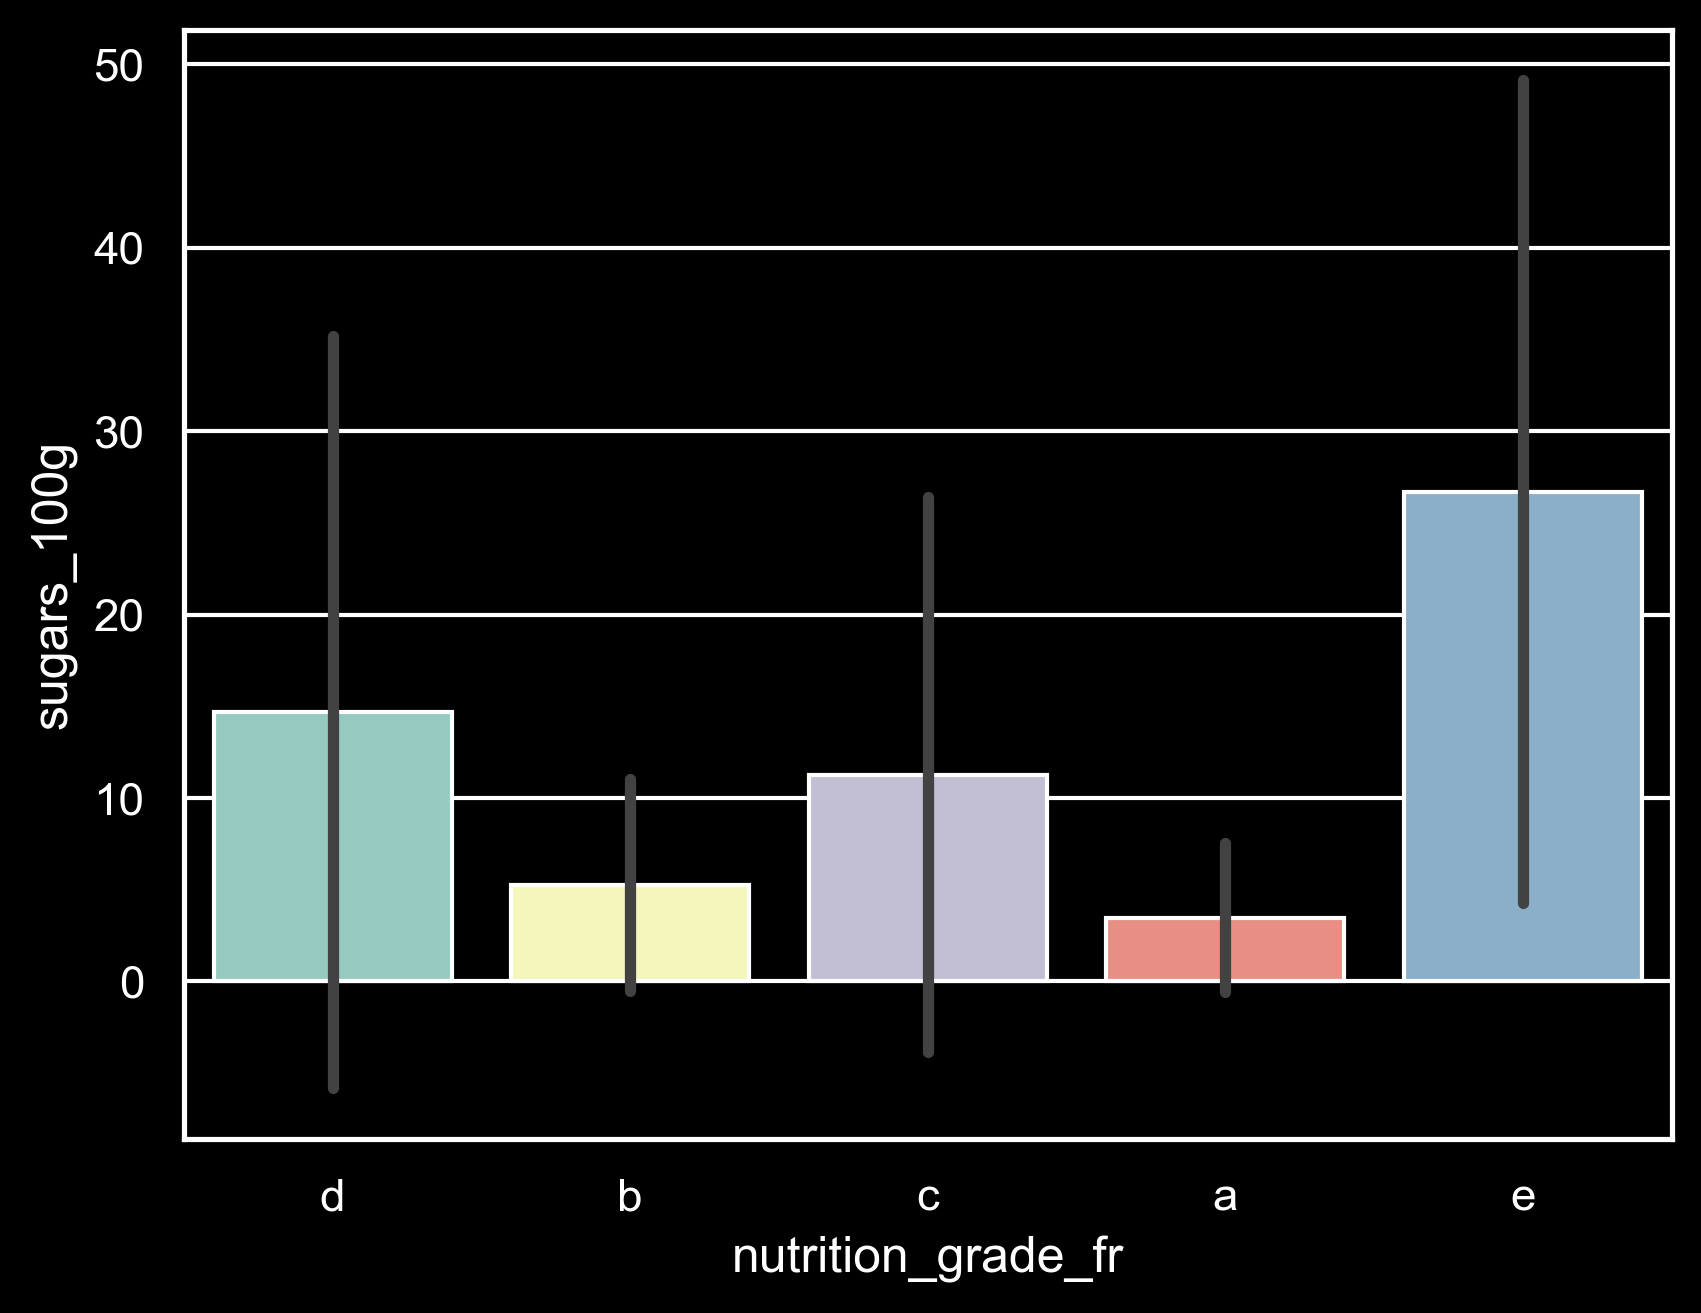

In [98]:
list_columns = ['energy_100g','fiber_100g','proteins_100g','carbohydrates_100g','sodium_100g','saturated-fat_100g','fat_100g','sugars_100g']
  
for columns_name in list_columns:
    sns.barplot(x='nutrition_grade_fr', y=df[columns_name], data=df, ci='sd')
    plt.show()

IV. Analyse Qualitative / Qualitative

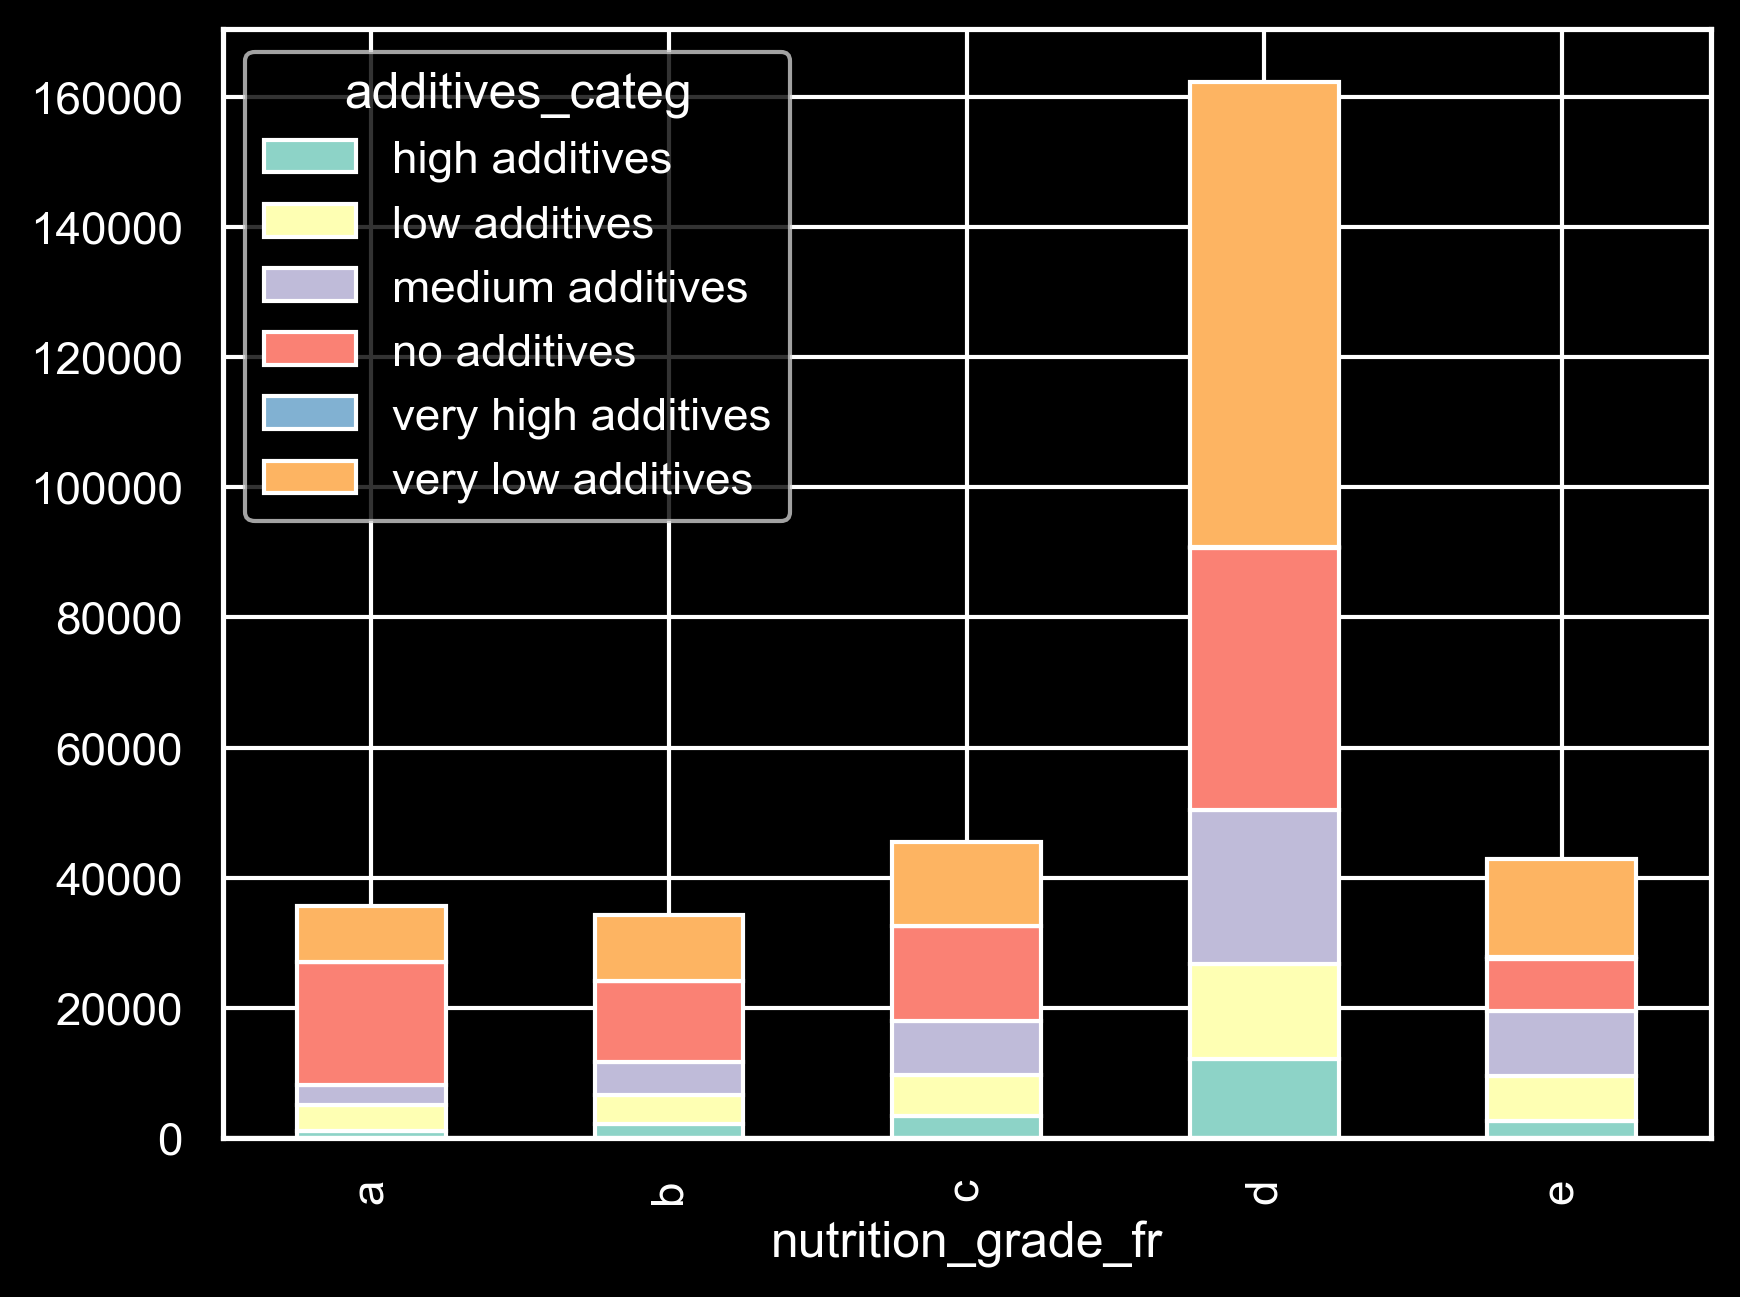

In [99]:
df_quali.groupby(['nutrition_grade_fr', 'additives_categ']).size().unstack().plot(kind='bar', stacked=True)
plt.show()

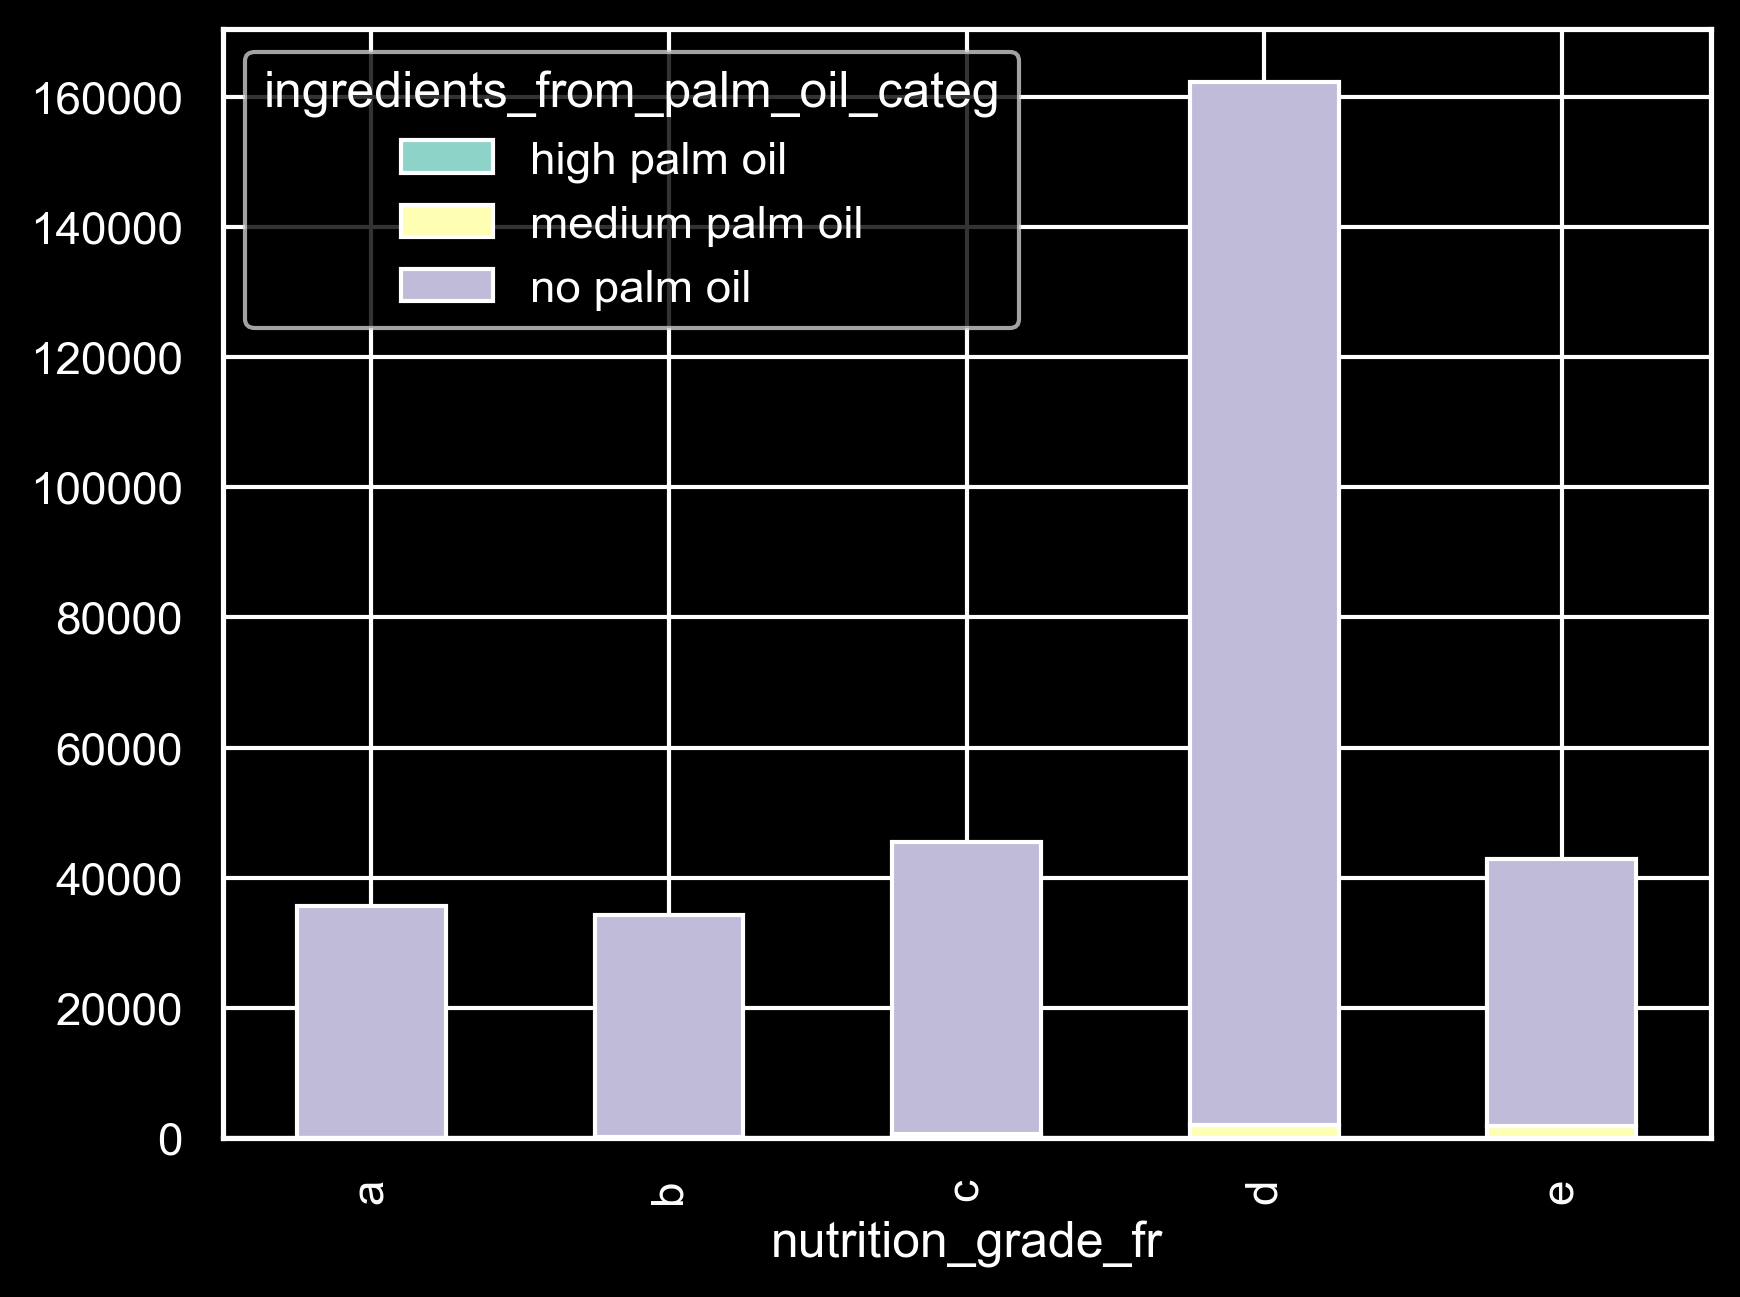

In [100]:
df_quali.groupby(['nutrition_grade_fr', 'ingredients_from_palm_oil_categ']).size().unstack().plot(kind='bar', stacked=True)
plt.show()

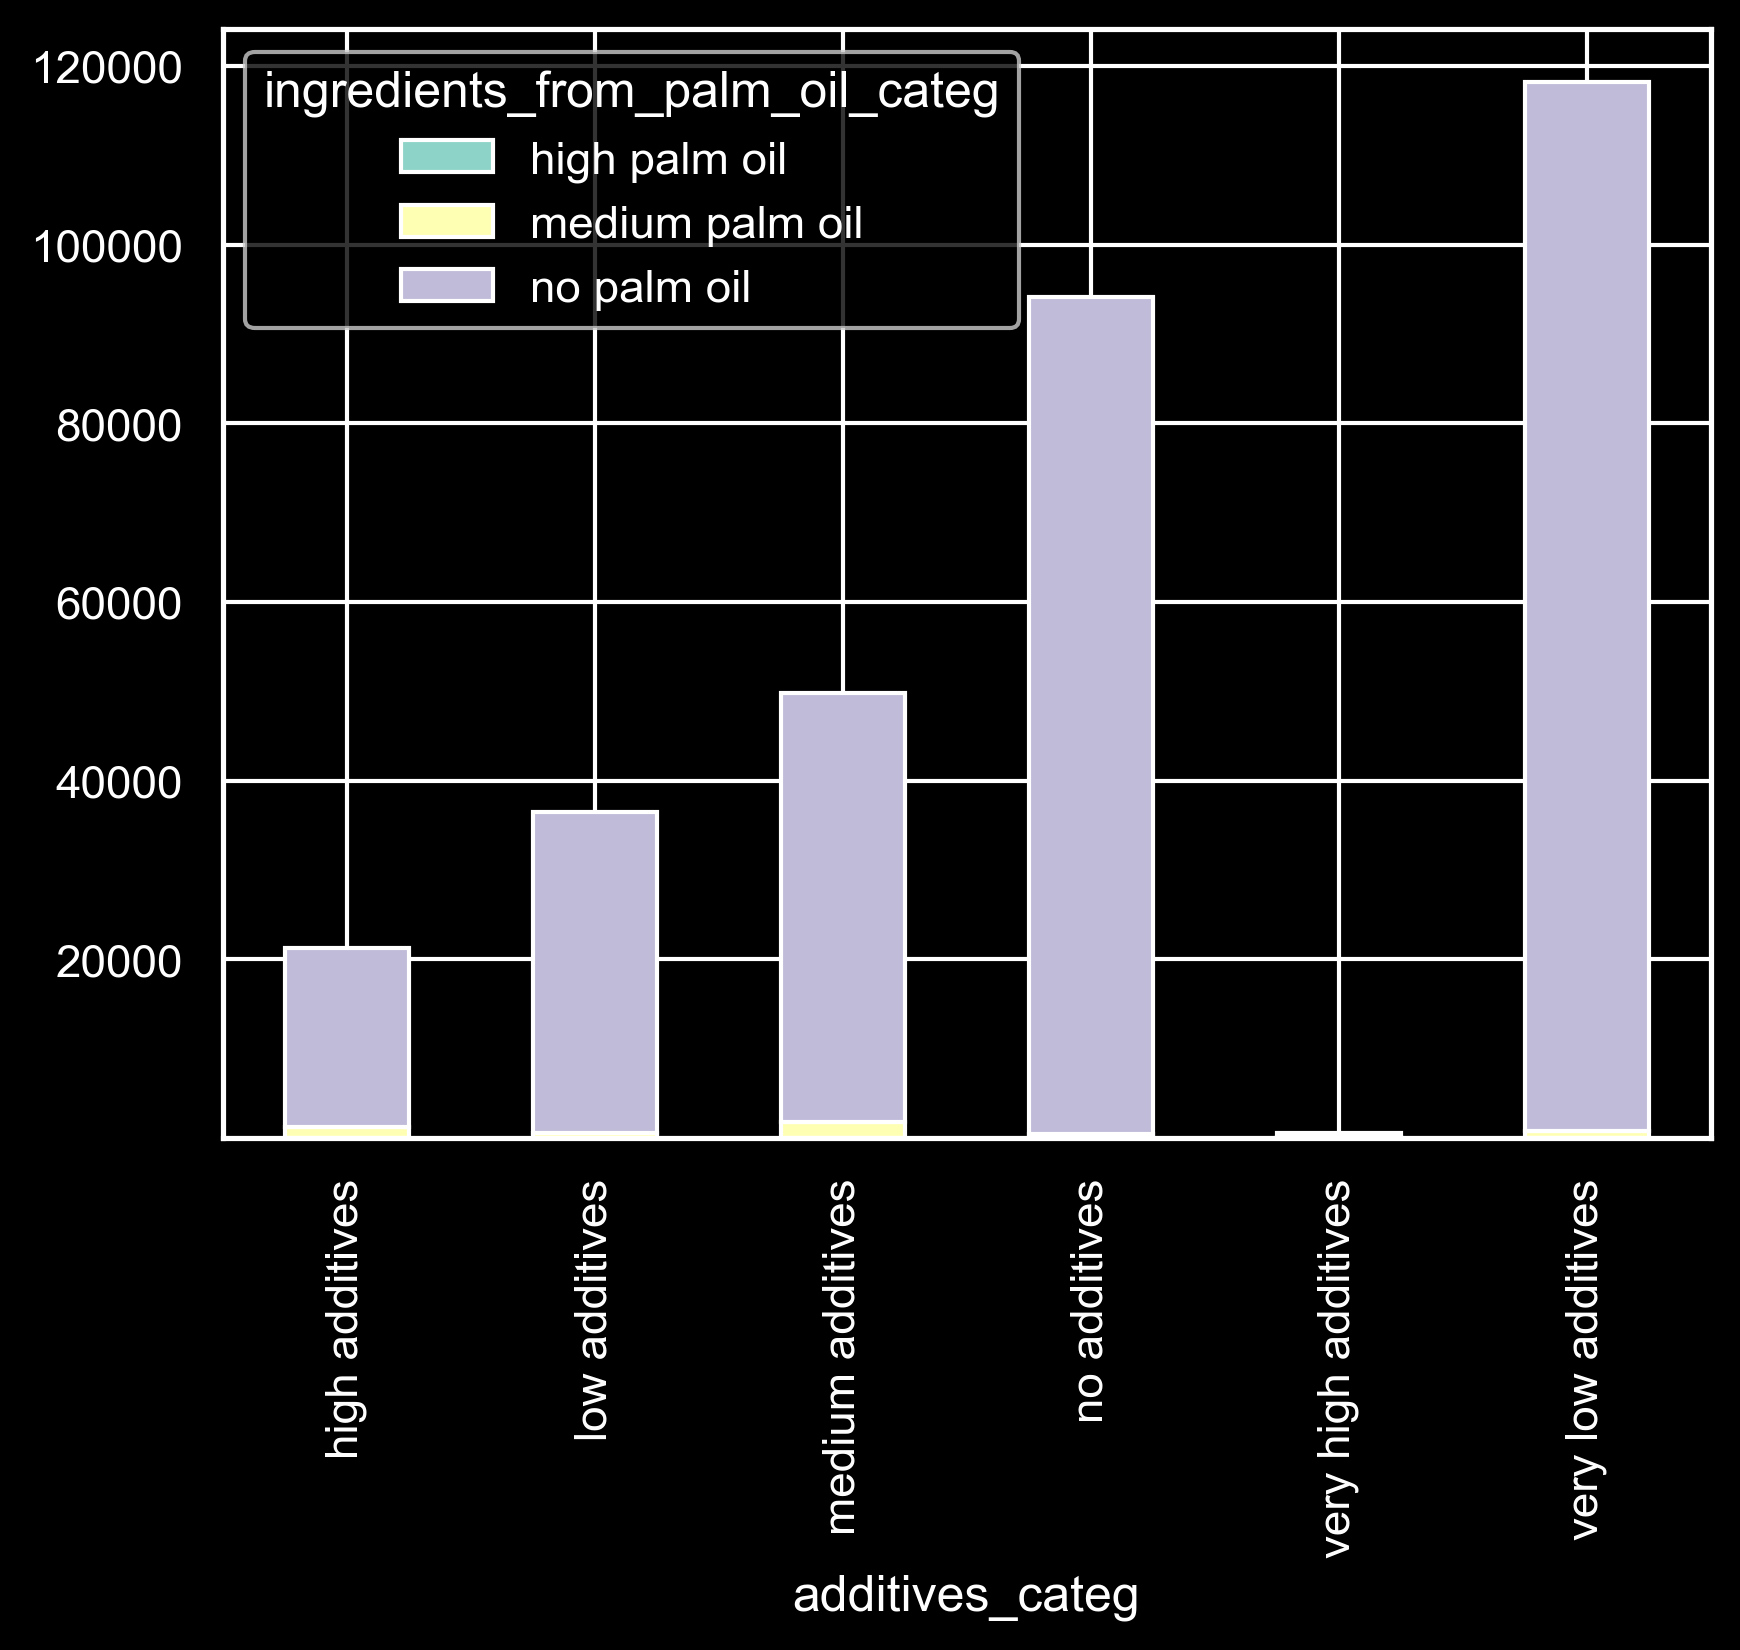

In [101]:
df_quali.groupby(['additives_categ', 'ingredients_from_palm_oil_categ']).size().unstack().plot(kind='bar', stacked=True)
plt.show()

In [ ]:
RAJOUTER LE TEST CHI-2 SUR LANALYSE QUALI QUALI

In [ ]:
Conclusion : reprendre les éléments relevés au propres puis proposer l'idée d'appli

In [ ]:
corriger le nom des variables catégorique avec la convention python snake case

In [71]:
# On commencer par créer un tableau croisé
tableau_croise = pd.crosstab(df_quali['nutrition_grade_fr'], df_quali['additives_categ'])

# Appliquer le test du chi carré
statistique, p_valeur, degres_liberte, attendu = st.chi2_contingency(tableau_croise)

# Interpréter les résultats
print("Statistique du chi carré : ", statistique)
print("P-valeur : ", p_valeur)
print("Degrés de liberté : ", degres_liberte)

Statistique du chi carré :  21664.25905298273
P-valeur :  0.0
Degrés de liberté :  20


La statistique du chi carré est très élevée, ce qui indique que les variables sont fortement dépendantes. La p-valeur est très faible (0.0), ce qui indique qu'on peut rejeter l'hypothèse nulle d'indépendance entre les variables. Les degrés de liberté sont égaux à 20 et les fréquences attendues sont également fournies dans le tableau "attendu". Cela suggère que les deux variables qualitatives sont fortement corrélées et que l'une peut être utilisée pour prédire l'autre.

In [61]:
# On commencer par créer un tableau croisé
tableau_croise = pd.crosstab(df_quali['nutrition_grade_fr'], df_quali['ingredients_from_palm_oil_categ'])

# Appliquer le test du chi carré
statistique, p_valeur, degres_liberte, attendu = st.chi2_contingency(tableau_croise)

# Interpréter les résultats
print("Statistique du chi carré : ", statistique)
print("P-valeur : ", p_valeur)
print("Degrés de liberté : ", degres_liberte)

Statistique du chi carré :  2997.2693362963632
P-valeur :  0.0
Degrés de liberté :  8


Cette sortie indique que la statistique du chi carré est de 2997.27, avec une p-valeur de 0.0 et 8 degrés de liberté. Comme pour les sorties précédentes, une p-valeur très faible suggère que les variables sont fortement corrélées et qu'on peut rejeter l'hypothèse nulle d'indépendance entre les variables.

Les degrés de liberté sont de 8, ce qui signifie que nous avons 8 valeurs indépendantes dans notre analyse. Cela implique que les variables qualitatives étudiées ont un nombre limité de catégories et que les données sont moins flexibles. Il est important de prendre en compte les degrés de liberté dans l'interprétation des résultats, car ils affectent la distribution de la statistique de test.

En résumé, ces résultats indiquent que les deux variables qualitatives sont fortement corrélées, et que l'une peut être utilisée pour prédire l'autre. La statistique du chi carré, la p-valeur et les degrés de liberté sont tous importants pour interpréter les résultats d'une analyse du chi carré.

In [60]:
# On commencer par créer un tableau croisé
tableau_croise = pd.crosstab(df_quali['ingredients_from_palm_oil_categ'], df_quali['additives_categ'])

# Appliquer le test du chi carré
statistique, p_valeur, degres_liberte, attendu = st.chi2_contingency(tableau_croise)

# Interpréter les résultats
print("Statistique du chi carré : ", statistique)
print("P-valeur : ", p_valeur)
print("Degrés de liberté : ", degres_liberte)

Statistique du chi carré :  5384.74919017894
P-valeur :  0.0
Degrés de liberté :  10


Cette sortie est similaire à la sortie précédente, mais avec des valeurs différentes pour la statistique du chi carré, la p-valeur et les degrés de liberté. Dans ce cas, la statistique du chi carré est de 5384.75, ce qui est moins élevé que la statistique du chi carré dans la sortie précédente. Cependant, la p-valeur est encore très faible (0.0), ce qui suggère que les variables sont fortement corrélées et qu'on peut rejeter l'hypothèse nulle d'indépendance entre les variables. Les degrés de liberté sont de 10, ce qui signifie que nous avons 10 valeurs indépendantes dans notre analyse.

En résumé, les résultats indiquent que les deux variables qualitatives sont fortement corrélées, et que l'une peut être utilisée pour prédire l'autre. Les degrés de liberté, la p-valeur et la statistique du chi carré sont des indicateurs importants pour interpréter les résultats d'une analyse du chi carré.

# <a name="C3">III. ACP</a>

In [41]:
# Normaliser les données
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_quanti)

# Créer un objet PCA avec le nombre de composantes souhaité
pca = PCA(n_components=2)

# Appliquer la PCA au dataframe normalisé
pca.fit(df_scaled)
df_pca = pca.transform(df_scaled)

# Afficher le résultat sous forme d'un nouveau dataframe
df_pca = pd.DataFrame(data=df_pca, columns=['PC1', 'PC2'])
print(df_pca)

             PC1       PC2
0      -0.630834  0.164432
1       3.430529  0.116783
2       1.603338 -0.479338
3       3.064839  1.898023
4       0.559706 -1.128487
...          ...       ...
320536 -0.630834  0.164432
320537 -2.297908  0.519201
320538 -0.630834  0.164432
320539 -0.630834  0.164432
320540 -0.401021  0.439003

[320541 rows x 2 columns]


In [43]:
X = df_quanti.values
names = df_quanti.index
features = df_quanti.columns

# Normaliser les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

n_components = 8

# Créer un objet PCA avec le nombre de composantes souhaité
pca = PCA(n_components=n_components)

pca.fit(X_scaled)

PCA(n_components=8)

In [44]:
# retourne le pourcentage de la variance totale des données 
# qui est expliqué par chaque composante principale.
pca.explained_variance_ratio_

scree = (pca.explained_variance_ratio_*100).round(2)

scree

array([32.25, 22.14, 14.56, 12.34,  8.47,  5.47,  3.64,  1.13])

In [45]:
# on arrondit à la somme cumulée
scree_cum = scree.cumsum().round()
scree_cum

array([ 32.,  54.,  69.,  81.,  90.,  95.,  99., 100.])

In [46]:
x_list = range(1, n_components+1)
list(x_list)

[1, 2, 3, 4, 5, 6, 7, 8]

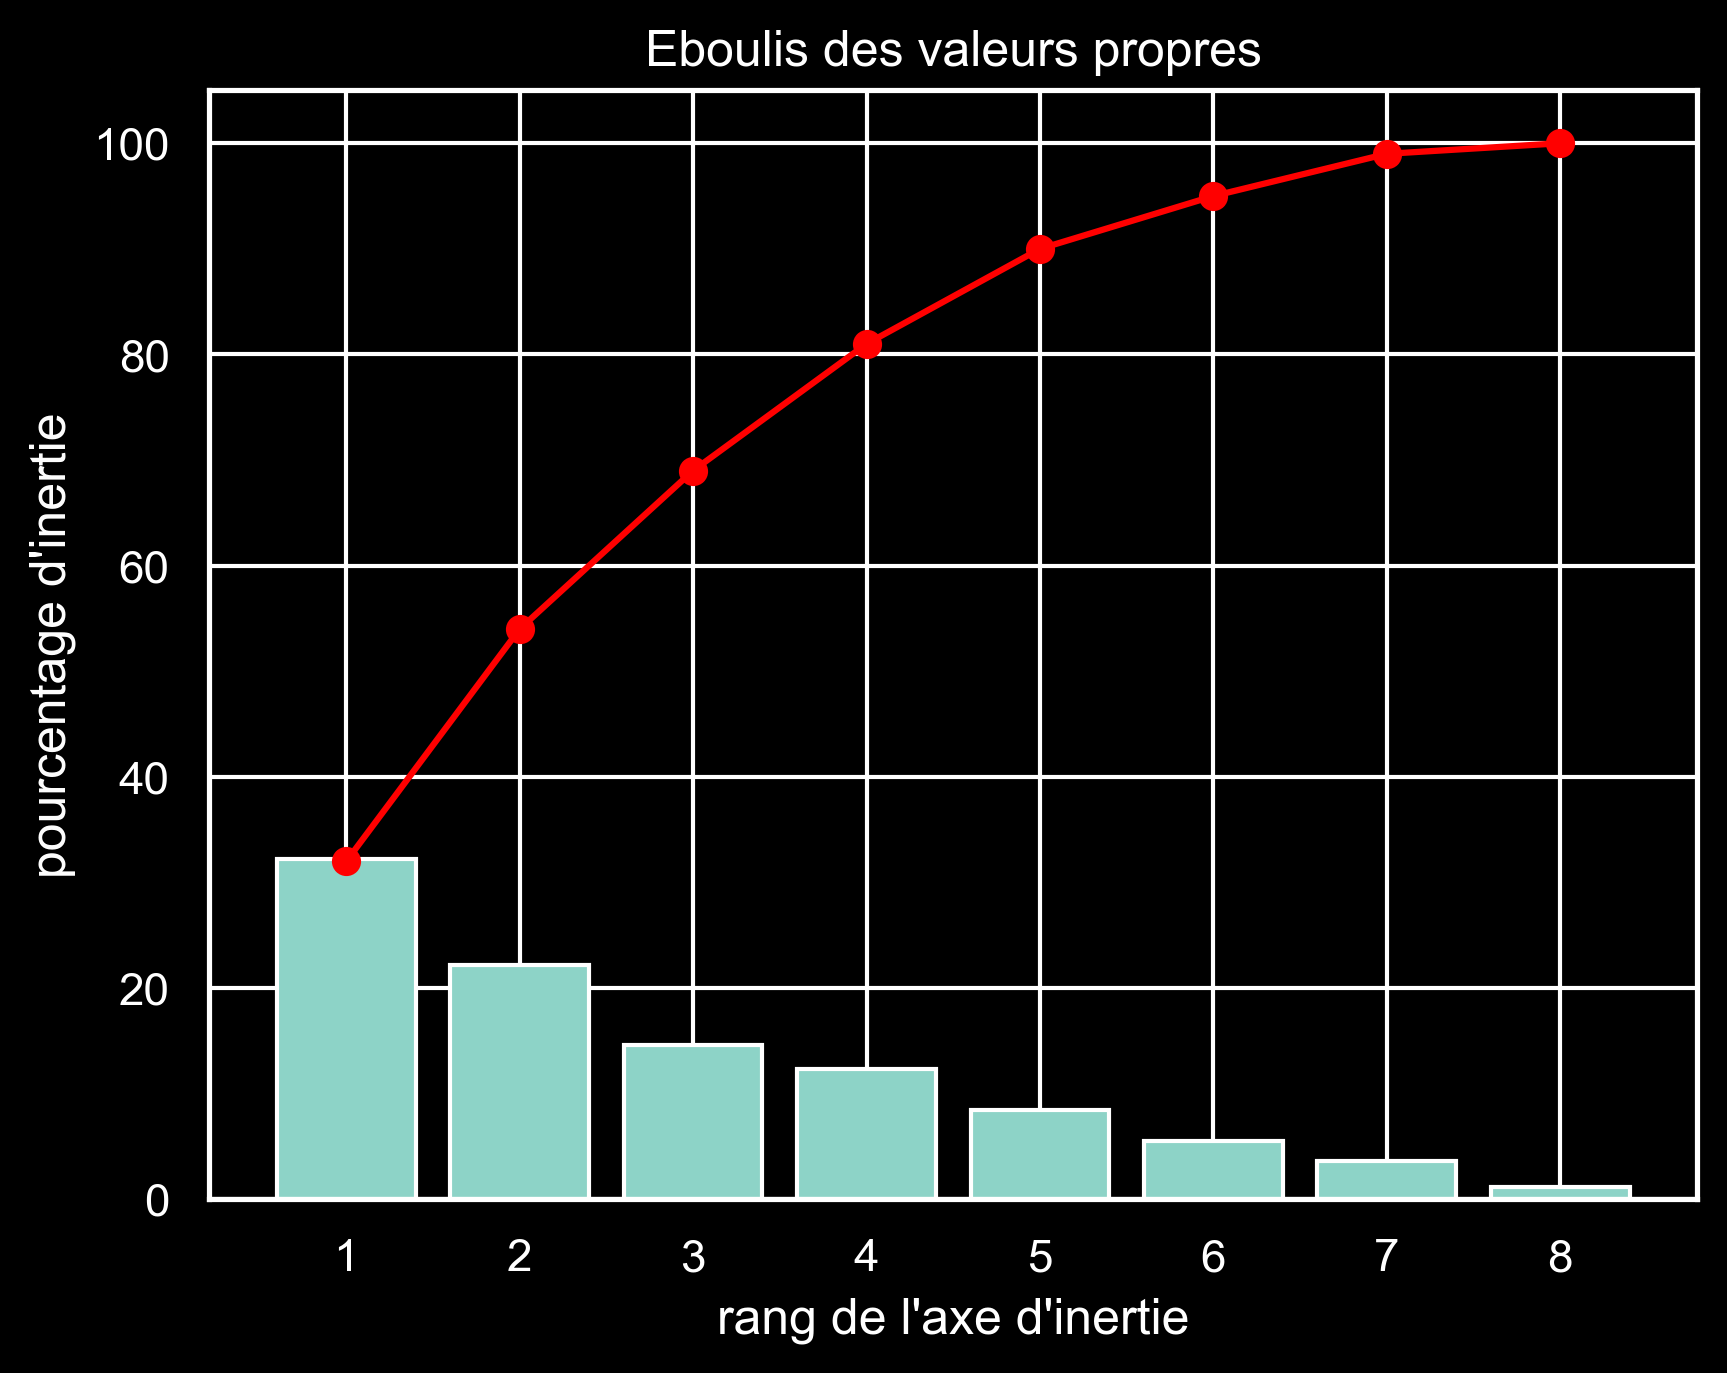

In [102]:
# Ce code permet de créer un scree plot pour visualiser les pourcentages 
# de variance expliquée pour chaque composante principale, ainsi que la 
# variance cumulée expliquée par chaque composante.

plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

In [48]:
pcs = pca.components_
pcs

array([[ 0.58260671,  0.20408152,  0.22165775,  0.26999982, -0.07077774,
         0.44650667,  0.49460027,  0.2188172 ],
       [-0.04220008, -0.04890858,  0.34253414, -0.60264109,  0.084368  ,
         0.23991074,  0.30534206, -0.59783969],
       [-0.00996247,  0.73224053,  0.488017  ,  0.17081748,  0.04535169,
        -0.34399806, -0.2026258 , -0.18691358],
       [ 0.02246289,  0.00128387, -0.04301118,  0.06606828,  0.99210132,
         0.05370263,  0.015783  ,  0.07668556],
       [-0.03955909,  0.58296032, -0.74070745, -0.14991304, -0.01623362,
         0.07660002,  0.22557781, -0.17451205],
       [-0.41357132,  0.2655462 ,  0.1484958 , -0.22994713, -0.03031951,
         0.63894703, -0.32597049,  0.4099853 ],
       [ 0.05596426, -0.09057504, -0.11195106,  0.50359417, -0.01190425,
         0.45540389, -0.40359299, -0.5933821 ],
       [-0.69458374, -0.03492094,  0.10146964,  0.44880229, -0.01504069,
         0.01850441,  0.54845334, -0.05696198]])

In [49]:
pcs = pd.DataFrame(pcs)
pcs

0         1         2         3         4         5         6  \
0  0.582607  0.204082  0.221658  0.270000 -0.070778  0.446507  0.494600   
1 -0.042200 -0.048909  0.342534 -0.602641  0.084368  0.239911  0.305342   
2 -0.009962  0.732241  0.488017  0.170817  0.045352 -0.343998 -0.202626   
3  0.022463  0.001284 -0.043011  0.066068  0.992101  0.053703  0.015783   
4 -0.039559  0.582960 -0.740707 -0.149913 -0.016234  0.076600  0.225578   
5 -0.413571  0.265546  0.148496 -0.229947 -0.030320  0.638947 -0.325970   
6  0.055964 -0.090575 -0.111951  0.503594 -0.011904  0.455404 -0.403593   
7 -0.694584 -0.034921  0.101470  0.448802 -0.015041  0.018504  0.548453   

          7  
0  0.218817  
1 -0.597840  
2 -0.186914  
3  0.076686  
4 -0.174512  
5  0.409985  
6 -0.593382  
7 -0.056962

In [50]:
pcs.columns = features
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)

energy_100g  fiber_100g  proteins_100g  carbohydrates_100g  sodium_100g  \
F1         0.58        0.20           0.22                0.27        -0.07   
F2        -0.04       -0.05           0.34               -0.60         0.08   
F3        -0.01        0.73           0.49                0.17         0.05   
F4         0.02        0.00          -0.04                0.07         0.99   
F5        -0.04        0.58          -0.74               -0.15        -0.02   
F6        -0.41        0.27           0.15               -0.23        -0.03   
F7         0.06       -0.09          -0.11                0.50        -0.01   
F8        -0.69       -0.03           0.10                0.45        -0.02   

    saturated-fat_100g  fat_100g  sugars_100g  
F1                0.45      0.49         0.22  
F2                0.24      0.31        -0.60  
F3               -0.34     -0.20        -0.19  
F4                0.05      0.02         0.08  
F5                0.08      0.23        -0.17  
F6                0.64     -0.33         0.41  
F7                0.46     -0.40        -0.59  
F8                0.02      0.55        -0.06

<AxesSubplot:>

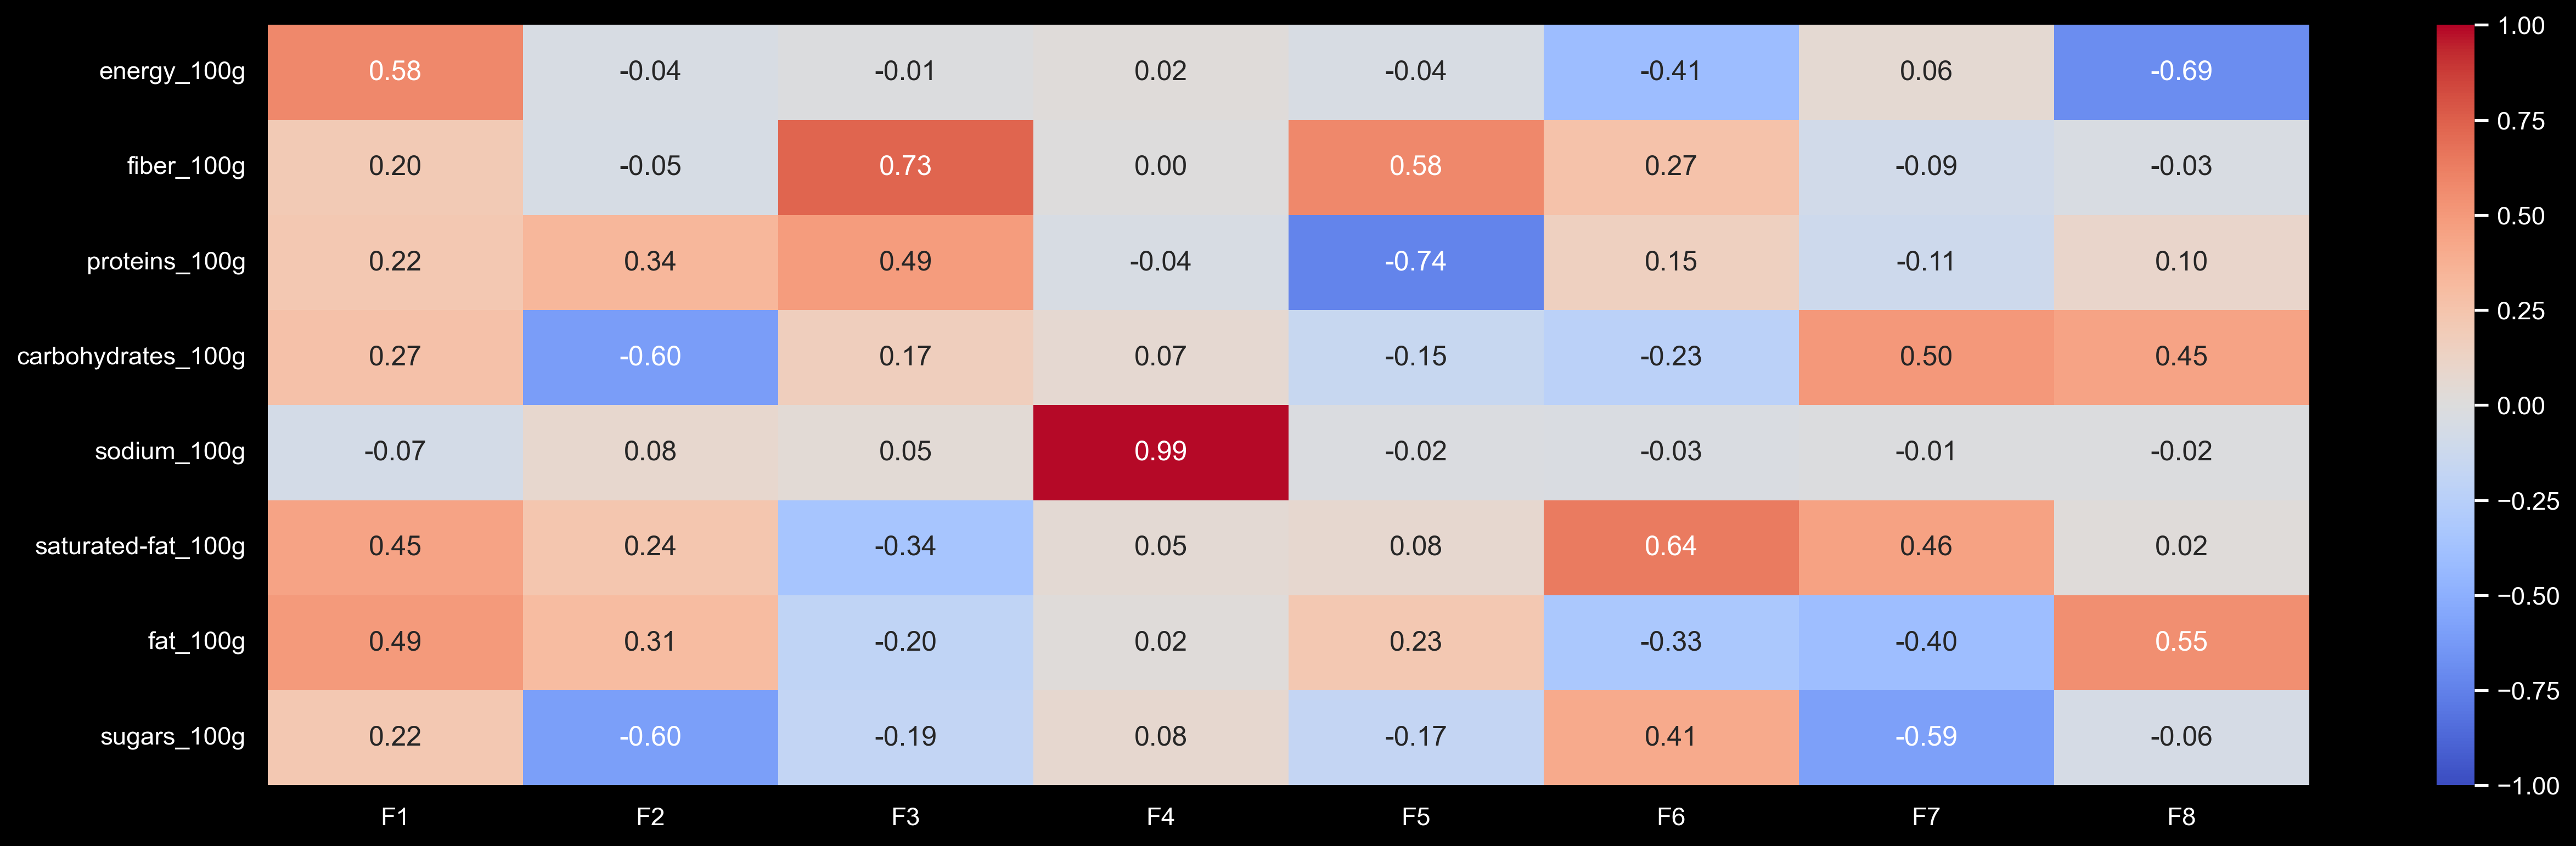

In [103]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")

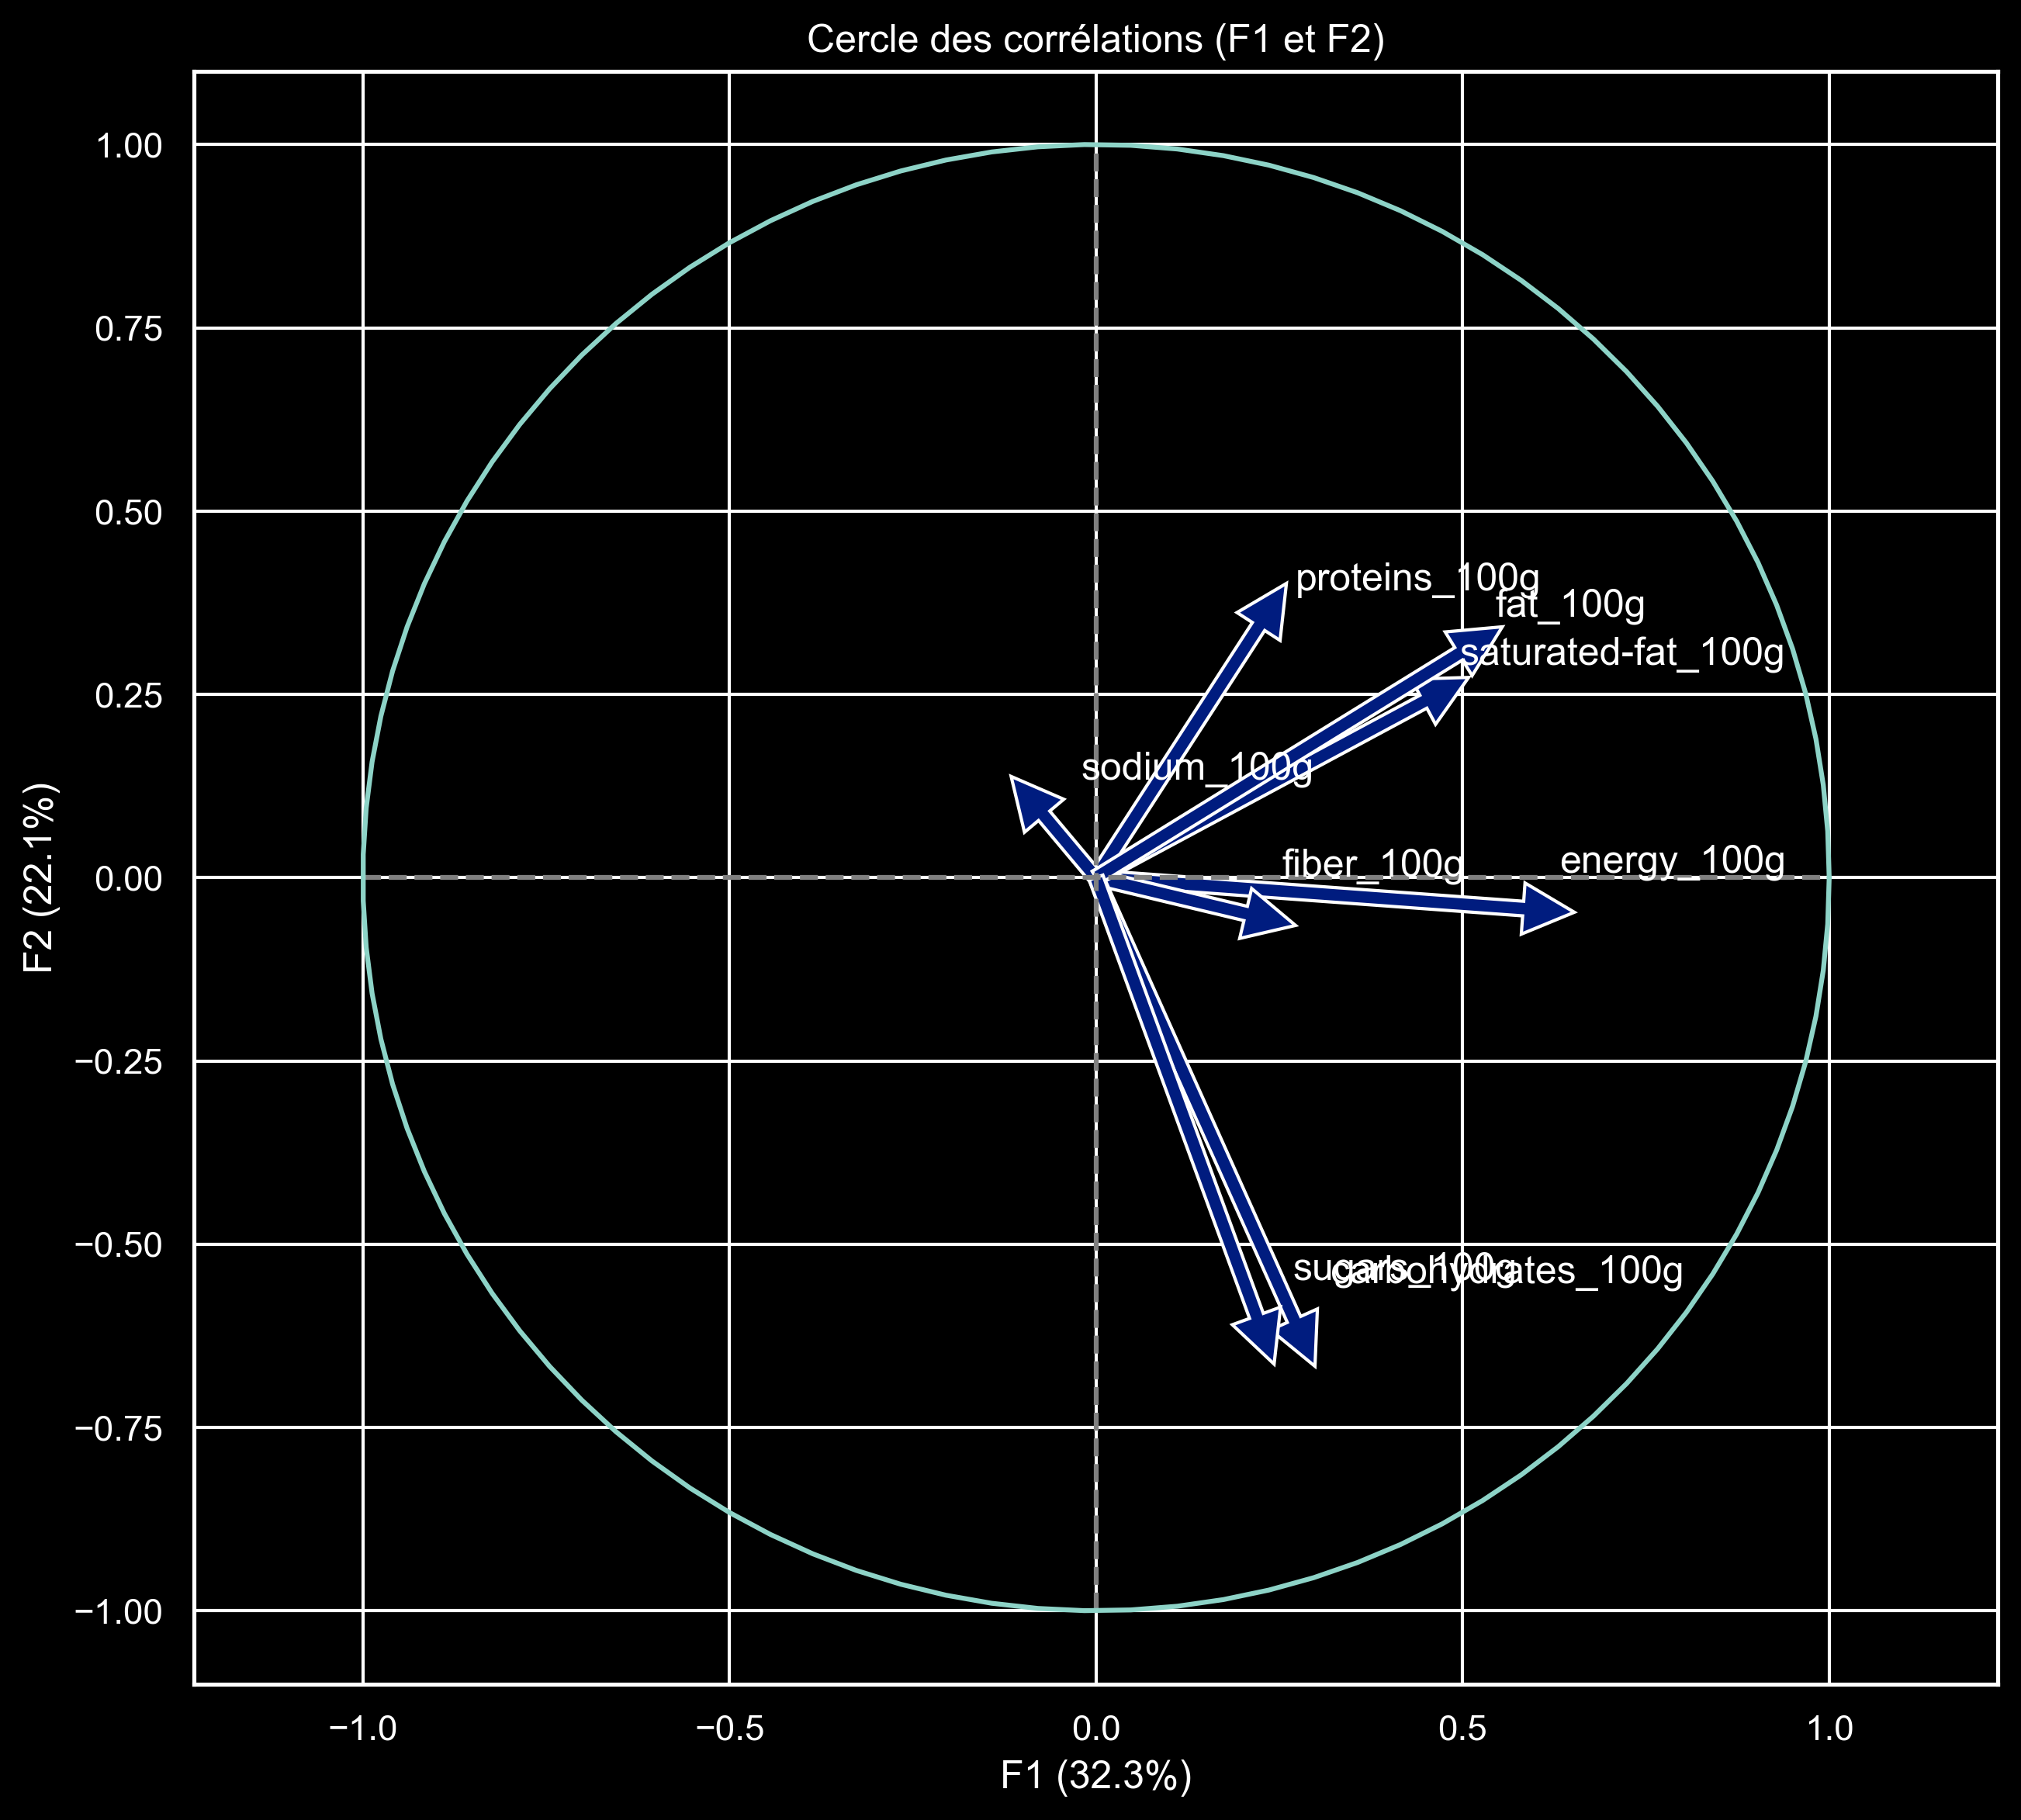

In [104]:
x,y = 0,1
fig, ax = plt.subplots(figsize=(10, 9))
for i in range(0, pca.components_.shape[1]):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[0, i],  #0 for PC1
             pca.components_[1, i],  #1 for PC2
             head_width=0.07,
             head_length=0.07, 
             width=0.02,              )

    plt.text(pca.components_[0, i] + 0.05,
             pca.components_[1, i] + 0.05,
             features[i])
    
# affichage des lignes horizontales et verticales
plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')


# nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))


an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
plt.axis('equal')
plt.show(block=False)

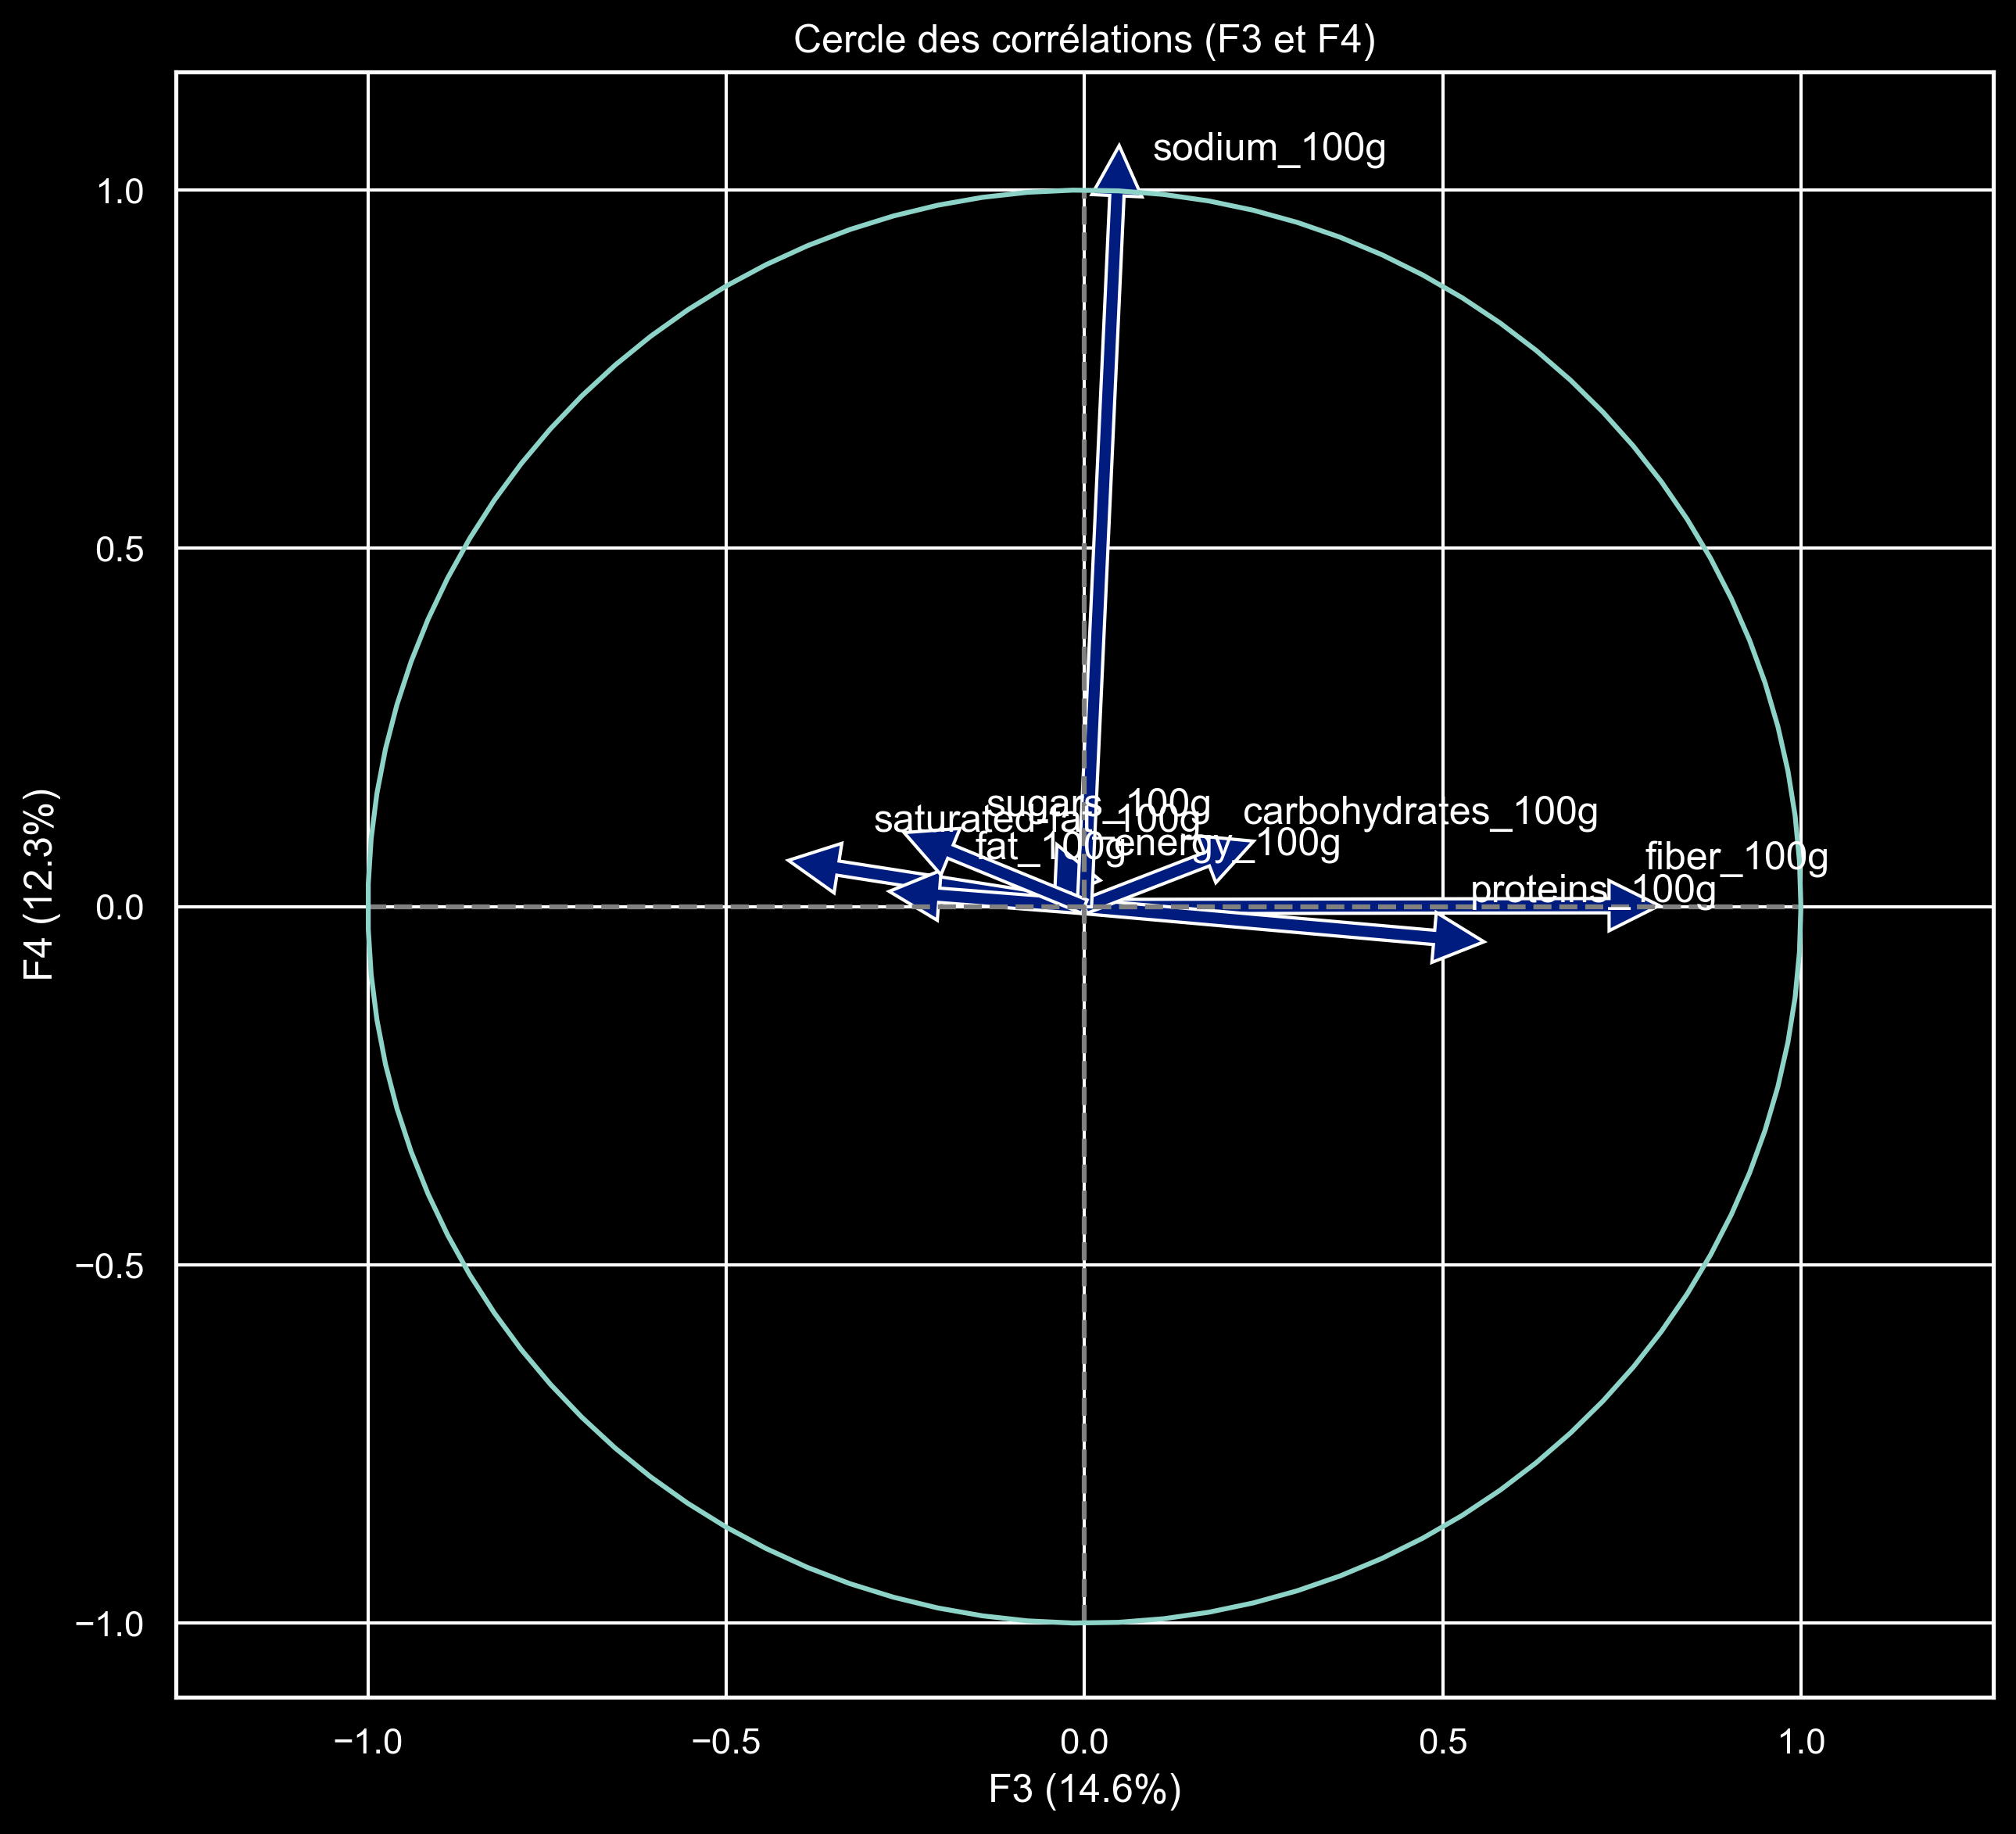

In [105]:
x,y = 2,3
fig, ax = plt.subplots(figsize=(10, 9))
for i in range(0, pca.components_.shape[1]):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[2, i],  #2 for PC3
             pca.components_[3, i],  #3 for PC4
             head_width=0.07,
             head_length=0.07, 
             width=0.02,              )

    plt.text(pca.components_[2, i] + 0.05,
             pca.components_[3, i] + 0.05,
             features[i])
    
# affichage des lignes horizontales et verticales
plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')


# nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))


an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
plt.axis('equal')
plt.show(block=False)

rajouter analyse, conclusions

addtives et energy pas correlée car angle droit
sodium et huile de palme correlée négativement

Faire une analyse quali / quali

rajouter des conditions if pour transformer les variables qualitatives en catégories (ex: moins de 3 additifs = low additifs) etc

- faire une regression linéaire entre le nutriscore et le reste
- exemple avec energy, pour faire le lien

- faire une moyenne pondérée des aliments
- utiliser l'étude